<a href="https://colab.research.google.com/github/OmarCardoso/Projeto_churn_clientes_ensembles_Luizalabs/blob/main/Projeto_churn_clientes_modelo_ensembles_Luizalabs_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Ensembles: Previsão de _Churn_ de Clientes

___


### Allan Almeida Dieguez

> #### Tera / Luizalabs

#### Junho de 2021

___


# Contexto do Desafio



## *Churn* de Clientes

O desafio de prever se um cliente irá sair da Base de Clientes Ativos (também conhecido como *churn*) não é um problema exclusivo do varejo, sendo uma área de estudos constante da maioria das indústrias e empresas de serviços que dependem da retenção. 

Esse é um exemplo do tipo de problema que um cientista do *Chapter* de Ciência de Dados do Luizalabs entra de cabeça e cujas soluções servem para alavancar várias frentes de trabalho. A solução em si já traz muito valor, se tiver alto índice de acertos pode ser usada para elencar automaticamente clientes com alto risco de *churn* para uma promoção agressiva com o objetivo retê-lo na base. 

Também há muito valor nos *insights* e na validação de hipóteses que acontece durante o processo de análise do problema e das soluções. Pode-se verificar através de experimentação que, por exemplo, um cliente que compra exclusivamente em datas especiais ou eventos promocionais tem uma chance menor de ser um *churn* do que um que compra grandes volumes do mesmo produto. 

## Objetivos do Desafio

Nesse desafio, construído em uma parceria da **Tera** e o **Luizalabs**, o **objetivo principal** será construir algumas soluções baseadas em *machine learning* para prever se um dado cliente do *e-commerce* do **Magalu** continuará comprando na plataforma em 2020 usando algumas características próprias do cliente e seu histórico de compras no ano anterior. No final, algumas dessas soluções devem ser combinadas em um *ensemble* para criar uma solução única com o objetivo de alavancar ainda mais os resultados.

Para que o **objetivo principal** seja cumprido, será necessário construir uma forma de visualização das soluções criadas e a comparação com o **modelo _baseline_** e com o **modelo de _ensemble_** criados no processo. O formato sugerido é um **tabela de resultados** contendo as métricas de sucesso de cada modelo criado.

O **objetivo secundário** é o levantamento de hipóteses e *insights* que surgirem durante as experimentações. É interessante fazer isso desde o início como parte da análise exploratória, documentando qualquer indício de informação nova sobre o problema. Também é uma boa prática avaliar os modelos treinados, seja através da exploração de seus parâmetros (por exemplo, os pesos de um modelo linear) ou usando técnicas avançadas como o [SHAP](https://www.kaggle.com/dansbecker/shap-values), buscando relacionar como as _features_ influenciam as respostas do modelo.

A forma mais simples de cumprir o **objetivo secundário** é a documentação das etapas de análise e exploração de forma resumida em um relatório que compila as principais hipóteses e _insights_. Esse relatório pode ser um documento de texto na forma de um **diário de bordo** ou mesmo uma **seção do próprio notebook** em que a solução foi desenvolvida.

## Pontuação no Desafio

O desafio também possui um **_dataset_ de pontuação**, contendo dados de clientes que não estão nem nas bases de treino nem nas de teste. Para esses clientes não foram disponibilizadas as respostas (_targets_), sendo portanto impossível verificar durante o desenvolvimento da solução se o modelo está acertando ou não. 

O objetivo desse _dataset_ é permitir, de forma justa, que os alunos possam comparar suas melhores soluções com as dos outros. Através desse [_link_](https://forms.gle/9Vb4VDVejXLz6wi67) é possível fazer o envio do **arquivo de respostas** do desafio. No fim do desafio, será mostrado o _ranking_ dos envios dos alunos. 

_Let the Games Begin!_ =

# Base de Dados

Todos os dados disponibilizados para esse desafio estão em arquivos no formato **_csv_**, podendo ser baixados para serem trabalhados localmente ou em um notebook do **_Google Colab_** como este aqui. 

Os dados sensíveis ou privados de clientes e produtos estão todos anonimizados, respeitando a privacidade dos mesmos e evitando o vazamento de informações estratégicas da empresa. 

Esses dados anonimizados incluem informações de **IDs de entidades** (clientes, vendas e produtos), os **estados** de origem do cliente e de destino do produto e a **estrutura mercadológica** dos produtos (nomes de categorias e subcategorias às quais pertencem), assim como sua **descrição** (nome do produto incluso).



## Definições de Código

Algumas definições de ambiente serão definidas nessa seção para facilitar o acesso aos dados.

#### Fixando Versões

Algumas mudanças nas versões de _libs_ podem alterar o funcionamento desse script.

In [ ]:
!pip3 install scikit-learn==1.0.0

  Using cached scikit-learn-1.0.tar.gz (7.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [43 lines of output]
  Partial import of sklearn during the build process.
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  Traceback (most recent call last):
    File "X:\Dev\python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 363, in <module>
      main()
    File "X:\Dev\python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 345, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
    File "X:\Dev\python310\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py", line 164, in prepare_metadata_for_build_wheel
      return hook(metadata_directory, config_settings)
    File "C:\Users\marce\AppData\Local\Temp\pip-build-env-abfiwd81\overlay\Lib\site-packages\setuptools\build_meta.py", line 377, in prepare_metadata_for_build_wheel
      self.run_

#### Imports

In [ ]:
import gdown
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'gdown'

### Estrutura de pastas

Criação da estrutura de pastas antes do _download_.

In [ ]:
%%bash
if [  -d "data" ]
then 
    echo "folder 'data' already created, do nothing" 
else
    mkdir data
    echo "created 'data' folder"
fi

### URLs e Nomes de Arquivos

In [ ]:
FILE_INFO = {
    'client_tr': {
        'url':      'https://drive.google.com/uc?id=1GaDgzqFJz-ATMU5ePDD7BPjpSjzZ7kQm',
        'output':   'data/client.train.csv'
    },
    'client_te': {
        'url':      'https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw',
        'output':   'data/client.test.csv'
    },
    'client_ch': {
        'url':      'https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV',
        'output':   'data/client.challenge.csv'
    },
    'orders': {
        'url':      'https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ',
        'output':   'data/orders.csv'
    },
    'product': {
        'url':      'https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ',
        'output':   'data/product.csv'
    }
}

## Descrição das Tabelas e Colunas

Nessa seção serão descritas as tabelas e suas colunas do desafio. Os links para os arquivos e a descrição de cada um está nas seções a seguir. Algumas definições de código e extrações já serão feitas nesse momento, para facilitar o uso dos dados no restante do _notebook_ e para facilitar a explicação de cada elemento.

### Dados de Clientes

Os dados de clientes estão contidos em **3 arquivos** _csv_ já separados em **treino**, **teste** e **desafio**. Isso foi feito previamente para que os três _datasets_ tivessem distribuições justas das **_features_ de interesse**, representando fielmente o domínio do problema.

#### Colunas das Tabelas

As colunas para os três arquivos são:

- `client_id`: ID global único do cliente
- `birthdate`: data de nascimento do cliente
- `state`: estado onde o cliente mora
- `gender`: gênero declarado pelo cliente
- `is_churn`: variável dependente (_target_) que diz se o cliente será _churn_ ou não

#### Dados de Treino: _clients.train.csv_

Os **dados de treino** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [ ]:
key = 'client_tr'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

In [ ]:
clients_tr = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_tr

#### Dados de Teste: _clients.test.csv_

Os **dados de teste** estão [neste arquivo](https://drive.google.com/uc?id=1Pg6AIpM-krtf1aNS3IKUSkoHhun_OxKw) do _Google Drive_.

In [ ]:
key = 'client_te'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

In [ ]:
clients_te = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_te

#### Dados de Desafio: _clients.challenge.csv_

Os **dados de desafio** estão [neste arquivo](https://drive.google.com/uc?id=1JBo7SlIuzmkQgRg9VytkNgXLhZyKmPJV) do _Google Drive_. Interessante notar que está faltando a coluna `is_churn`, que não será fornecida para esse _dataset_.

In [ ]:
key = 'client_ch'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

In [ ]:
clients_ch = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)
clients_ch

### Dados de Produtos

Os **dados de produto** estão [neste arquivo](https://drive.google.com/uc?id=1wU65H2mwrdd8BhVM8hITCB9sfRVNHFwQ) do _Google Drive_.

In [ ]:
key = 'product'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

In [ ]:
product = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)
product

As colunas da Tabela de Produtos são todas simbólicas, representando as diferentes categorias da **árvore de Estrutura Mercadológica** onde o produto está inserido. 

Os nomes das subcategorias herdam o nome da categoria pai, de forma que todas as subcategorias da coluna `category_lv2` que começam com "mk38:072" possuem como categoria pai a `category_lv1` de nome "mk38:072", que por sua vez é filho da `category_lv0` de nome "mk38".

Um exemplo da categorização:

- `category_lv0`: Categorias mais abrangentes dos produtos; e.g. "Eletrônicos" ou "Moda"
- `category_lv1`: Subcategorias; e.g. "Eletrônicos->Notebooks"
- `category_lv2`: Sub-subcategorias; e.g. "Eletrônicos->Notebooks->UltraFinos"

e assim por diante.

A coluna `product_id` é a referência global de produtos, que pode ser combinada por _merge_ com a tabela de vendas.

### Histórico de Vendas

Os **dados do histórico de todas as vendas** de 2019 para **todos os clientes** nos 3 datasets de cliente que compraram qualquer produto - todos contidos no dataset de produtos - estão [neste arquivo](https://drive.google.com/uc?id=1sk7p66kMAu4ZfAUmYVH0YF-cx2kHd4UZ) do _Google Drive_.

In [ ]:
key = 'orders'

In [ ]:
 gdown.download(**FILE_INFO[key], quiet=0)

In [ ]:
orders = pd.read_csv(
    FILE_INFO[key]['output'],
    index_col=None, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)
orders

As colunas dessa tabela estão descritas a seguir.

As colunas de ID de entidade são:
- `order_id`: identificador da venda; pode estar repetida em outras linhas, pois **cada linha corresponde à compra de um produto por um cliente**, que pode ter comprado outros produtos no mesmo evento.
- `client_id`: identificador do cliente que realizou a compra
- `datetime`: data e hora da compra
- `units`: quantidade de unidades do produto que foram comprados nesse evento de compra
- `price`: preço unitário do produto comprado
- `payment_method`: forma de pagamento (crétido, débito, _voucher_, etc) da compra
- `installments`: número de parcelas do pagamento; se estiver vazio, pode-se considerar que não se aplica
- `delivery_days`: prazo de entrega do produto
- `delivery_state`: estado onde ocorreu a entrega do produto; corresponde exatamente ao estado nas tabelas de cliente
- `device`: meio por onde  o cliente comprou; e.g. site, aplicativo do celular, terminal de compras
- `source`: canal de _marketing_ que gerou o _lead_ e ocasionou ao cliente comprar; por exemplo, pode ser um link em uma página parceira onde o cliente viu uma promoção

# Roteiro Sugerido

As etapas a seguir são a sugestão de passos mínima para a solução do problema de forma estruturada. Em alguns passos serão dadas algumas sugestões de código para o melhor aproveitamento do esforço de exploração e construção de solução.

A idéia não é engessar a abordagem, mas apenas criar uma trilha minimamente estruturada para que seja fácil rastrear os passos da solução. O passo inicial será sempre a **análise exploratória** para entender os dados brutos, seguido por um ajuste dos elementos do dataset baseada nas descobertas em uma etapa de **limpeza e pré-processamento** dos dados.

## Análise Exploratória Inicial

O primeiro passo **sempre** deve ser uma boa EDA (ou análise exploratória). Deve-se entender em cada tabela fornecida a distribuição dos dados de cada coluna, o seu tipo e as correlações (no caso de _features_ numéricas) e co-ocorrências (para _features_ categóricas). Sempre é muito importante tentar entender a relação de todas as _features_ disponíveis com a **variável dependente** ou _target_ (no caso, `is_churn`, para entender se há variáveis que já explicam bem o comportamento da saída **antes mesmo de modelar** uma solução.

Sugestão para começar: pegar a tabela de **dados de cliente de treino** `client_tr` e fazer uma exploração das colunas de lá. Depois, buscar fazer uma análise exploratória nas **compras realizadas por esses clientes**, buscando perceber se há alguma relação interessante de comportamento do cliente. Por exemplo, pode-se verificar se o cliente sempre compra produtos para **entregar no mesmo estado em que ele mora**.

Muito importante usar as **técnicas de visualização** como histogramas e tabelas de correlações para ter as idéias certas. Nesses casos, gerar gráficos com as bibliotecas [matplotlib](https://matplotlib.org/) e a [seaborn](https://seaborn.pydata.org/) sempre é muito rico. Quando trabalhar com gráficos, sempre seguir a **regra de ouro**: se um gráfico **não mostra explicitamente o comportamento** que quer observar, a análise por esse gráfico pode não ser interessante, siga adiante para outra visualização.

Mais uma sugestão de feramentas: além da biblioteca `pandas`, as bibliotecas `numpy` e `scikit-learn` também possuem muitas ferramentas de análise interessantes.

### Imports

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
import numpy as np
import os
import pandas as pd

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
clients_tr = pd.read_csv(
    'client.train.csv',
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)

clients_te = pd.read_csv(
   'client.test.csv',
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)


clients_ch = pd.read_csv(
    'client.challenge.data.csv',
    index_col=0, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['birthdate']
)

orders = pd.read_csv(
    'orders.csv',
    index_col=None, 
    sep=',', 
    encoding='utf-8',
    parse_dates=['datetime']
)


product = pd.read_csv(
    'product.csv',
    index_col=0, 
    sep=',', 
    encoding='utf-8'
)


### Funções Auxiliares

#### `agg_count`

In [ ]:
def agg_count(df, col, level):
    """ Agrega as estatísticas básicas (do tipo `describe` a partir da granularidade definida em `level`.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    col: string
        Nome da coluna pai referência.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    Return
    ------

    DataFrame
        Tabela hierárquica com a contagem de `level`

    """
    return (df
            .reset_index()
            .groupby(col)[level]
            .apply(lambda x: x.unique().shape[0])
            .to_frame()
            .rename(columns=lambda x: f'{level}_per_{col}'))

#### `agg_boxplot`

In [ ]:
def agg_describe(df, level, **kwargs):
    """ Agrega as estatísticas básicas (do tipo `describe` a partir da granularidade definida em `level`.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    **kwargs
        Parâmetros da função `describe`


    Return
    ------

    DataFrame
        Tabela com as estatísticas por coluna.

    """
    output = None
    columns = df.loc[:, :level].columns.difference([level])
    for col in columns:
        desc = agg_count(df, col, level).describe(**kwargs)
        if output is None:
            output = desc
        else:
            output = output.join(desc)
    return output.T.rename(columns={'count': 'unique_level_ids'})


#### `agg_boxplot`

In [ ]:
def agg_boxplot(df, level, vertical=False, figsize=(20, 10), **kwargs):
    """ Mostra um gráfico de boxplot de dados hierárquicos agregados.

    Parameters
    ----------
    
    df: DataFrame
        Tabela hierárquica, cada coluna à esquerda representa um nível acima de todas as colunas à direita.

    level: string
        Nome da coluna mais granular; ignora todas as colunas à direita.

    vertical: bool (default=False)
        Define a orientação do `boxplot`; sobrescreve parâmetros padrão do `seaborn`.

    figsize: tuple (default=(20, 10)))
        Tabanho da figura no padrão `matplotlib.pyplot`.

    **kwargs
        Parâmetros da função `sns.boxplot`


    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.

    """
    data = pd.DataFrame()
    columns = df.loc[:, :level].columns.difference([level])
    for col in columns:
        tmp = agg_count(product, col, 'product_id')
        name = tmp.columns[0]
        tmp.columns = ['count']
        tmp['level'] = f'{level}_per_{col}'
        data = data.append(tmp)
    plt.figure(figsize=figsize)
    if vertical:
        kwargs.update({'x': "level", 'y': "count", 'orient': "v"})
    else:
        kwargs.update({'x': "count", 'y': "level", 'orient': "h"})
    ax = sns.boxplot(data=data.reset_index(drop=True), **kwargs)
    plt.title('Distribuição de produtos por nível de categoria')
    plt.grid(True)
    return ax
   

#### `distplot`


In [ ]:
def distplot(df, col, figsize=(15, 8), grid=True, boxplot_kw=dict(), histplot_kw=dict(), describe_kw=dict()):
    """ Mostra um gráfico de boxplot com o histograma de uma coluna

    Parameters
    ----------
    
    df: DataFrame
        Tabela de dados.

    level: string
        Nome da coluna cuja distribuição será avaliada.

    figsize: tuple (default=(15, 8))
        Tabanho da figura no padrão `matplotlib.pyplot`.

    boxplot_kw : dict (default=dict())
        Parâmetros da função `sns.boxplot`

    histplot_kw : dict (default=dict())
        Parâmetros da função `sns.histplot`
    
    describe_kw : dict (default=dict())
        Parâmetros da função `pd.DataFrame.describe()`


    Return
    ------

    DataFrame
        Tabela contendo as 

    """
    _, (ax_b, ax_h) = plt.subplots(2, sharex=True, figsize=figsize, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=ax_b, **boxplot_kw)
    sns.histplot(data=df, x=col, ax=ax_h, **histplot_kw)
    plt.grid(grid)
    return df[[col]].describe(**describe_kw).T

### Dados de Produtos

A análise de toda a base de produtos, independente dos clientes, pode levantar informações interessantes sobre a tabela toda. Os resultados das análises podem depois ser comparados com as compras dos clientes.

In [ ]:
# visualizando o  dataset
product

,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
product_id,,,,,
px01237,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:04846
px11510,mk38,mk38:072,mk38:072:149,mk38:072:149:218,mk38:072:149:218:01337
px03782,mk38,mk38:072,mk38:072:019,mk38:072:019:066,mk38:072:019:066:02321
px04092,mk38,mk38:072,mk38:072:019,mk38:072:019:054,mk38:072:019:054:06035
px07429,mk38,mk38:072,mk38:072:078,mk38:072:078:182,mk38:072:078:182:07218
...,...,...,...,...,...
px11965,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:00392
px05192,mk35,mk35:072,mk35:072:122,mk35:072:122:182,mk35:072:122:182:02028
px05391,mk38,mk38:107,mk38:107:357,mk38:107:357:182,mk38:107:357:182:08006


In [ ]:
# descrição rápida padrão
dsc = product.reset_index().describe()
dsc

,product_id,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
count,12659,12659,12659,12659,12659,12659
unique,12659,52,296,893,1218,10763
top,px01237,mk17,mk21:089,mk03:092:378,mk03:092:378:103,mk35:072:177:182:09721
freq,1,1273,563,237,237,10


In [ ]:
# quantidade de nulos
product.isna().mean()

category_lv0    0.0
category_lv1    0.0
category_lv2    0.0
category_lv3    0.0
category_lv4    0.0
dtype: float64

Obervações:

- Não há produtos (`product_id`) repetidos na base 
- Nível 4 (`category_lv4`) tem um número de elementos únicos muito próximo do número de produtos
    - Hipótese: `product_id` pode ser uma especificação do produto, como **cor** ou **voltagem**
    - Suporte: Voltagem possui 2 variações e cor normalmente não tem mais que 10 por produto (suposição)
    - Suporte **verificado**: max(freq) é 10

#### Análises

##### Distribuição de **`product_id`** nas **categorias acima**

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame

,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
product_id_per_category_lv0,52.0,243.442308,301.488036,1.0,2.0,5.4,25.5,78.6,139.0,251.2,285.2,378.6,620.5,1273.0
product_id_per_category_lv1,296.0,42.766892,66.539574,1.0,1.0,3.0,6.0,11.0,17.0,26.0,42.5,65.0,112.5,563.0
product_id_per_category_lv2,893.0,14.175812,25.803313,1.0,1.0,1.0,2.0,3.0,5.0,7.0,11.0,19.0,36.0,237.0
product_id_per_category_lv3,1218.0,10.393268,20.617354,1.0,1.0,1.0,2.0,2.0,4.0,5.0,8.0,13.0,23.0,237.0
product_id_per_category_lv4,10763.0,1.176159,0.498651,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,10.0


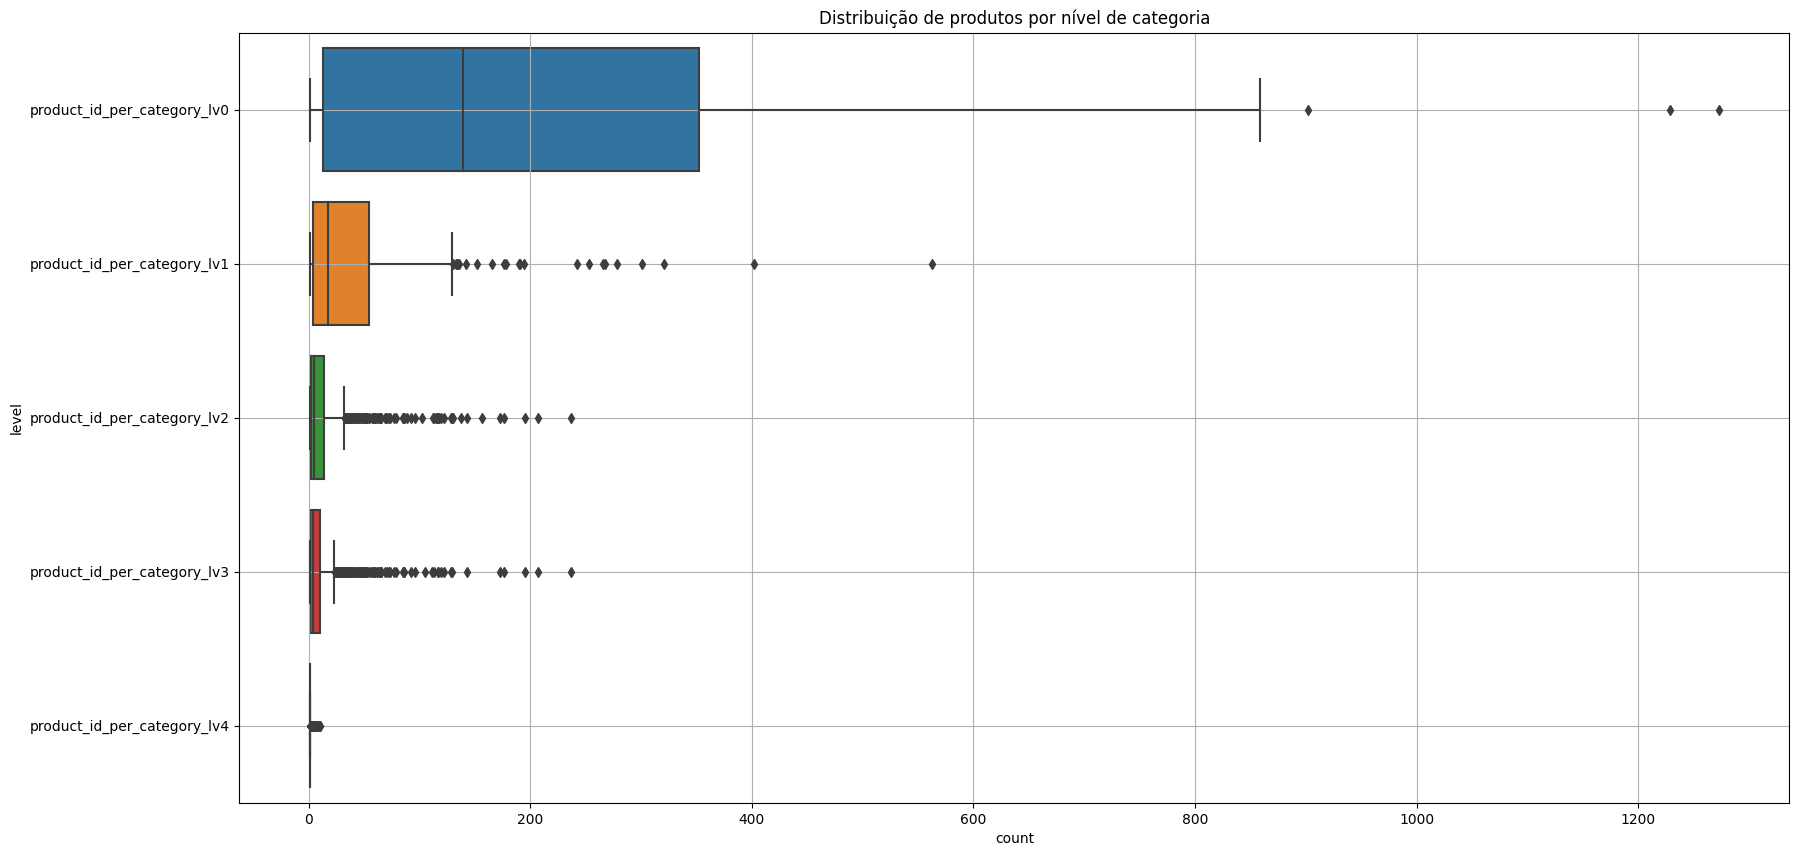

In [ ]:
level = 'product_id'
agg_boxplot(product, level, figsize=(20, 10))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

A quantidade de produtos em cada nível tem uma distribuição que se mantem estável nas 3 primeiras categorias (até `category_lv2`), com menos de 20 variações na média e na mediana. Dada essa variação menor, é possível que os produtos especificado a partir de `category_lv2` com o mesmo pai em `category_lv1` são muito parecidos entre si, **podendo ser considerados de compras similares**.

Pode-se estimar que, em um primeiro momento, considerar apenas os níveis `category_lv0` e `category_lv1` para análise.

##### Distribuição de **`category_lv4`** nas **categorias acima**

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)


,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
category_lv4_per_category_lv0,52.0,206.980769,252.547452,1.0,2.0,5.4,25.2,72.6,130.0,186.2,263.0,343.4,451.2,1219.0
category_lv4_per_category_lv1,296.0,36.361486,53.722398,1.0,1.0,3.0,5.0,10.0,15.0,24.0,35.5,57.0,102.5,396.0
category_lv4_per_category_lv2,893.0,12.052632,22.005363,1.0,1.0,1.0,2.0,3.0,4.0,6.0,10.0,16.0,31.0,204.0
category_lv4_per_category_lv3,1218.0,8.836617,17.751653,1.0,1.0,1.0,1.0,2.0,3.0,4.0,7.0,10.0,20.0,204.0


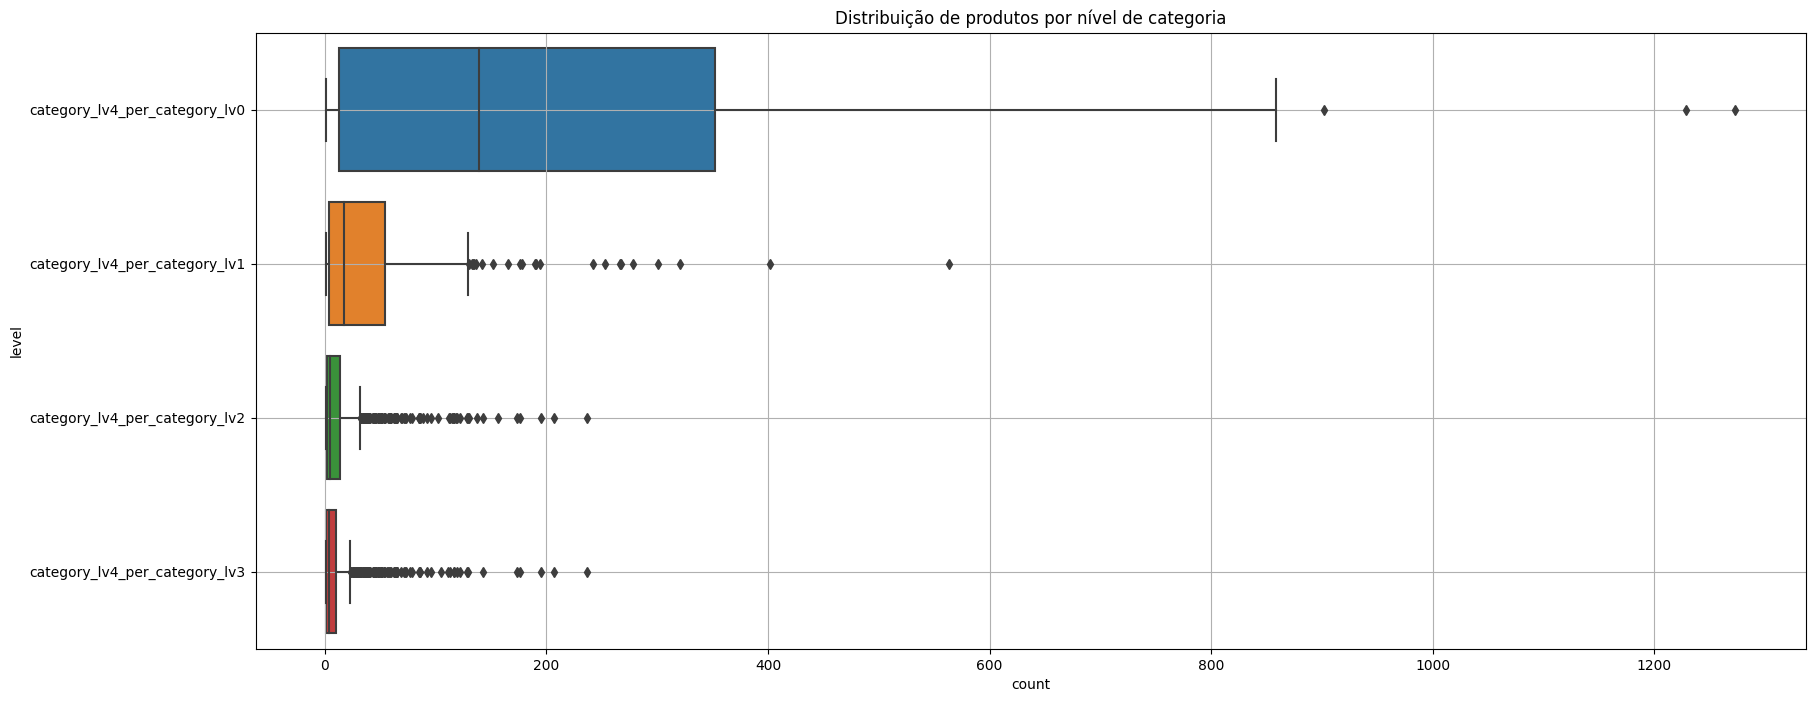

In [ ]:
level = 'category_lv4'
agg_boxplot(product, level, figsize=(20, 8))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

##### Distribuição de **`category_lv3`** nas **categorias acima**

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)


,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
category_lv3_per_category_lv0,52.0,23.423077,34.808353,1.0,1.0,1.2,5.3,8.4,11.0,17.4,26.0,28.8,46.6,179.0
category_lv3_per_category_lv1,296.0,4.114865,4.408041,1.0,1.0,1.0,1.0,2.0,2.5,3.0,5.0,6.0,9.0,25.0
category_lv3_per_category_lv2,893.0,1.363942,0.914947,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,10.0


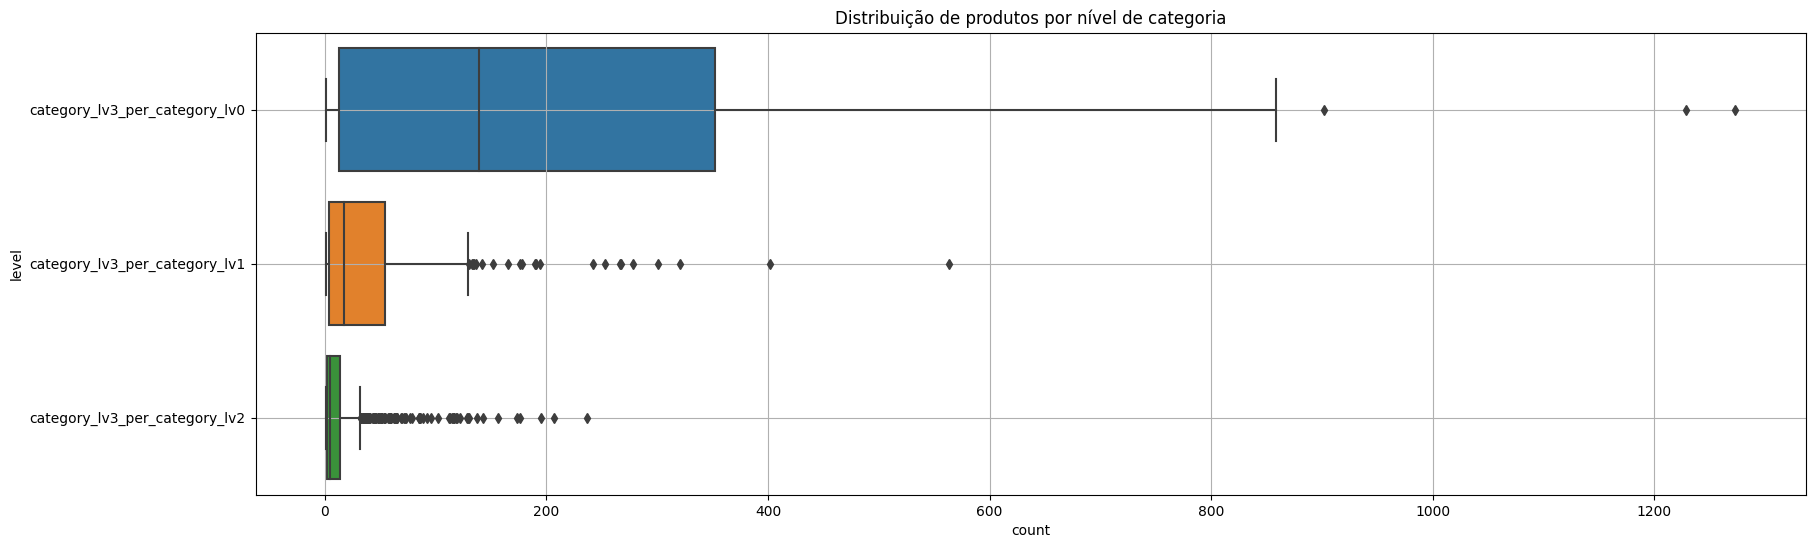

In [ ]:
level = 'category_lv3'
agg_boxplot(product, level, figsize=(20, 6))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

##### Distribuição de **`category_lv2`** nas **categorias acima**

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)
C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)


,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
category_lv2_per_category_lv0,52.0,17.173077,22.688618,1.0,1.0,1.2,4.3,8.0,9.5,13.0,20.0,25.6,30.7,116.0
category_lv2_per_category_lv1,296.0,3.016892,3.081336,1.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,6.0,21.0


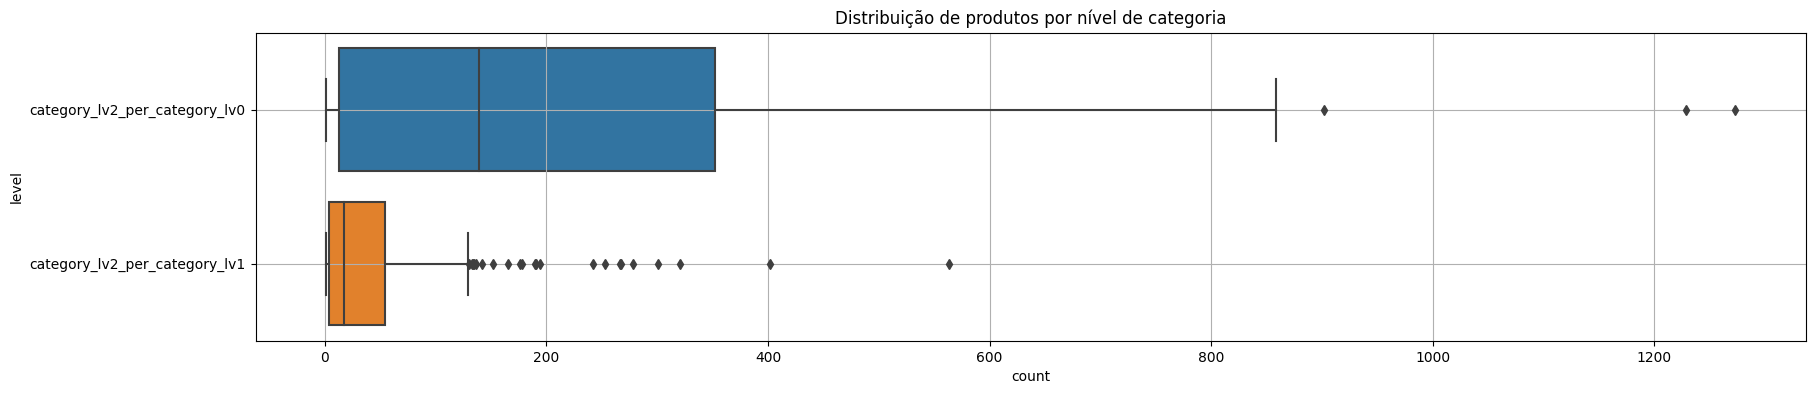

In [ ]:
level = 'category_lv2'
agg_boxplot(product, level, figsize=(20, 4))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

##### Distribuição de **`category_lv1`** nas **categorias acima**

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\1729163253.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(tmp)


,unique_level_ids,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
category_lv1_per_category_lv0,52.0,5.692308,5.945961,1.0,1.0,1.0,2.0,2.4,3.0,4.0,6.7,9.8,15.9,23.0


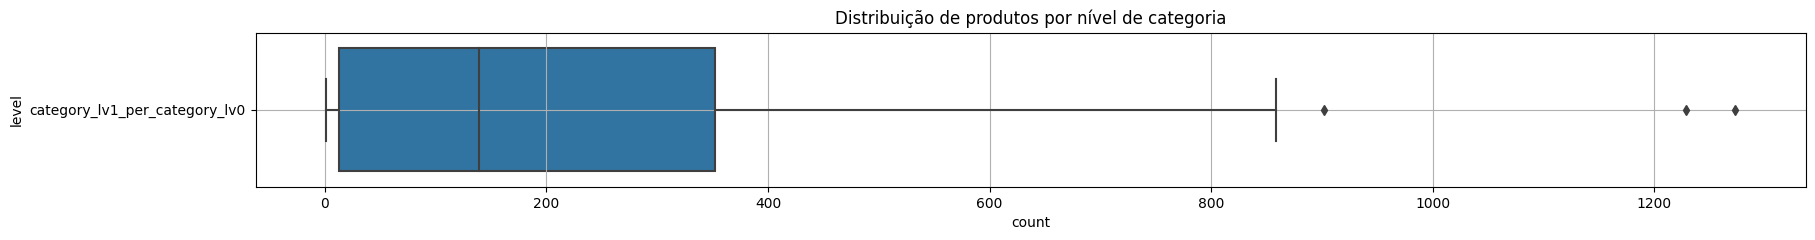

In [ ]:
level = 'category_lv1'
agg_boxplot(product, level, figsize=(20, 2))
agg_describe(product, level, percentiles=np.linspace(0.1, 0.9, 9))

#### Conclusão

Para uma _feature engineering_ podem ser consideradas as categorias `category_lv0` e `category_lv1` como _proxies_ de grupos de produtos similares, podendo considerar a camada `category_lv2` como o próprio produto antes de contabilizar suas variações.

### Dados de Compras'

Seguindo o mesmo racional aplicado na base de produtos, levantar alguns dados gerais de compras pode trazer algumas informações para comparar com os clientes individualmente.

In [ ]:
# visualizando o  dataset
orders

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...,...
168467,ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
168468,ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
168469,ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08
168470,ox126589,cx15796,px12043,2019-09-07 04:39:00,1.0,15.00,pm10,1.0,0.0,st01,dv3,sc12


In [ ]:
# nulos
orders.isna().mean()

order_id          0.000000
client_id         0.000000
product_id        0.000000
datetime          0.000000
units             0.000000
price             0.000000
payment_method    0.000000
installments      0.783080
delivery_days     0.467912
delivery_state    0.000000
device            0.000000
source            0.000000
dtype: float64

#### Variáveis Numéricas

In [ ]:
# descrição rápida padrão - colunas numéricas
cols = ['units', 'price', 'installments', 'delivery_days']
perc = np.linspace(0.1, 0.9, 9)
orders[cols].reset_index().describe(percentiles=perc)

,index,units,price,installments,delivery_days
count,168472.000000,168472.000000,168472.000000,36545.000000,89642.000000
mean,84235.500000,1.228846,451.384291,4.551293,7.017938
std,48633.821613,1.504511,857.769280,4.704385,6.855334
min,0.000000,0.000000,-8999.000000,1.000000,0.000000
10%,16847.100000,1.000000,5.000000,1.000000,2.000000
20%,33694.200000,1.000000,29.000000,1.000000,2.000000
30%,50541.300000,1.000000,52.900000,1.000000,2.000000
40%,67388.400000,1.000000,99.000000,2.000000,4.000000
50%,84235.500000,1.000000,162.580000,3.000000,5.000000
60%,101082.600000,1.000000,266.490000,4.000000,6.000000


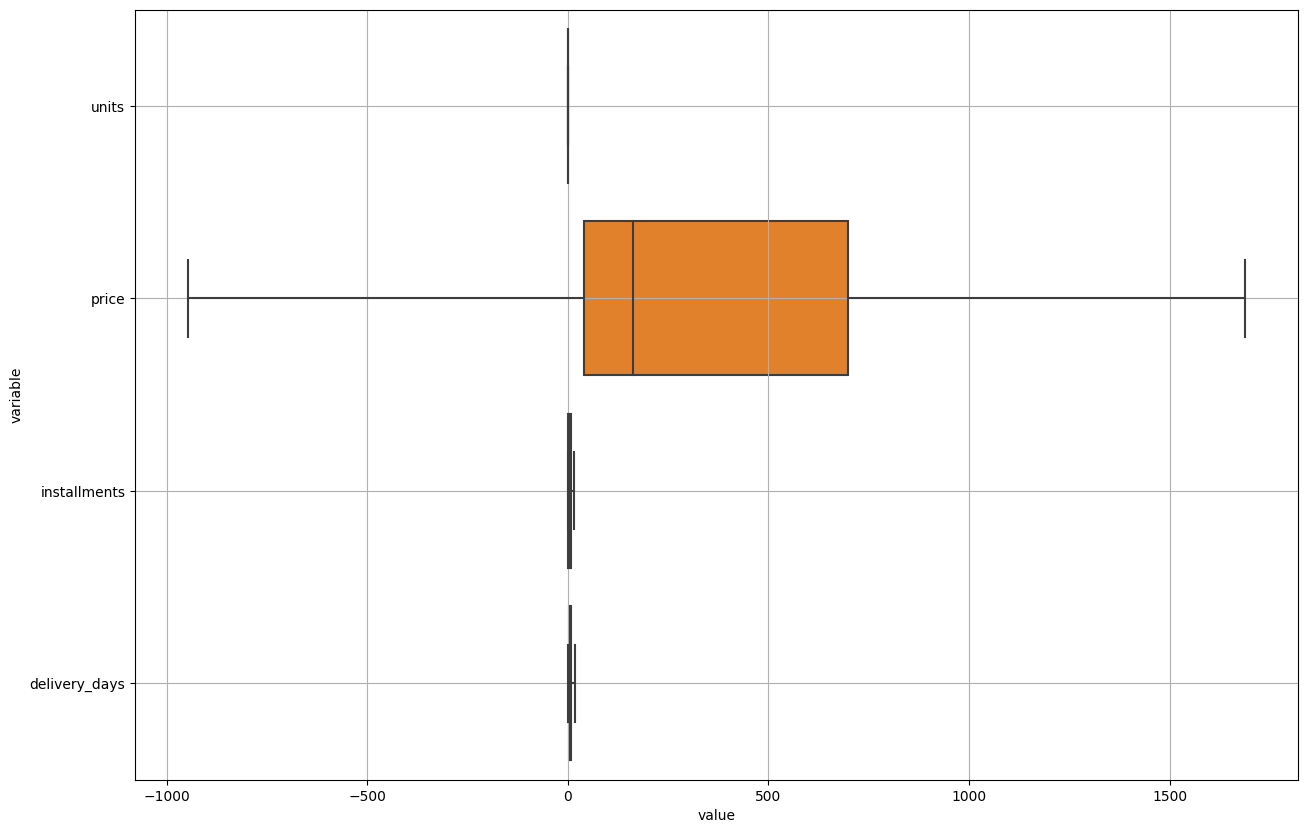

In [ ]:
plt.figure(figsize=(15, 10))
df = orders.loc[:, cols]

ax = sns.boxplot(
    data=df.melt(),
    y='variable', x='value', orient='h', 
    showfliers=False
)
plt.grid(True)

Dados de preço estão em uma escala muito maior, é mais interessante avaliar separadamente.

##### Variável `units`

In [ ]:
perc = np.linspace(0.1, 0.9, 9)

###### Todos os registros

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
units,168472.0,1.228846,1.504511,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,110.0


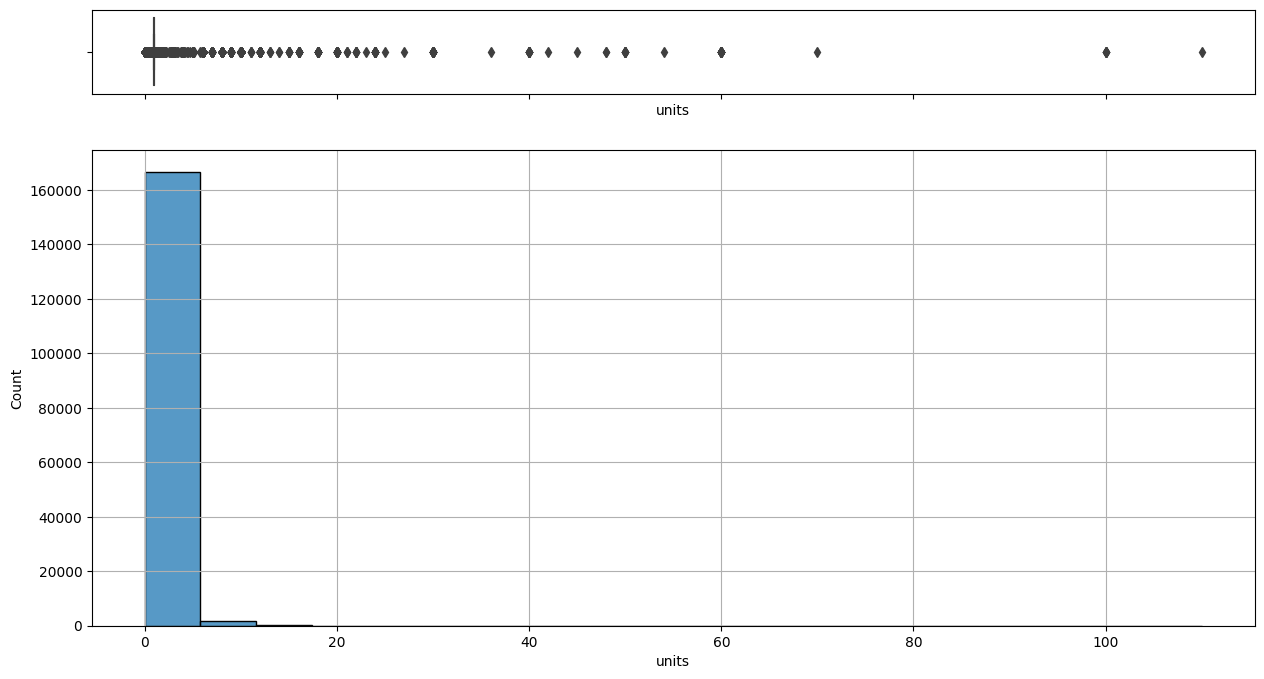

In [ ]:
distplot(orders, 'units', describe_kw={'percentiles': perc})

In [ ]:
df = orders.units.value_counts().to_frame().rename(columns=lambda x: 'count')
df.join((df / df.sum()).rename(columns=lambda x: 'perc'))

,count,perc
1.00000,147763,0.877077
2.00000,8627,0.051207
3.00000,2457,0.014584
4.00000,2049,0.012162
6.00000,823,0.004885
...,...,...
0.92770,1,0.000006
0.12509,1,0.000006
0.87491,1,0.000006
0.81741,1,0.000006


São muitos _outliers_, mas aparentemente o maior problema para visualizar são os quase 88% de valores igual a 1. Retirando as compras com **`units` igual a 1**, é possível avaliar as distirbuições em **alguns cortes** definidos empiricamente.

###### Corte: `units > 10`

O primeiro corte a ser observado é o de compras com mais de 10 itens, que parecem ser a minoria.`

In [ ]:
index = (orders.units > 10) 

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
units,301.0,24.132886,17.601962,11.0,12.0,12.0,12.0,16.0,18.0,20.0,24.0,30.0,50.0,110.0


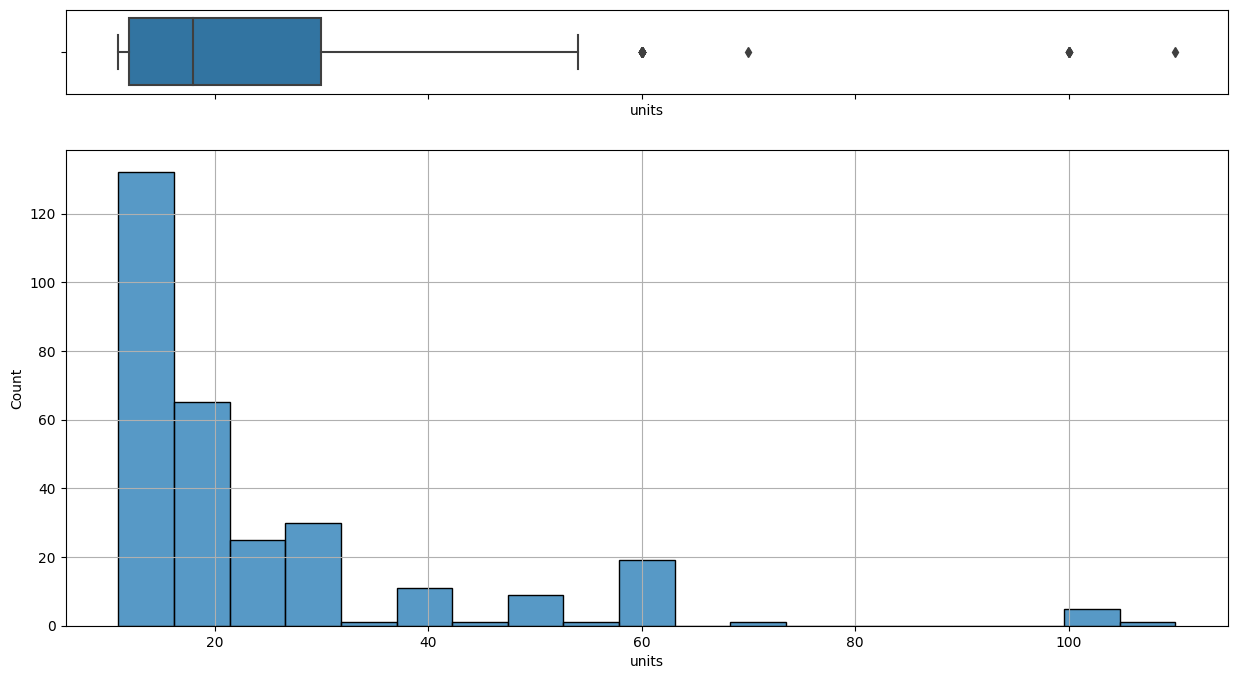

In [ ]:
distplot(orders[index], 'units', describe_kw={'percentiles': perc}, boxplot_kw={'showfliers': True})

In [ ]:
(orders[index].units <= 50).mean()

0.9102990033222591

Apenas 301 compras com mais de 10 itens foram realizadas, a grande maioria (91%) até 50 itens. Interessante observar os clientes e suas compras.

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
eventos em que um cliente comprou 10 ou mais itens iguais,198.0,1.520202,1.550207,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,15.0


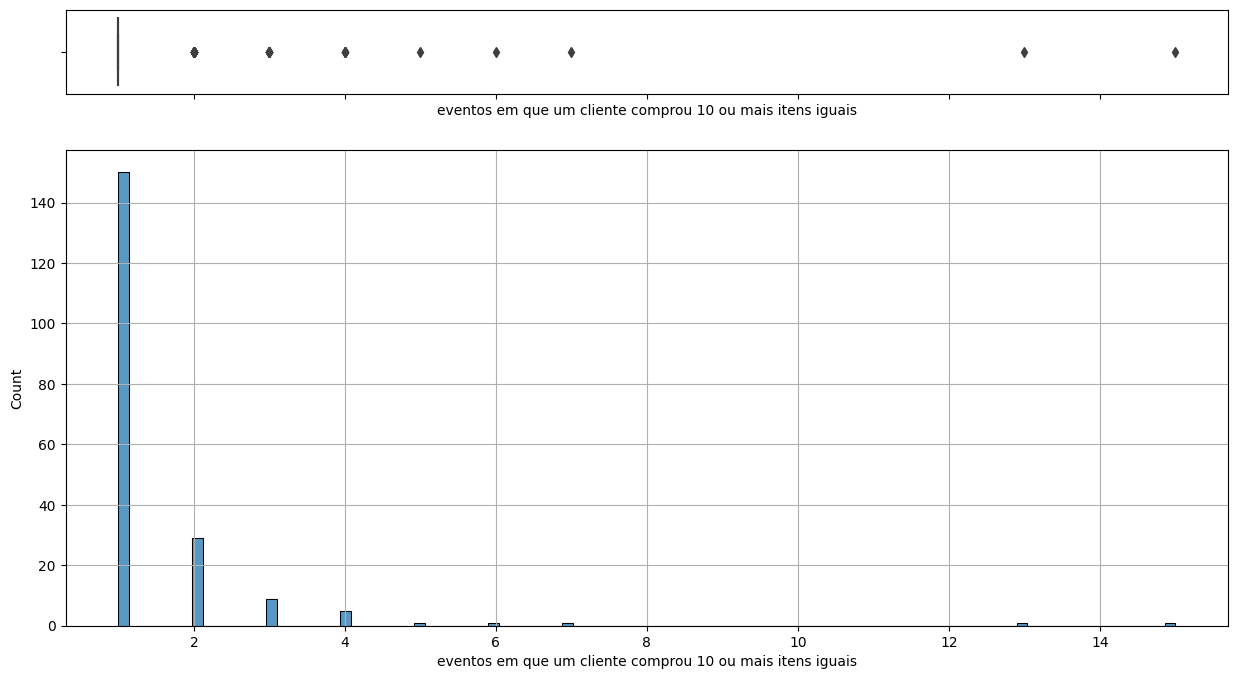

In [ ]:
col_name = 'eventos em que um cliente comprou 10 ou mais itens iguais'
data = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: col_name)
distplot(data, col_name, 
         describe_kw={'percentiles': perc},
         histplot_kw={'bins': 100}, 
         boxplot_kw={'showfliers': True})

In [ ]:
tmp = orders[index].client_id.value_counts()
pd.DataFrame({
    f'# de eventos: {k}': (tmp == k).agg(['sum', 'mean'])
    for k in sorted(np.unique(tmp.values))
}).T.apply(lambda x: pd.Series({'sum': x[0], 'mean': f'{100 * x[1]:5.2f}%'}), axis=1)


,sum,mean
# de eventos: 1,150.0,75.76%
# de eventos: 2,29.0,14.65%
# de eventos: 3,9.0,4.55%
# de eventos: 4,5.0,2.53%
# de eventos: 5,1.0,0.51%
# de eventos: 6,1.0,0.51%
# de eventos: 7,1.0,0.51%
# de eventos: 13,1.0,0.51%
# de eventos: 15,1.0,0.51%


198 cliente compraram **10 ou mais itens iguais** em um evento de compra. Desses, apenas 19 clientes compraram **mais de 2 vezes** , 9.6% desses 198.

Verificando alguns pontos em relação ao _target_ desses clientes.

In [ ]:
cbb = orders[index].client_id.value_counts()
tmp = (
    clients_tr
    .loc[clients_tr.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'train-big-buyers')
)
tmp = tmp.join(
    clients_te
    .loc[clients_te.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'test-big-buyers')
)
tmp = tmp.join((tmp/tmp.sum()).rename(columns=lambda x: f'{x}-perc'))
tmp

,train-big-buyers,test-big-buyers,train-big-buyers-perc,test-big-buyers-perc
False,103,38,0.895652,0.95
True,12,2,0.104348,0.05


A proporção não é muito próxima nas massas de treino e de teste, mas são da mesma ordem de grandeza .

Verificando agora a **potencial preditivo** da variável.

count      mean       std  min  25%  50%   75%   max
       is_churn                                                      
events False     103.0  1.466019  1.384901  1.0  1.0  1.0  1.50  13.0
       True       12.0  2.750000  3.980064  1.0  1.0  1.0  2.25  15.0

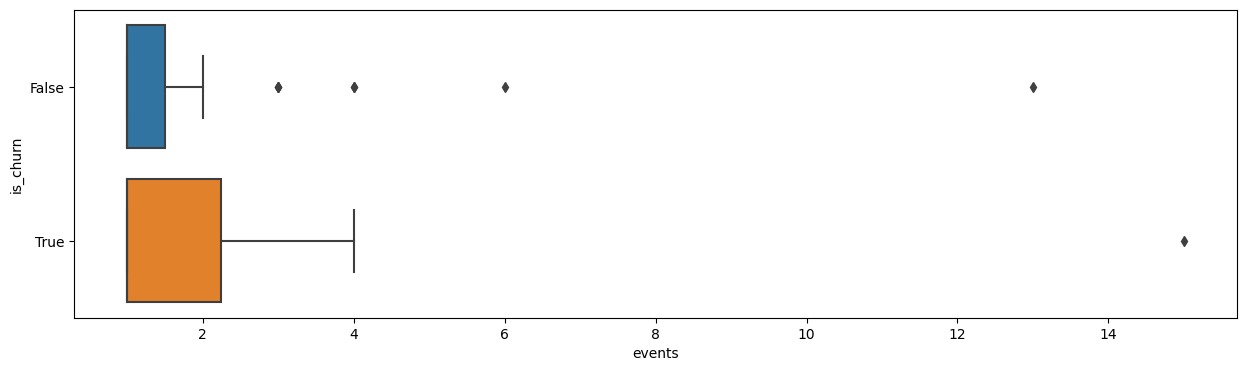

In [ ]:
eventos = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: 'events' )
targets = clients_tr.loc[clients_tr.index.isin(eventos.index), ['is_churn']]
data = targets.astype(str).join(eventos)
plt.figure(figsize=(15, 4))
sns.boxplot(data=data,  x='events', y='is_churn')
data.pivot(columns='is_churn').describe().T

As distribuições possuem algum potencial nesse corte, com clientes que irão ser _churn_ tendo uma média e um desvio padrão bem maiores que a classe negativa.

###### Corte: `1 < units <= 10`

Observando agora a quantidade de eventos em que clientes compraram **mais de 1 e até 10** itens repetidos.

In [ ]:
index = (orders.units > 1) & (orders.units <= 10) 

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
units,15560.0,3.192529,1.954322,1.0001,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,6.0,10.0


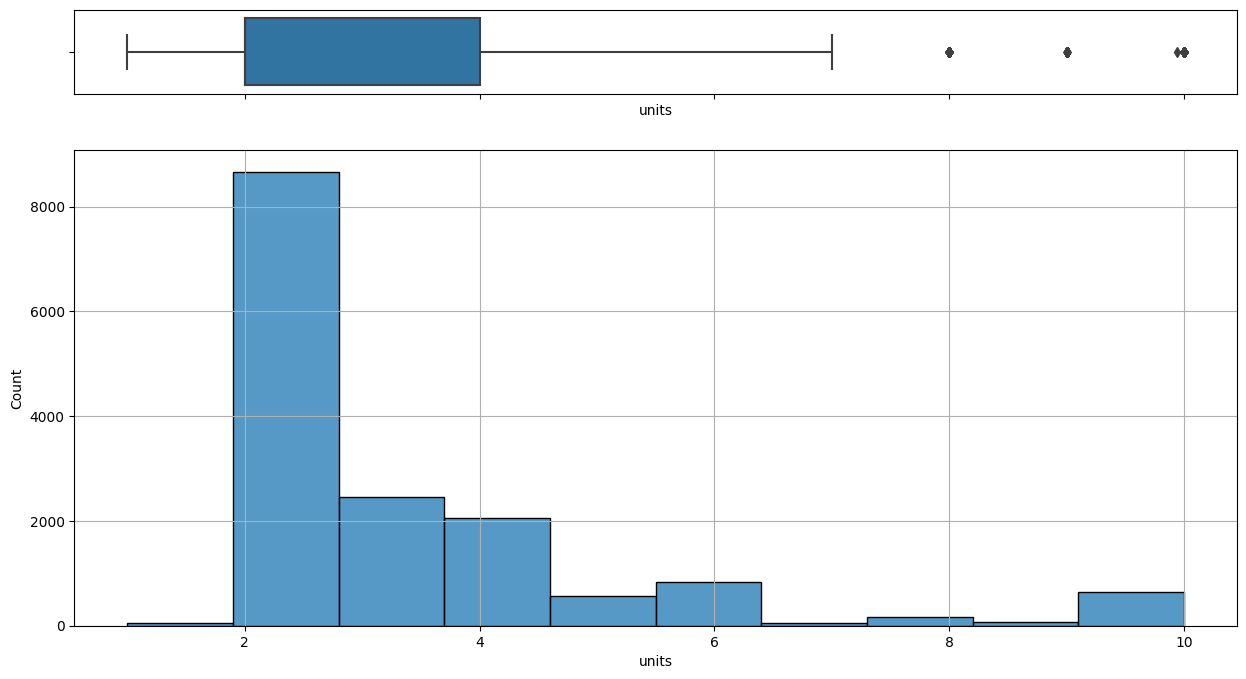

In [ ]:
distplot(orders[index], 'units', 
         describe_kw={'percentiles': perc}, 
         histplot_kw={'bins': 10}, 
         boxplot_kw={'showfliers': True})

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
eventos de compra de mais de 1 e até 10 itens iguais,8203.0,1.896867,2.340205,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,59.0


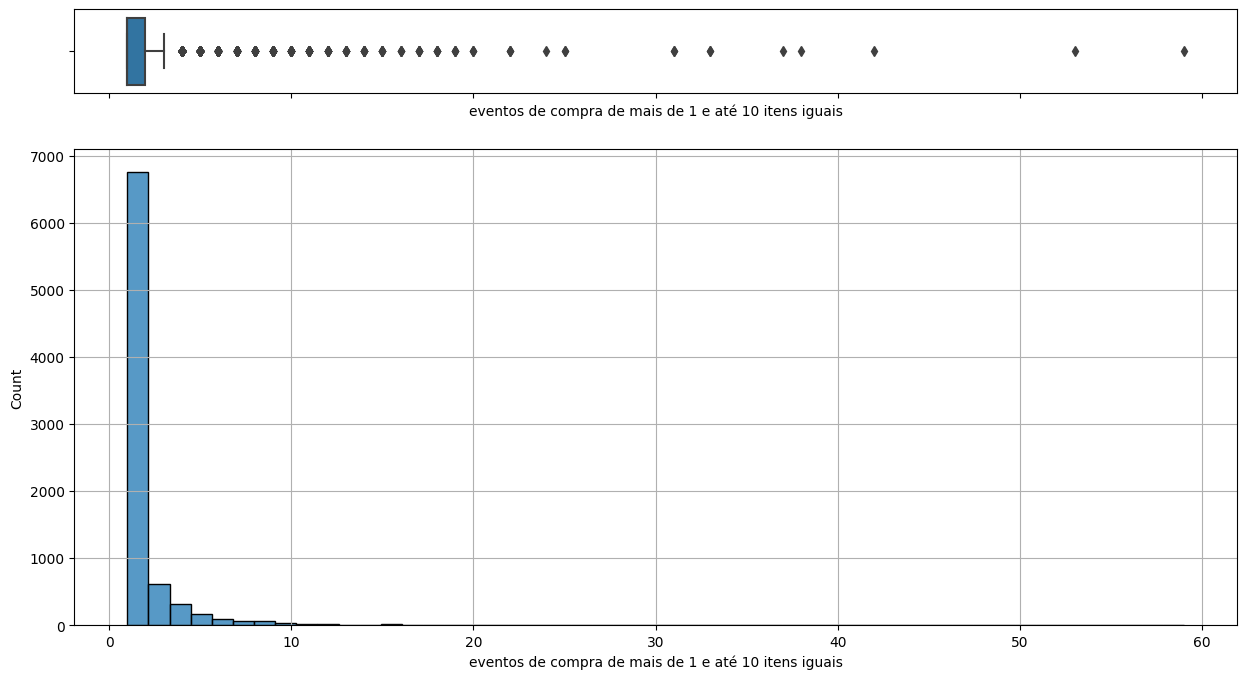

In [ ]:
col_name = 'eventos de compra de mais de 1 e até 10 itens iguais'
data = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: col_name)
distplot(data, col_name, 
         describe_kw={'percentiles': perc}, 
         histplot_kw={'bins': 50}, 
         boxplot_kw={'showfliers': True})

In [ ]:
tmp = orders[index].client_id.value_counts()
pd.DataFrame({
    f'# de eventos: {k}': (tmp == k).agg(['sum', 'mean'])
    for k in sorted(np.unique(tmp.values))
}).T.apply(lambda x: pd.Series({'sum': x[0], 'mean': f'{100 * x[1]:5.2f}%'}), axis=1)

,sum,mean
# de eventos: 1,5376.0,65.54%
# de eventos: 2,1385.0,16.88%
# de eventos: 3,612.0,7.46%
# de eventos: 4,317.0,3.86%
# de eventos: 5,164.0,2.00%
# de eventos: 6,94.0,1.15%
# de eventos: 7,61.0,0.74%
# de eventos: 8,37.0,0.45%
# de eventos: 9,33.0,0.40%
# de eventos: 10,29.0,0.35%


A quantidade de clientes com eventos de compra com mais de 1 até 10 itens repetidos é **bem mais expressiva**, pouco mais de 8 mil (dentro de um universo de 38 mil).

Comparação com o _target_ desses clientes.

In [ ]:
cbb = orders[index].client_id.value_counts()
tmp = (
    clients_tr
    .loc[clients_tr.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'train-bunch-buyers')
)
tmp = tmp.join(
    clients_te
    .loc[clients_te.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'test-bunch-buyers')
)
tmp = tmp.join((tmp/tmp.sum()).rename(columns=lambda x: f'{x}-perc'))
tmp

,train-bunch-buyers,test-bunch-buyers,train-bunch-buyers-perc,test-bunch-buyers-perc
False,4184,1404,0.848682,0.847314
True,746,253,0.151318,0.152686


A proporção desse corte **é praticamente a mesma** nas massas de treino e de teste. 

Verificando agora a **potencial preditivo** da variável.

count      mean       std  min  25%  50%  75%   max
       is_churn                                                      
events False     4184.0  1.929732  2.243558  1.0  1.0  1.0  2.0  42.0
       True       746.0  1.583110  1.578950  1.0  1.0  1.0  2.0  19.0

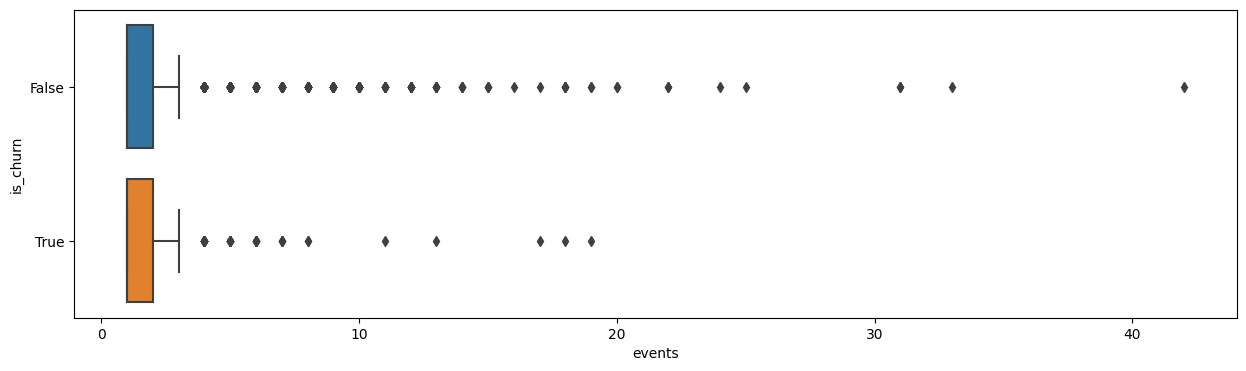

In [ ]:
eventos = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: 'events' )
targets = clients_tr.loc[clients_tr.index.isin(eventos.index), ['is_churn']]
data = targets.astype(str).join(eventos)
plt.figure(figsize=(15, 4))
sns.boxplot(data=data,  x='events', y='is_churn')
data.pivot(columns='is_churn').describe().T


As distribuições são muito próximas, não há muito potencial dessa variável sozinha e vista por esse corte. Além disso, nesse corte a proporção de média e _std_ estão invertidas em relação ao caso anterior.

###### Corte: `units` fracionados (não inteiros)

Um ponto interessante são as unidades fracionadas, ou seja, comporstas por números não inteiros. Provavelmente são produtos vendidos por metro ou por Kg, podendo ser itens de mercado, sob medida ou moda.


In [ ]:
index = (orders.units % 1 != 0)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
units,4945.0,0.521576,0.528356,0.0001,0.06034,0.129898,0.16667,0.22045,0.441,0.74074,0.807572,0.8547,0.95828,11.9986


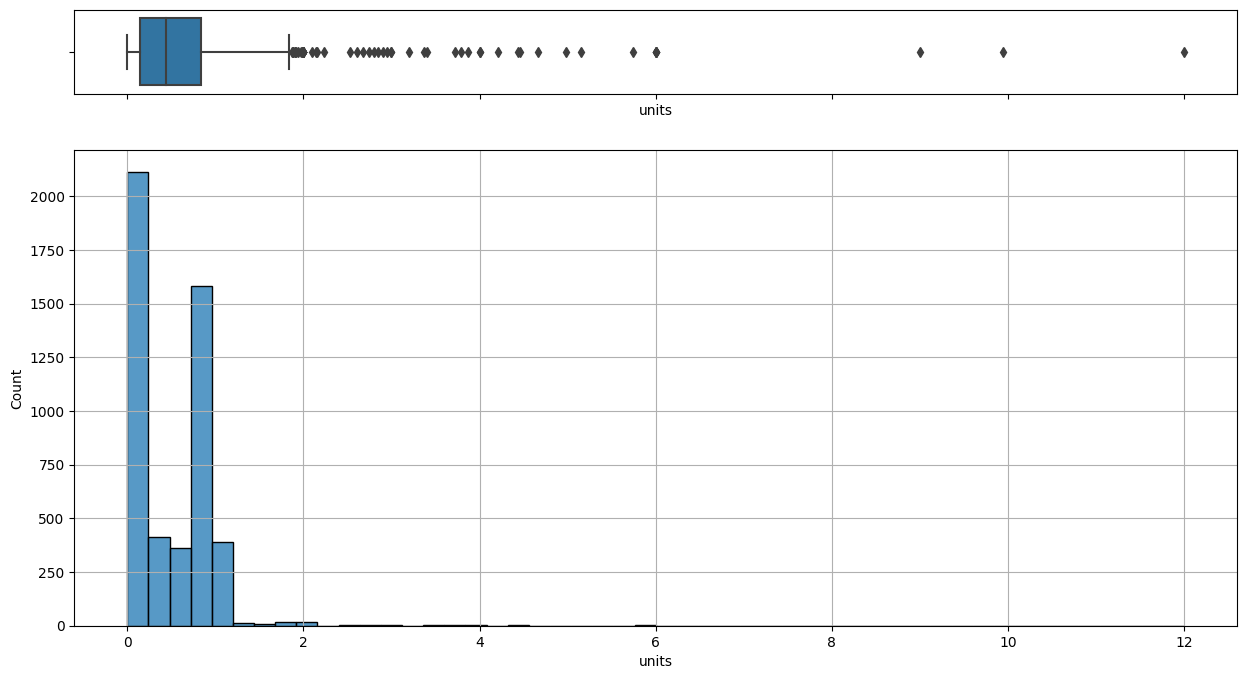

In [ ]:
distplot(orders[index], 'units', 
         describe_kw={'percentiles': perc}, 
         histplot_kw={'bins': 50}, 
         boxplot_kw={'showfliers': True})

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
eventos de compra de mais de 1 e até 10 itens iguais,1988.0,2.487425,1.483458,1.0,1.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,4.0,15.0


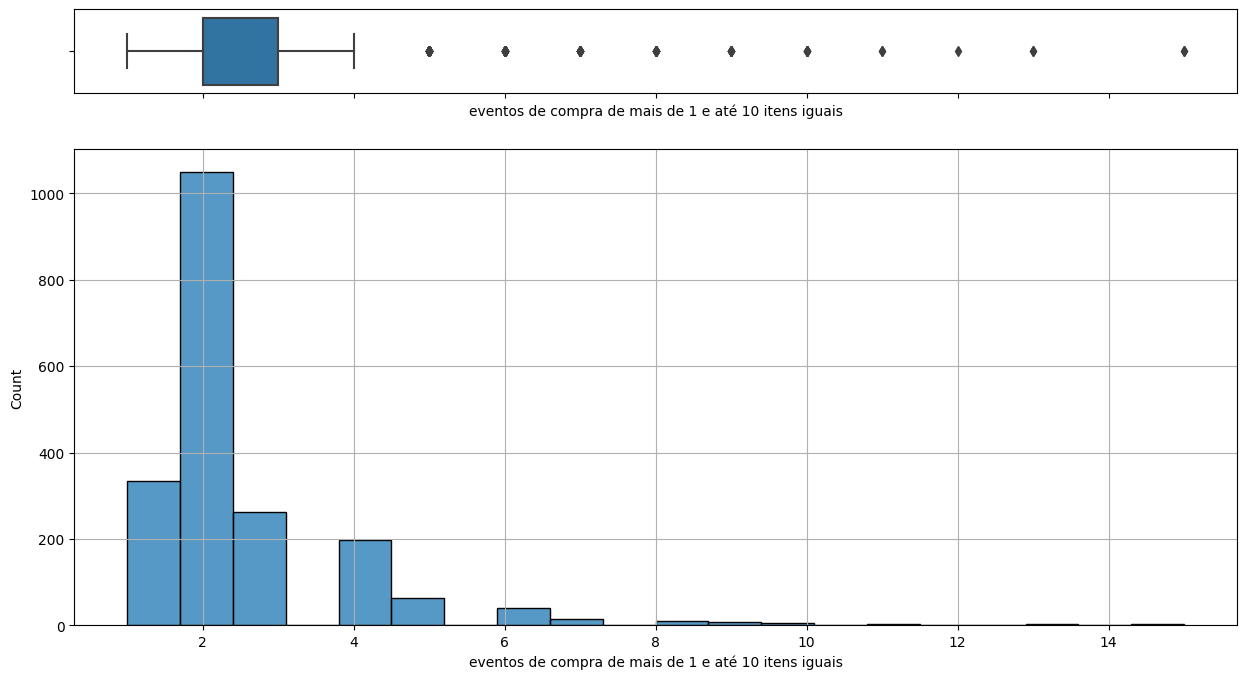

In [ ]:
col_name = 'eventos de compra de mais de 1 e até 10 itens iguais'
data = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: col_name)
distplot(data, col_name, 
         describe_kw={'percentiles': perc}, 
         histplot_kw={'bins': 20}, 
         boxplot_kw={'showfliers': True})

In [ ]:
tmp = orders[index].client_id.value_counts()
pd.DataFrame({
    f'# de eventos: {k}': (tmp == k).agg(['sum', 'mean'])
    for k in sorted(np.unique(tmp.values))
}).T.apply(lambda x: pd.Series({'sum': x[0], 'mean': f'{100 * x[1]:5.2f}%'}), axis=1)

,sum,mean
# de eventos: 1,333.0,16.75%
# de eventos: 2,1050.0,52.82%
# de eventos: 3,263.0,13.23%
# de eventos: 4,197.0,9.91%
# de eventos: 5,62.0,3.12%
# de eventos: 6,39.0,1.96%
# de eventos: 7,14.0,0.70%
# de eventos: 8,10.0,0.50%
# de eventos: 9,7.0,0.35%
# de eventos: 10,6.0,0.30%


A quantidade de clientes com eventos de compra com menos de 1 item repetidos (e por consequencia fracionado)  é **pouco expressiva**, menos de 2 mil (dentro de um universo de 38 mil).

Comparação com o _target_ desses clientes.

In [ ]:
cbb = orders[index].client_id.value_counts()
tmp = (
    clients_tr
    .loc[clients_tr.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'train-fraction-buyers')
)
tmp = tmp.join(
    clients_te
    .loc[clients_te.index.isin(cbb.index), 'is_churn']
    .value_counts()
    .to_frame()
    .rename(columns=lambda x: 'test-fraction-buyers')
)
tmp = tmp.join((tmp/tmp.sum()).rename(columns=lambda x: f'{x}-perc'))
tmp

,train-fraction-buyers,test-fraction-buyers,train-fraction-buyers-perc,test-fraction-buyers-perc
False,926,312,0.786078,0.781955
True,252,87,0.213922,0.218045


A proporção desse corte **é praticamente a mesma** nas massas de treino e de teste. 

Verificando agora a **potencial preditivo** da variável.

count      mean       std  min  25%  50%  75%   max
       is_churn                                                     
events False     926.0  2.519438  1.520011  1.0  2.0  2.0  3.0  13.0
       True      252.0  2.396825  1.461753  1.0  2.0  2.0  3.0  15.0

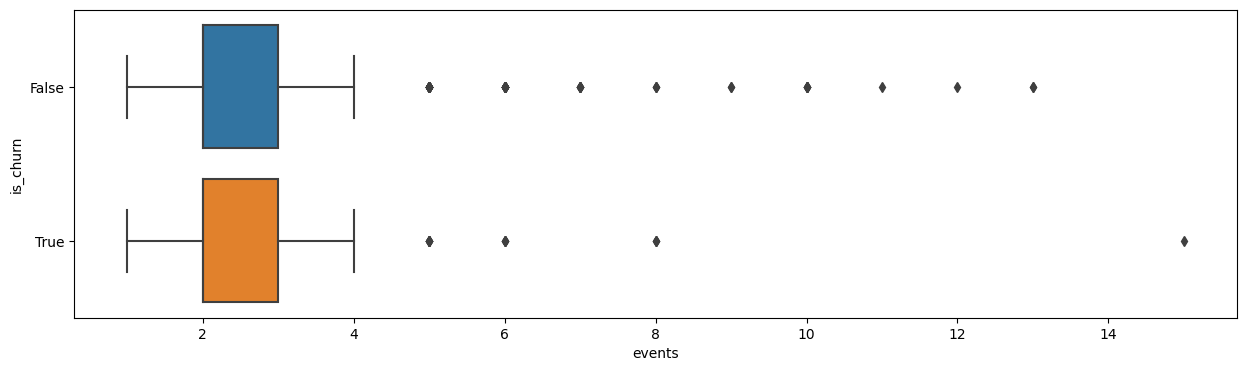

In [ ]:
eventos = orders[index].client_id.value_counts().to_frame().rename(columns=lambda x: 'events' )
targets = clients_tr.loc[clients_tr.index.isin(eventos.index), ['is_churn']]
data = targets.astype(str).join(eventos)
plt.figure(figsize=(15, 4))
sns.boxplot(data=data,  x='events', y='is_churn')
data.pivot(columns='is_churn').describe().T


As distribuições são ainda mais próximas, não há muito potencial dessa variável sozinha e vista por esse corte.

###### Quantidade de Itens Repetidos Vs Target

Nos cortes vistos a variável `units` não demonstrou tanto potencial preditivo, ao se tentar usar a **frequência que os clientes compram itens**. Falta verificar se **a quantidade de itens repetidos** em si tem um potencial preditivo. 



Como é uma série de números por cliente (e não um só), é necessário agregar esses números por cliente. O método **`describe`** pode extrair algumas características interessantes, assim como a **soma de todos os itens comprados por um cliente**.

In [ ]:
%%time
client_ids = clients_tr.index
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'units']]
client_group = stats.groupby('client_id')
features = (
    client_group.units.describe().drop(columns=['count'])
    .join(client_group.units.sum())
    .join(clients_tr[['is_churn']])
    .rename(columns={'units': 'sum_units'})
)
print(features.shape)
print(features.head(10).to_string())

(23292, 9)
           mean  std  min  25%  50%  75%  max  sum_units  is_churn
client_id                                                         
cx00002     1.0  NaN  1.0  1.0  1.0  1.0  1.0        1.0     False
cx00004     1.0  0.0  1.0  1.0  1.0  1.0  1.0        7.0     False
cx00005     1.0  0.0  1.0  1.0  1.0  1.0  1.0        4.0      True
cx00008     1.0  0.0  1.0  1.0  1.0  1.0  1.0        2.0     False
cx00009     1.0  0.0  1.0  1.0  1.0  1.0  1.0        2.0     False
cx00010     1.0  0.0  1.0  1.0  1.0  1.0  1.0        4.0     False
cx00011     1.0  0.0  1.0  1.0  1.0  1.0  1.0        4.0      True
cx00015     1.0  0.0  1.0  1.0  1.0  1.0  1.0        3.0      True
cx00016     1.0  0.0  1.0  1.0  1.0  1.0  1.0        3.0      True
cx00018     1.0  NaN  1.0  1.0  1.0  1.0  1.0        1.0     False
CPU times: total: 17.5 s
Wall time: 17.7 s


In [ ]:
# Verificando Nulos - só ocorrem no `std`
features.isna().sum()

mean            0
std          4873
min             0
25%             0
50%             0
75%             0
max             0
sum_units       0
is_churn        0
dtype: int64

count      mean        std       min  25%  50%  75%  \
          is_churn                                                          
mean      False     19085.0  1.186908   0.782264  0.390884  1.0  1.0  1.0   
          True       4207.0  1.122933   0.761245  0.495954  1.0  1.0  1.0   
std       False     19085.0  0.020613   0.961050 -1.000000  0.0  0.0  0.0   
          True       4207.0  0.017529   1.054341 -1.000000  0.0  0.0  0.0   
min       False     19085.0  1.016683   0.527914  0.000100  1.0  1.0  1.0   
          True       4207.0  0.978846   0.277131  0.000100  1.0  1.0  1.0   
25%       False     19085.0  1.072987   0.593448  0.027305  1.0  1.0  1.0   
          True       4207.0  1.030939   0.324846  0.071552  1.0  1.0  1.0   
50%       False     19085.0  1.118841   0.702229  0.296890  1.0  1.0  1.0   
          True       4207.0  1.073423   0.570172  0.173870  1.0  1.0  1.0   
75%       False     19085.0  1.227896   1.000188  0.428100  1.0  1.0  1.0   
          True       4207.0  1.158247   1.118441  0.966850  1.0  1.0  1.0   
max       False     19085.0  1.589154   2.167063  1.000000  1.0  1.0  1.0   
          True       4207.0  1.400523   2.234904  1.000000  1.0  1.0  1.0   
sum_units False     19085.0  5.437606  10.110527  1.000000  2.0  3.0  6.0   
          True       4207.0  4.829230  15.512533  1.000000  2.0  4.0  6.0   

                           max  
          is_churn              
mean      False      30.000000  
          True       33.571429  
std       False      30.757178  
          True       43.597018  
min       False      30.000000  
          True        7.000000  
25%       False      30.000000  
          True       10.000000  
50%       False      30.000000  
          True       24.000000  
75%       False      32.000000  
          True       60.000000  
max       False     110.000000  
          True      100.000000  
sum_units False     761.000000  
          True      940.000000

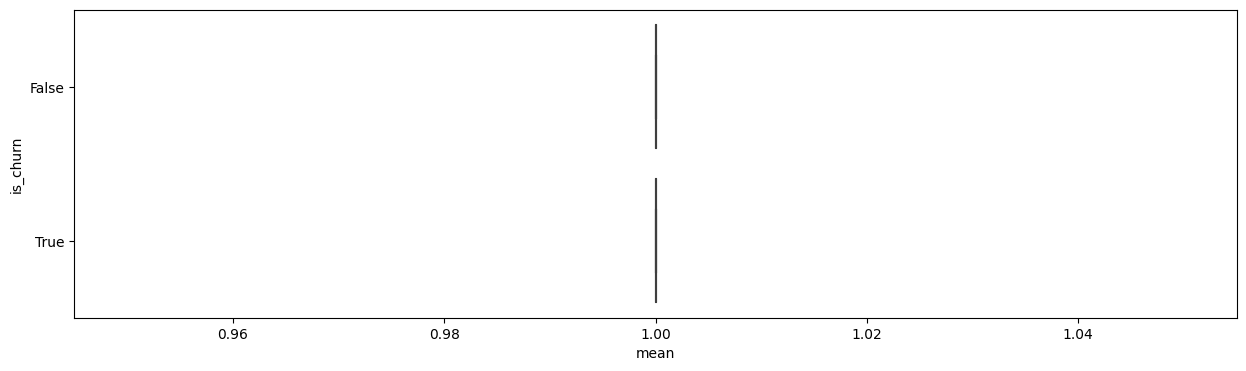

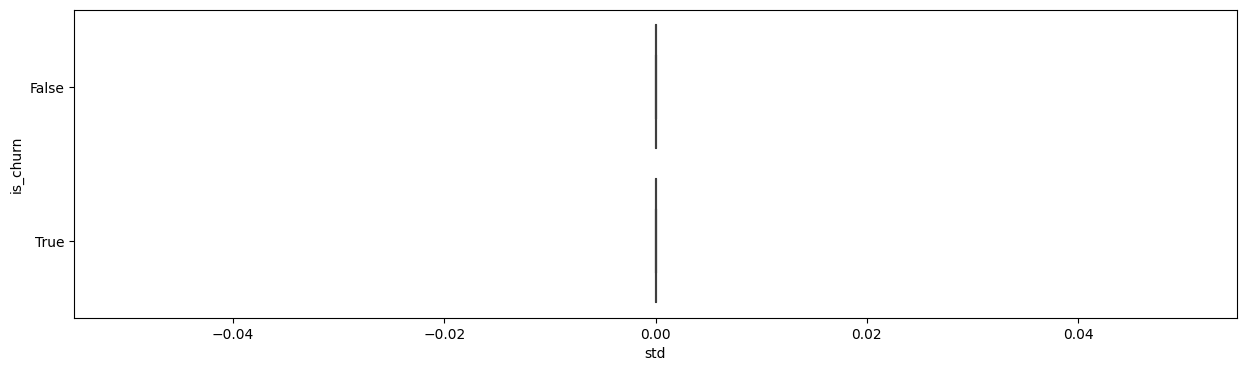

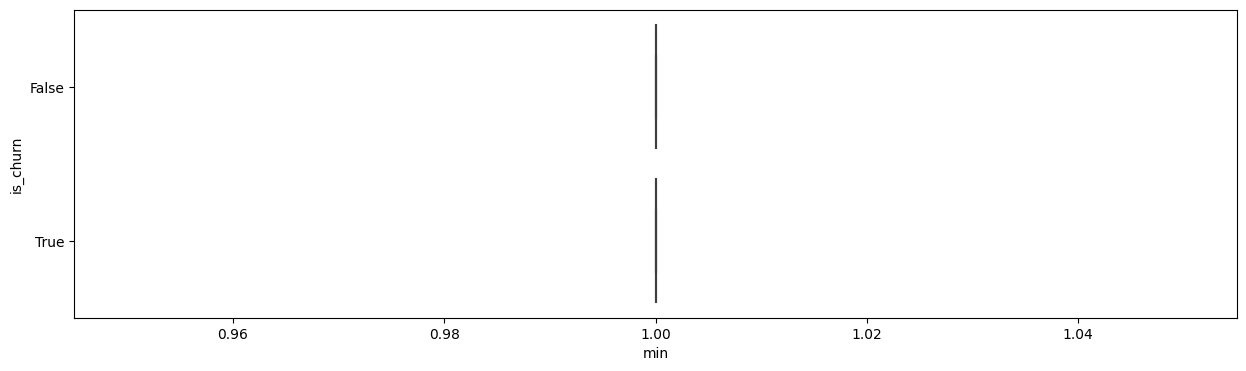

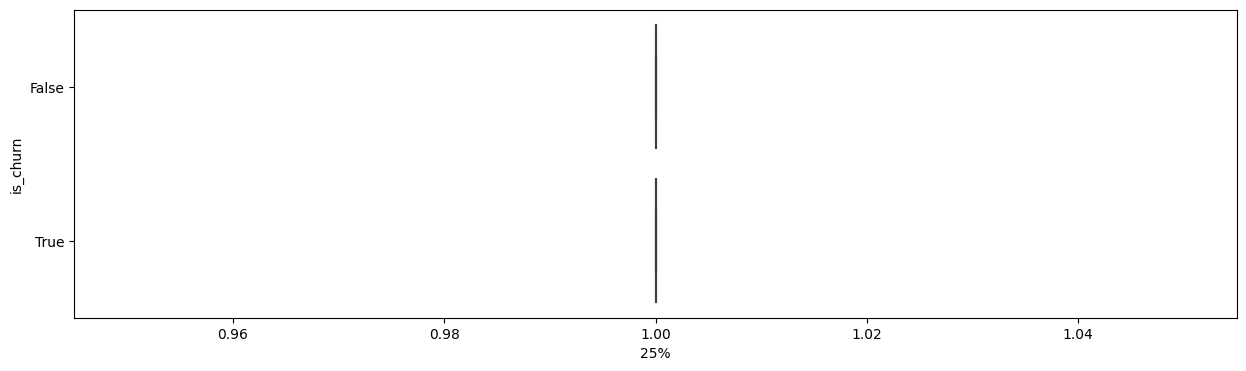

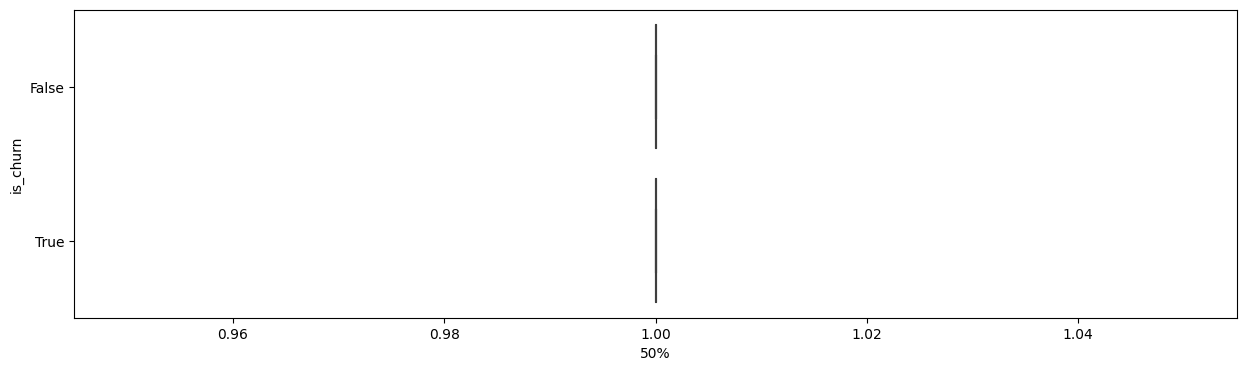

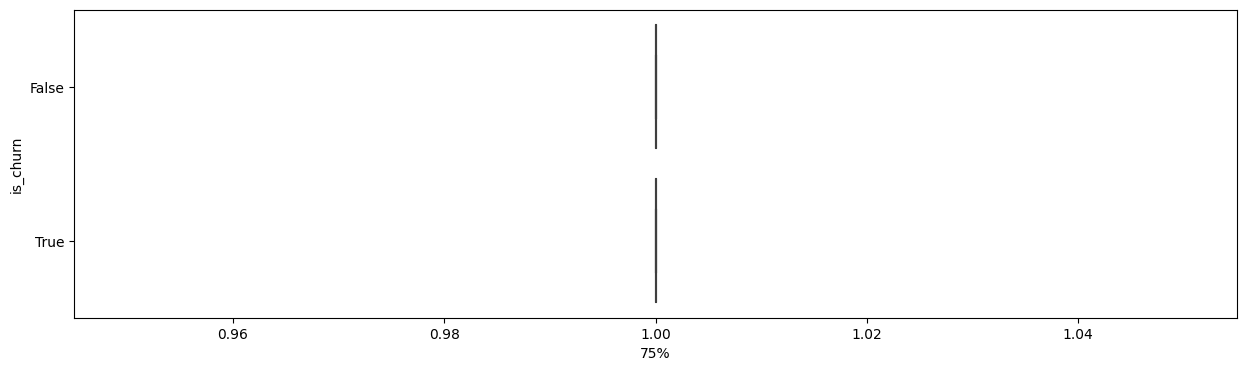

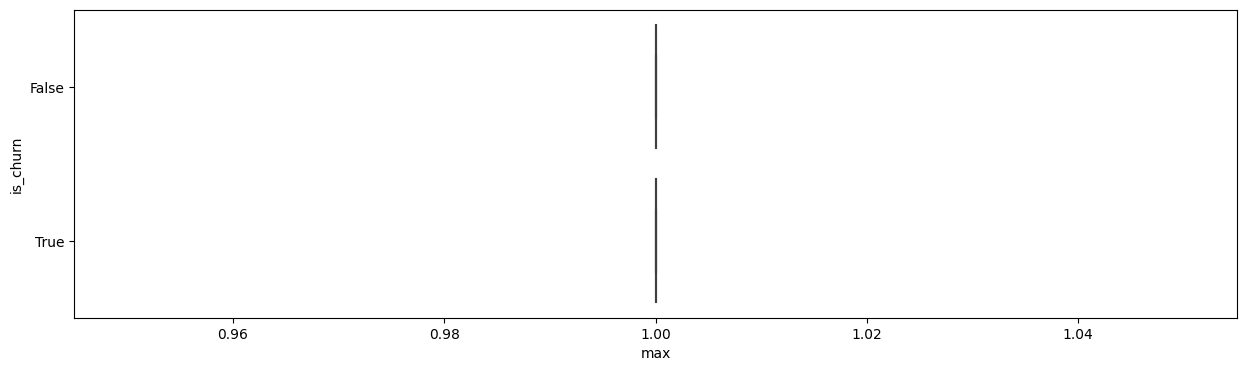

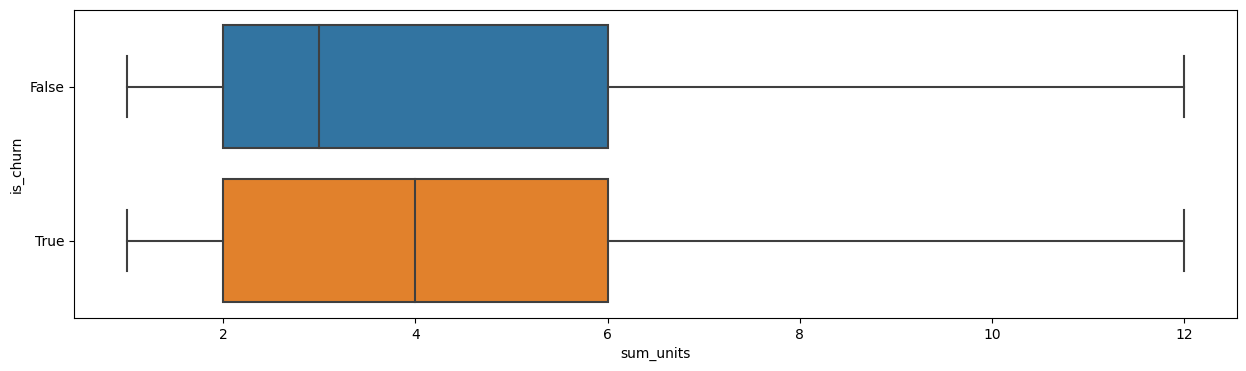

In [ ]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

###### Conclusão

A única feature extraída de `units` com algum potencial preditivo é a **soma da quantidade de unidades compradas**, cuja média e mediana têm uma diferença relevante nos dois grupos de _targets_.

##### Variável `price`

###### Todos os registros

,count,mean,std,min,10%,20%,25%,30%,40%,50%,60%,70%,75%,80%,90%,max
price,168472.0,451.384291,857.76928,-8999.0,5.0,29.0,39.9,52.9,99.0,162.58,266.49,500.0,699.0,884.762,1494.0,25648.9


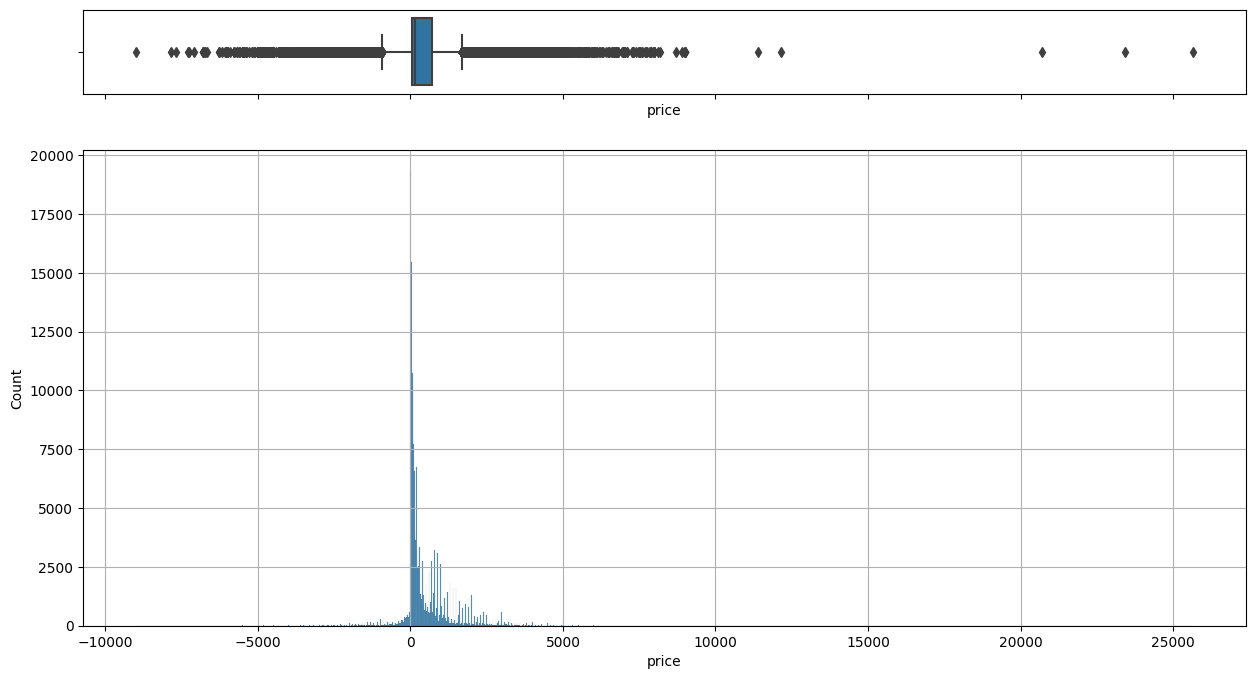

In [ ]:
desc = distplot(orders, 'price', describe_kw={'percentiles': list(perc) + [.25, .75]})
desc

A quantidade de _outliers_ é muito grande, precisam ser eliminados para uma visualização melhor. Para cortam ambos os gráficos, será usado o cálculo dos limites inferior e superior dos _outliers_ usando o método da [distância interquartil](https://aprendendogestao.com.br/2016/08/26/identificacao-de-outliers/) - a mesma usada na biblioteca gráfica.


In [ ]:
iqr = desc['75%'] - desc['25%']
lsup = (desc['mean'] + 1.5 * iqr).price
linf = (desc['mean'] - 1.5 * iqr).price
linf, lsup

(-537.2657092573247, 1440.0342907426755)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
price,146504.0,294.094802,372.027305,-535.0,6.49,29.9,49.9,87.9,129.97,199.9,329.0,599.9,899.0,1440.0


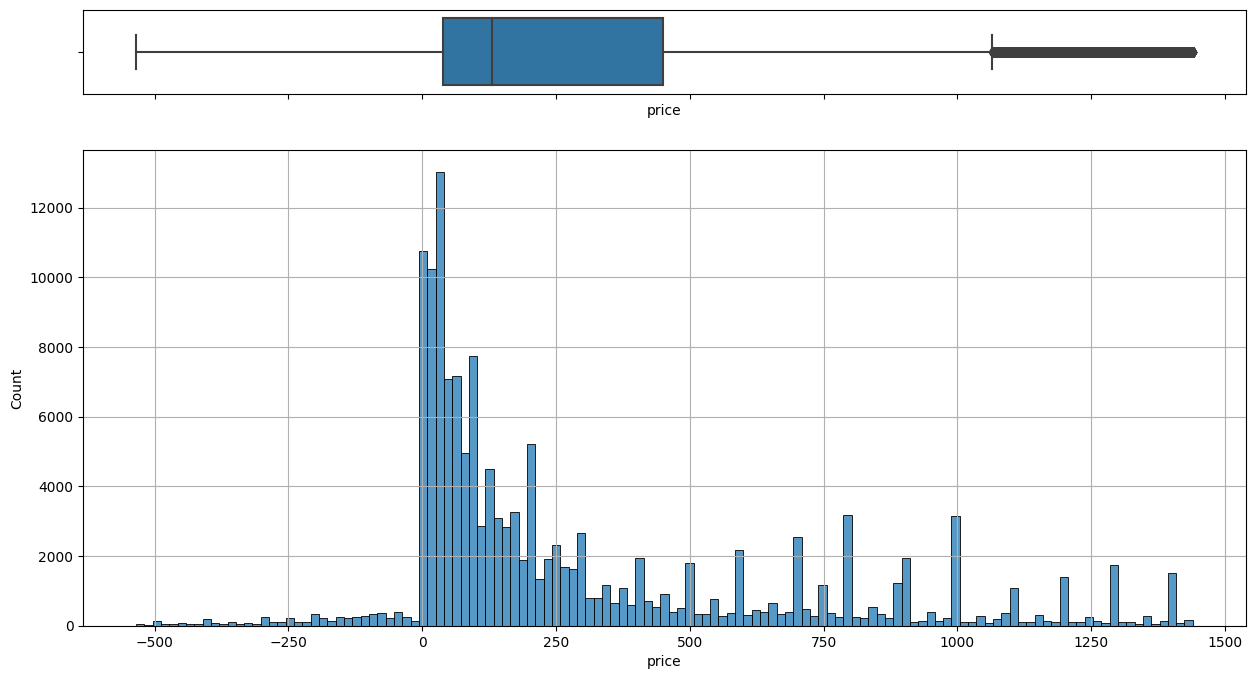

In [ ]:
index = (orders.price >= linf) & (orders.price <= lsup)
distplot(orders[index], 'price', describe_kw={'percentiles': perc})

###### Preços Negativos

Também é fácil observar que existem **preços negativos**; esses preços podem ser referentes a uma devolução ou cancelamento da compra.Uma evidência para isso é a ocorrência de **preços complementares**, ou seja, quando se somam todas as compras de um cliente, esses preços possuem contrapartes positivas e se anulam. Esse cálculo deve ser feito com o **volume**, isto é, a multiplicação dos preços pelas quantidades (`units`).

In [ ]:
client_ids = clients_tr.index
data = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'units', 'price']]
data['volume'] = data.units * data.price
print(data.shape)
data.head()

(101005, 4)


,client_id,units,price,volume
0,cx05072,1.0,49.90,49.90
1,cx05072,1.0,69.90,69.90
12,cx03836,1.0,54.92,54.92
13,cx03836,1.0,-54.92,-54.92
14,cx03836,1.0,229.90,229.90


In [ ]:
features = data.groupby('client_id').volume.sum().to_frame()
features['negative_orders'] = data.groupby('client_id').price.apply(lambda x: (x < 0).mean())
features = features.join(clients_tr[['is_churn']])
features

,volume,negative_orders,is_churn
client_id,,,
cx00002,1494.00,0.0,False
cx00004,3178.19,0.0,False
cx00005,777.95,0.0,True
cx00008,2045.24,0.0,False
cx00009,1999.00,0.0,False
...,...,...,...
cx38806,1536.00,0.0,True
cx38807,2035.74,0.0,False
cx38808,1498.00,0.0,False


In [ ]:
features.negative_orders.agg(['sum', 'mean'])

sum     814.158694
mean      0.034954
Name: negative_orders, dtype: float64

count         mean          std           min  \
                is_churn                                                    
volume          False     19085.0  2125.151346  2918.000354 -1.122698e+04   
                True       4207.0  2050.594131  3567.945198 -7.105427e-15   
negative_orders False     19085.0     0.032365     0.093354  0.000000e+00   
                True       4207.0     0.046700     0.111097  0.000000e+00   

                             25%      50%      75%            max  
                is_churn                                           
volume          False     457.01  1362.47  2862.96  181870.510000  
                True      524.04  1420.00  2791.07  144149.430000  
negative_orders False       0.00     0.00     0.00       0.800000  
                True        0.00     0.00     0.00       0.666667

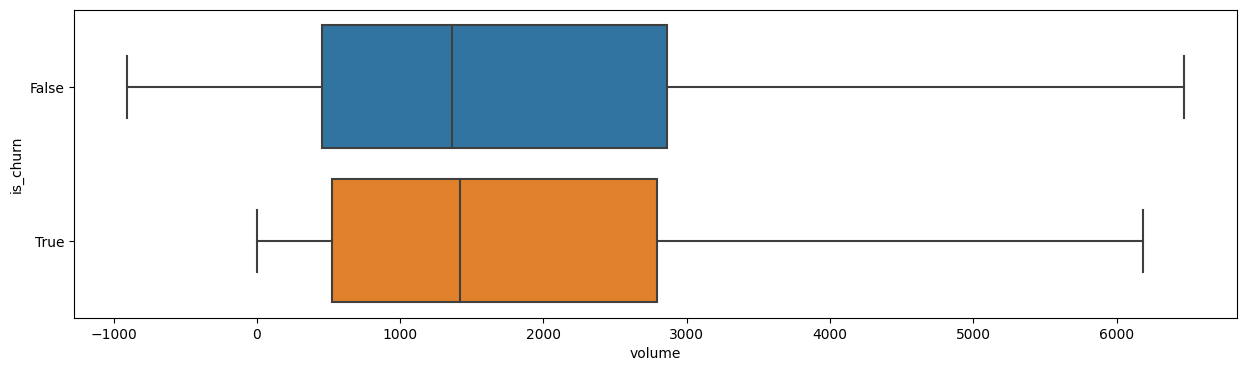

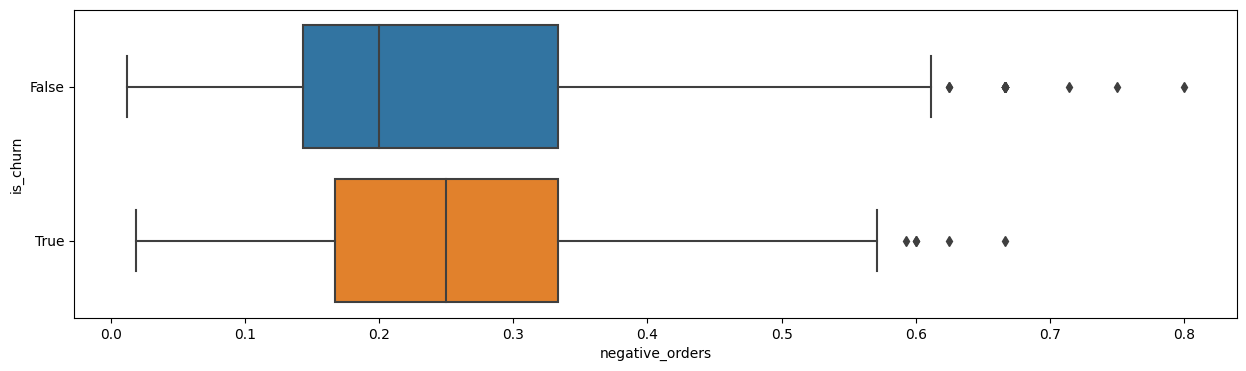

In [ ]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=features, x='volume', y='is_churn', orient='h', showfliers=False)
plt.figure(figsize=(15, 4))
sns.boxplot(data=features[features.negative_orders > 0], x='negative_orders', y='is_churn', orient='h', showfliers=True)
features.pivot(columns='is_churn').describe().T

###### Volumes Negativos

O volume apresenta algumas **somas negativas**, o que não colabora com a hipótese de **soma zero** da devolução/cancelamento da compra. Como potencial preditivo, o volume apresentou pouca diferença de média, _std_ e mediana. Já a **média de compras negativas** apresentou uma distribuição levemente mais deslocada entre **_targets_ negativo e positivo**.

Uma análise ainda precisa ser feita para entender o poder preditivo de ter compras de valor negativo (apenas a presença) no _churn_.



In [ ]:
# Matriz de Ocorrência
cm = pd.DataFrame(
    index=['negative_false', 'negative_true'],
    columns=['churn_false', 'churn_true'],
    data=confusion_matrix(features.negative_orders <= 0, features.is_churn)
)
cm / cm.sum()

,churn_false,churn_true
negative_false,0.138014,0.178274
negative_true,0.861986,0.821726


In [ ]:
(features[features.is_churn].negative_orders < 0).agg(['mean', 'sum'])
# features

mean    0.0
sum     0.0
Name: negative_orders, dtype: float64

A Matriz de Ocorrência não tem um sinal muito forte, a distribuição no _target_ não apresenta diferença significativa. A média de casos negativos parece uma alternativa melhor como feature.

 Como exploração final, é interessante fazer a valiação dos preços negativos em casos de **volumes  negativos**.

In [ ]:
client_ids = features[features.volume < 0].index
client_ids.to_series().describe()

count           6
unique          6
top       cx00095
freq            1
Name: client_id, dtype: object

In [ ]:
# dados de compras dos clientes com `volume` negativo
temp = orders.loc[
    orders.client_id.isin(client_ids), 
    ['order_id', 'datetime', 'client_id', 'product_id', 'units', 'price']
]

temp = pd.merge(
    temp.reset_index(),
    (temp
     .reset_index()
     .groupby(['order_id', 'product_id'])
     .apply(lambda x: (x.units * x.price).sum())
     .to_frame()
     .rename(columns={0: 'volume'})
     .reset_index()),
     on=['order_id', 'product_id']    
)

# tabela
pd.merge(
    temp[(temp.volume < 0)],
    clients_tr[['is_churn']].reset_index(),
    on='client_id'
).set_index(['client_id', 'is_churn', 'order_id', 'product_id']).sort_index()

index            datetime    units  \
client_id is_churn order_id product_id                                        
cx00095   False    ox050092 px04594     100310 2019-09-26 11:26:00  1.00000   
                   ox092140 px02289     100301 2019-09-26 11:22:00  1.00000   
                   ox106174 px00532     100313 2019-10-04 15:31:00  1.00000   
                            px07492     100312 2019-10-04 15:31:00  1.00000   
                            px11798     100315 2019-10-04 15:31:00  1.00000   
cx12068   False    ox073468 px11917     154760 2019-10-03 00:36:00  0.44650   
                            px11917     154761 2019-10-03 10:50:00  0.94200   
                            px11917     154762 2019-10-03 09:23:00  1.00000   
cx15616   False    ox092572 px08616      77397 2019-07-06 09:39:00  0.16668   
                            px08616      77398 2019-07-06 10:35:00  1.00000   
                            px08616      77399 2019-07-06 09:39:00  0.83332   
cx26925   False    ox052090 px03540      33932 2019-07-13 13:07:00  0.14877   
                            px03540      33934 2019-07-13 13:07:00  0.85123   
                   ox093157 px03540      33928 2019-07-13 12:55:00  0.14877   
                            px03540      33929 2019-07-13 12:55:00  0.85123   
cx28574   False    ox122278 px12166      35850 2019-10-22 10:46:00  0.73611   
                            px12166      35851 2019-10-22 16:36:00  1.00000   
                            px12166      35852 2019-10-22 10:46:00  0.26389   
cx37795   True     ox111182 px05330     130467 2019-01-04 12:36:00  1.00000   
                            px09374     130465 2019-01-04 12:36:00  1.00000   
                            px10215     130466 2019-01-04 12:36:00  2.00000   

                                          price        volume  
client_id is_churn order_id product_id                         
cx00095   False    ox050092 px04594    -4143.08 -4.143080e+03  
                   ox092140 px02289     -291.69 -2.916900e+02  
                   ox106174 px00532    -1102.52 -1.102520e+03  
                            px07492    -2999.66 -2.999660e+03  
                            px11798    -3387.03 -3.387030e+03  
cx12068   False    ox073468 px11917     -200.00 -7.770000e+01  
                            px11917     -200.00 -7.770000e+01  
                            px11917      200.00 -7.770000e+01  
cx15616   False    ox092572 px08616     -289.95 -2.842171e-14  
                            px08616      289.95 -2.842171e-14  
                            px08616     -289.95 -2.842171e-14  
cx26925   False    ox052090 px03540    -3994.06 -3.994060e+03  
                            px03540    -3994.06 -3.994060e+03  
                   ox093157 px03540    -3994.06 -3.994060e+03  
                            px03540    -3994.06 -3.994060e+03  
cx28574   False    ox122278 px12166     -144.00 -7.105427e-15  
                            px12166      144.00 -7.105427e-15  
                            px12166     -144.00 -7.105427e-15  
cx37795   True     ox111182 px05330      -39.00 -3.900000e+01  
                            px09374      -39.90 -3.990000e+01  
                            px10215      -39.90 -7.980000e+01

Erros verificados para as compras com volume zero:
- Erro no cálculo da soma das unidades;
- Apenas no primeiro cliente, existem compras negativas sem um par positivo, denotando um motivo desconhecido que não corrobora com a hipótese de devolução/cancelamento.

###### Estatísticas Descritivas do Preço

É interessante verificar se algumas das estatísticas descritivas de todos os preços pagos por cada cliente têm algum poder preditivo de _churn_. 

In [ ]:
%%time
client_ids = clients_tr.index
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'price']]
features = (
    stats.groupby('client_id').price.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
                  mean          std      min        25%       50%        75%      max  is_churn
client_id                                                                                      
cx00002    1494.000000          NaN  1494.00  1494.0000  1494.000  1494.0000  1494.00     False
cx00004     454.027143   620.273303   100.22   110.0850   139.900   459.4500  1799.00     False
cx00005     194.487500    83.919906    72.00   173.9625   228.475   249.0000   249.00      True
cx00008    1022.620000  1235.485252   149.00   585.8100  1022.620  1459.4300  1896.24     False
cx00009     999.500000  1406.435388     5.00   502.2500   999.500  1496.7500  1994.00     False
cx00010     207.202500   156.269568    29.90   100.5500   219.500   326.1525   359.91     False
cx00011     182.250000   280.913393     1.00     3.9400    66.960   245.2700   594.08      True
cx00015     132.653333    41.472928    99.04   109.4800   119.920   149.4600   179.00      True
cx00016     936.633333   789.

In [ ]:
# Verificando Nulos - só ocorrem no `std`
features.isna().sum()

mean           0
std         4873
min            0
25%            0
50%            0
75%            0
max            0
is_churn       0
dtype: int64

count         mean          std       min         25%  \
     is_churn                                                            
mean False     19085.0   549.215816   601.092225 -1616.460  147.340000   
     True       4207.0   524.768104   576.414183 -1560.125  149.930000   
std  False     19085.0   460.029881   580.986506    -1.000   14.785603   
     True       4207.0   508.226119   622.270522    -1.000   54.287349   
min  False     19085.0   122.949922   755.779529 -8999.000    5.040000   
     True       4207.0    41.959867   749.727965 -6740.000    5.000000   
25%  False     19085.0   310.612701   603.385296 -5255.100   44.910000   
     True       4207.0   255.817823   587.697433 -5494.080   39.900000   
50%  False     19085.0   482.257479   632.378641 -4500.000   96.000000   
     True       4207.0   464.991166   621.045245 -3739.000   99.900000   
75%  False     19085.0   726.803763   753.540502 -2694.100  176.550000   
     True       4207.0   741.309603   759.368945     0.010  196.748750   
max  False     19085.0  1146.471962  1070.013508     0.000  278.910000   
     True       4207.0  1144.770578  1074.200536     0.010  290.005000   

                      50%          75%           max  
     is_churn                                         
mean False     375.780000   735.455000  12891.905000  
     True      371.872500   705.538810  13550.890000  
std  False     306.820703   684.760302  18041.115344  
     True      356.253708   733.591004  13942.222395  
min  False      49.900000   189.910000   6119.100000  
     True       39.900000   144.985000   5194.200000  
25%  False     129.900000   369.000000   6513.407500  
     True      117.970000   324.250000   8621.570000  
50%  False     243.435000   649.000000  12891.905000  
     True      239.900000   643.680000  13550.890000  
75%  False     510.517500  1002.620000  19270.402500  
     True      561.540000  1044.000000  18480.210000  
max  False     898.990000  1659.900000  25648.900000  
     True      899.000000  1599.900000  23409.530000

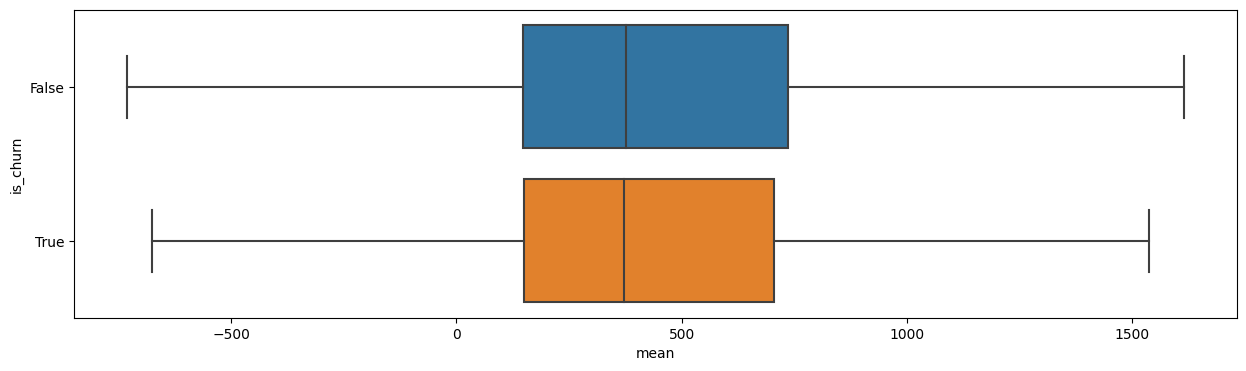

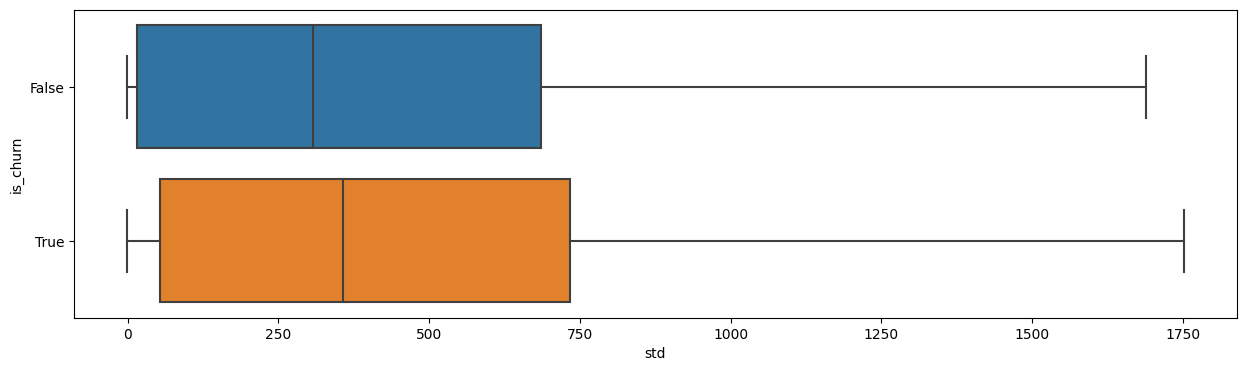

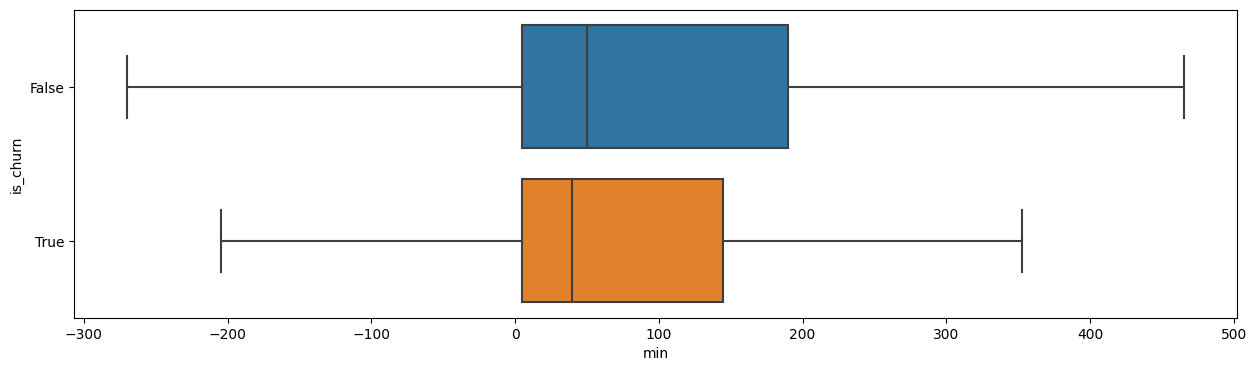

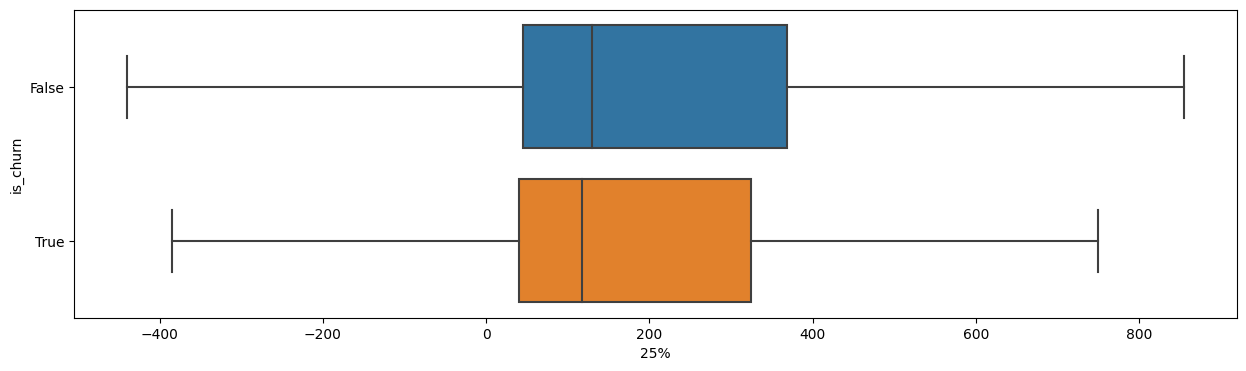

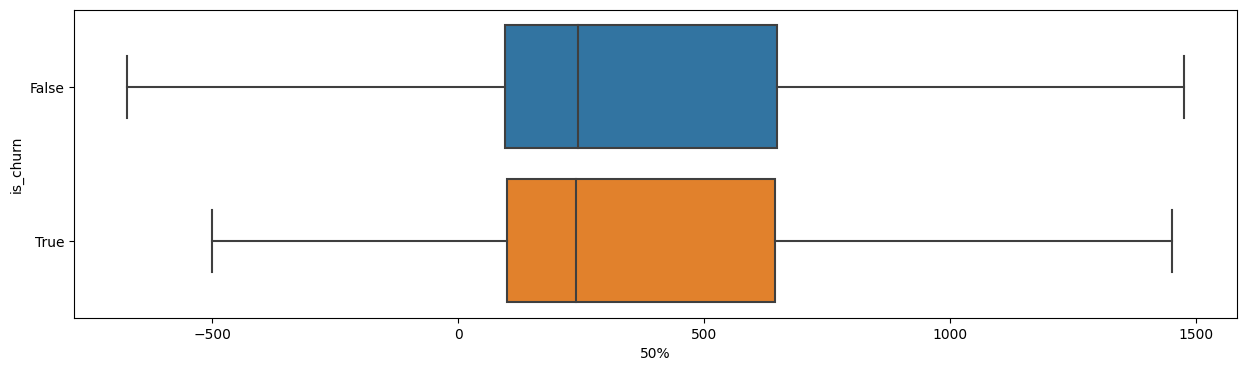

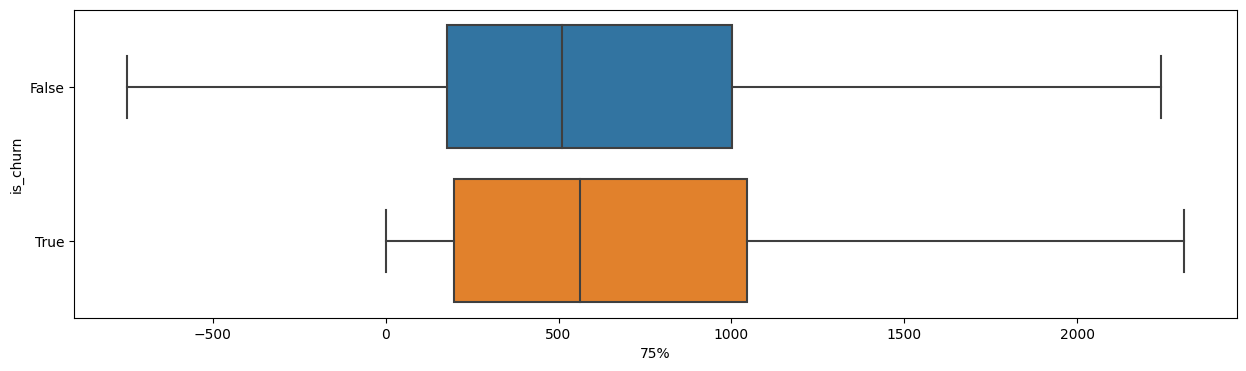

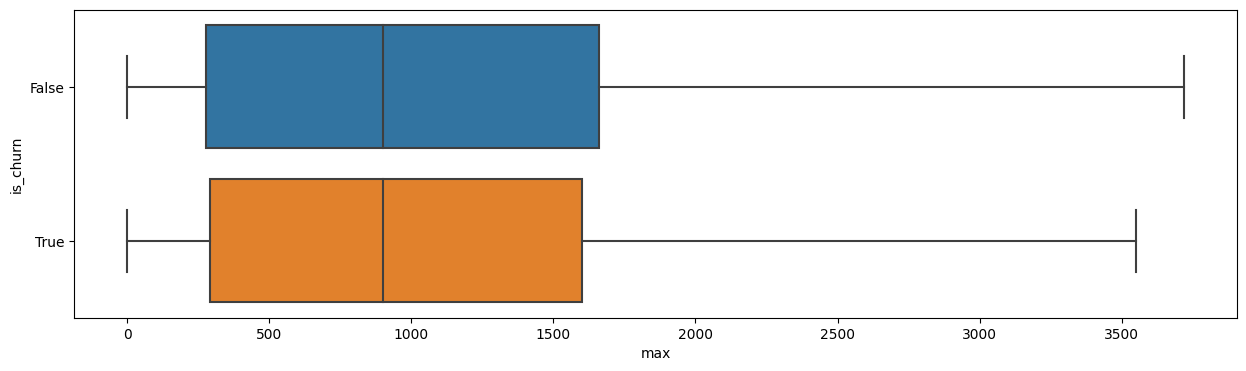

In [ ]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

###### Conclusão

Mesmo com os problemas de itens não complementares, todos os clientes nessa situação esão na mesma categoria e portando isso não tende a afetar o treinamento de um modelo. 

De todas as análises se tira que a soma dos volumes parece ser uma _feature_ interessante. As estatísticas descritivas do preço também aparentam ter um bom poder preditivo.

##### Variável `installments`

É o **número de parcelas** usadas para pagar cada compra. Como contém **muitos valores nulos**, pode-se pensar em um `imputer` ou em eliminar a variável. Caso seja optado um `imputter`, pode-se usar o **conhecimento de domínio de negócios** de que o número padrão de pagamentos é sempre **uma parcela**.

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
installments,36545.0,4.551293,4.704385,1.0,1.0,1.0,1.0,2.0,3.0,4.0,6.0,10.0,10.0,24.0


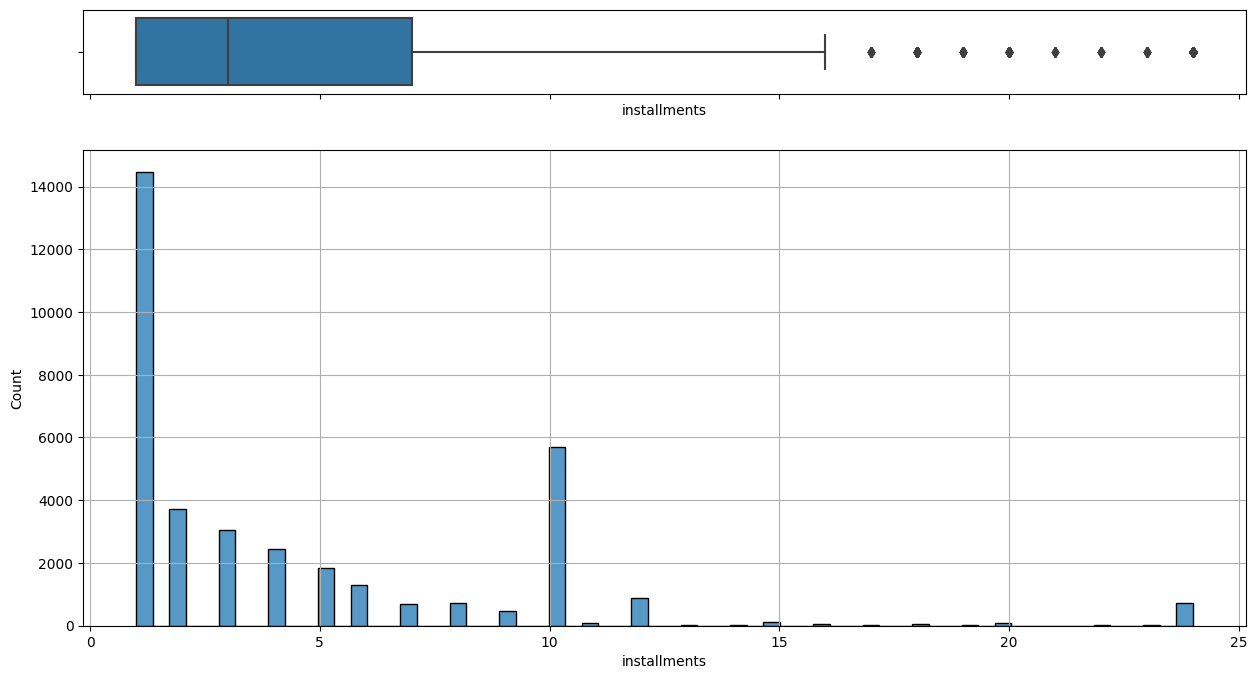

In [ ]:
distplot(orders, 'installments', describe_kw={'percentiles': perc})

In [ ]:
orders.installments.isnull().agg(['sum', 'mean'])

sum     131927.00000
mean         0.78308
Name: installments, dtype: float64

###### Sem `imputter`

In [ ]:
%%time
client_ids = clients_tr.index
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'installments']]
features = (
    stats.groupby('client_id').installments.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
           mean       std  min   25%  50%   75%   max  is_churn
client_id                                                      
cx00002     NaN       NaN  NaN   NaN  NaN   NaN   NaN     False
cx00004     4.5  2.738613  3.0  3.00  3.5  4.00  10.0     False
cx00005     NaN       NaN  NaN   NaN  NaN   NaN   NaN      True
cx00008     NaN       NaN  NaN   NaN  NaN   NaN   NaN     False
cx00009     NaN       NaN  NaN   NaN  NaN   NaN   NaN     False
cx00010     2.5  2.121320  1.0  1.75  2.5  3.25   4.0     False
cx00011     NaN       NaN  NaN   NaN  NaN   NaN   NaN      True
cx00015     NaN       NaN  NaN   NaN  NaN   NaN   NaN      True
cx00016     1.0       NaN  1.0  1.00  1.0  1.00   1.0      True
cx00018     NaN       NaN  NaN   NaN  NaN   NaN   NaN     False
CPU times: total: 14.9 s
Wall time: 14.9 s


In [ ]:
# Verificando Nulos - todas as features
features.isna().sum()

mean        14903
std         18649
min         14903
25%         14903
50%         14903
75%         14903
max         14903
is_churn        0
dtype: int64

count      mean       std  min  25%  50%  75%        max
     is_churn                                                            
mean False     19085.0  1.199371  3.786588 -1.0 -1.0 -1.0  2.0  24.000000
     True       4207.0  0.237149  3.032971 -1.0 -1.0 -1.0 -1.0  24.000000
std  False     19085.0 -0.285167  1.816928 -1.0 -1.0 -1.0 -1.0  16.263456
     True       4207.0 -0.687664  1.191118 -1.0 -1.0 -1.0 -1.0  16.263456
min  False     19085.0  0.774430  3.342717 -1.0 -1.0 -1.0  1.0  24.000000
     True       4207.0  0.072974  2.759439 -1.0 -1.0 -1.0 -1.0  24.000000
25%  False     19085.0  0.959955  3.540681 -1.0 -1.0 -1.0  1.0  24.000000
     True       4207.0  0.142322  2.870008 -1.0 -1.0 -1.0 -1.0  24.000000
50%  False     19085.0  1.161409  3.827073 -1.0 -1.0 -1.0  2.0  24.000000
     True       4207.0  0.226171  3.051918 -1.0 -1.0 -1.0 -1.0  24.000000
75%  False     19085.0  1.406419  4.173973 -1.0 -1.0 -1.0  2.0  24.000000
     True       4207.0  0.320953  3.266612 -1.0 -1.0 -1.0 -1.0  24.000000
max  False     19085.0  1.713545  4.711221 -1.0 -1.0 -1.0  3.0  24.000000
     True       4207.0  0.423104  3.514959 -1.0 -1.0 -1.0 -1.0  24.000000

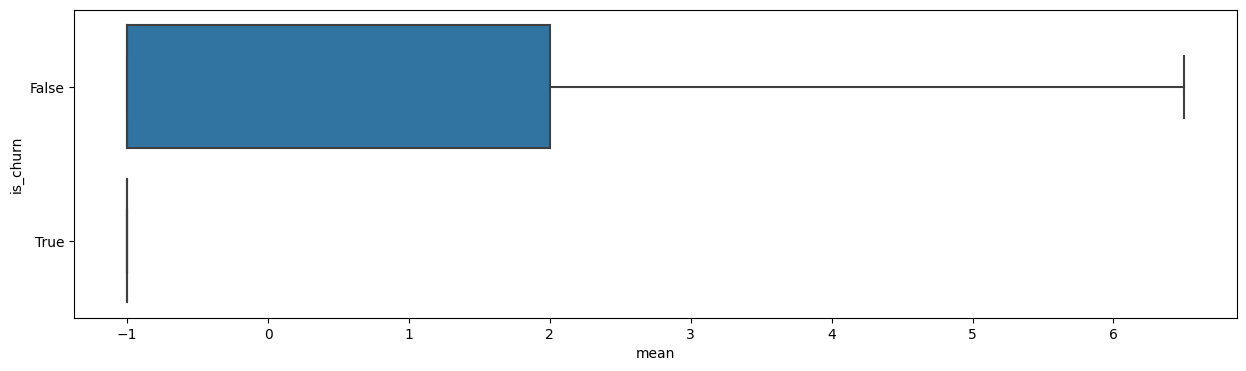

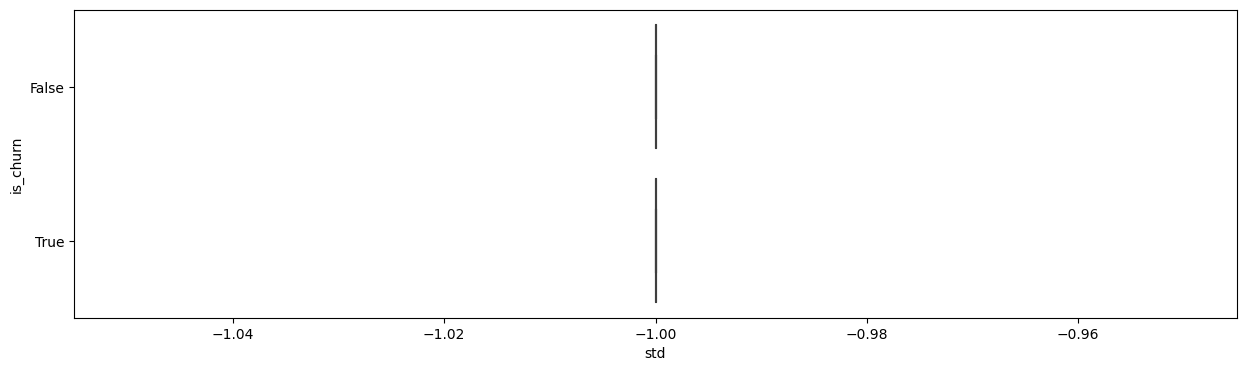

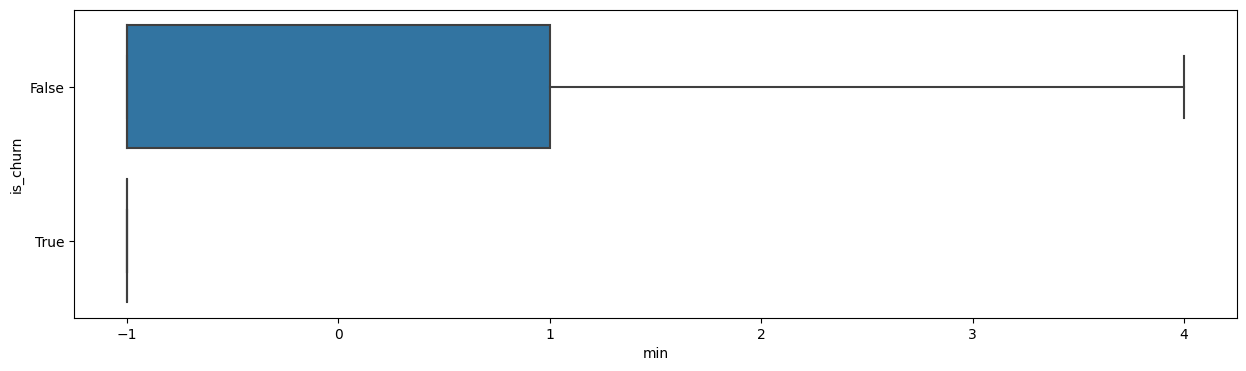

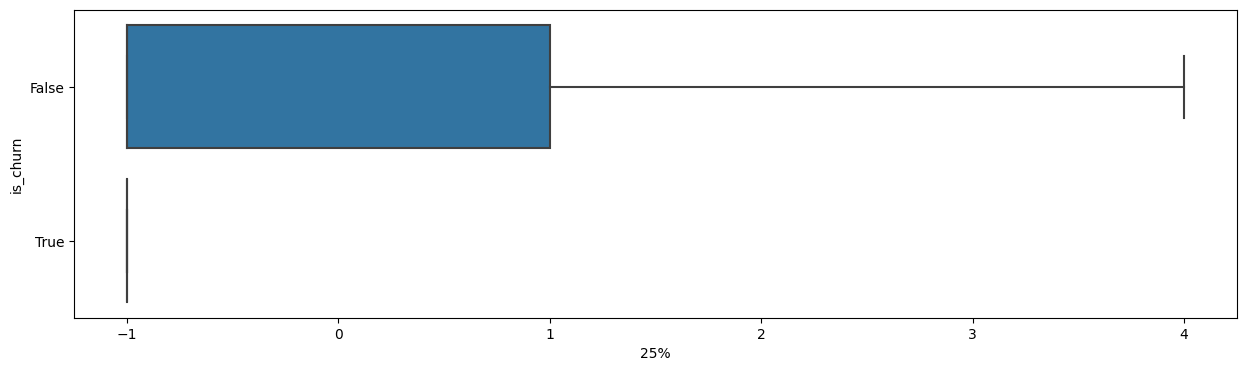

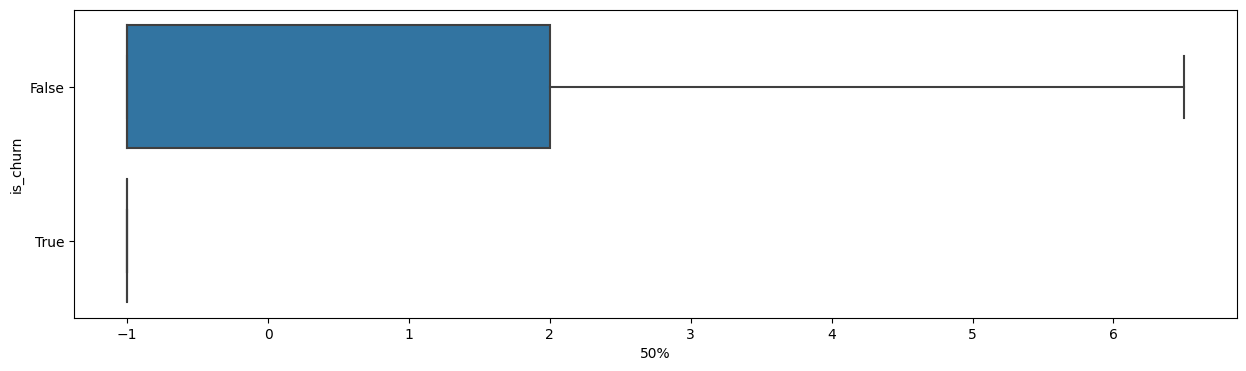

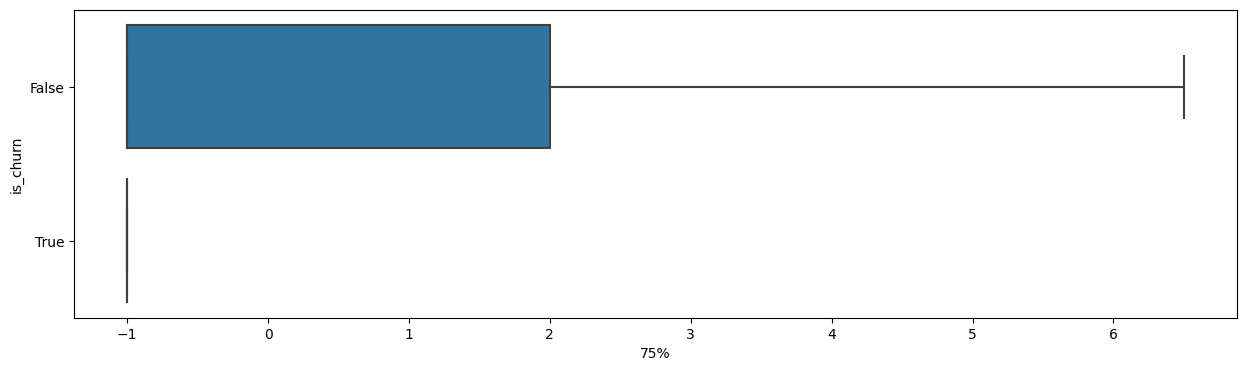

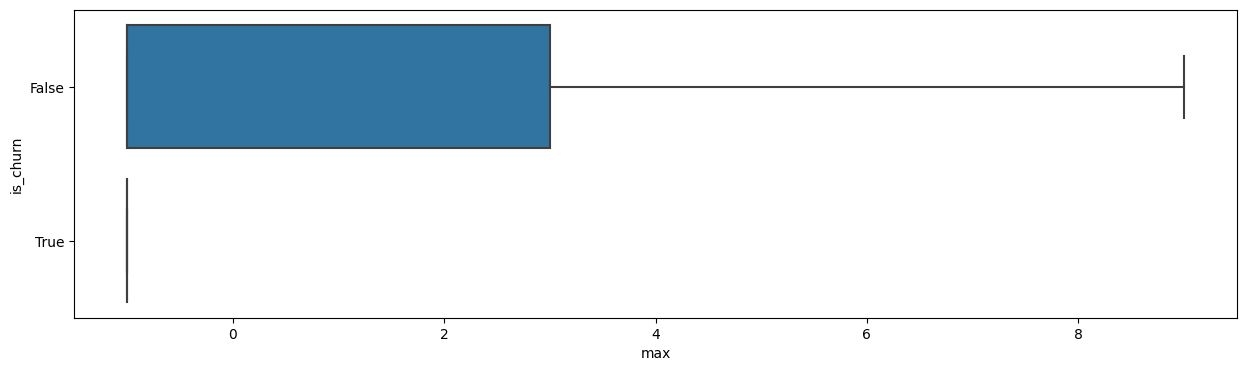

In [ ]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

Tirando o _std_, as estatísticas descritivas sem `imputter` dão uma impressão de que a mera presença de **não nulos** ajuda a prever o _churn_.

###### Considerando Categórica

Dada a hipótese levantada anteriormente, faz sentido testar a variável como uma categórica (não nulo é True, nulo é False)

In [ ]:
# Matriz de Ocorrência
cm = pd.DataFrame(
    index=['null_false', 'null_true'],
    columns=['churn_false', 'churn_true'],
    data=confusion_matrix(features['mean'].notnull(), features.is_churn)
)
cm / cm.sum()

,churn_false,churn_true
null_false,0.609327,0.778227
null_true,0.390673,0.221773


Há um potencial preditivo presente nessa variável, que começa a diferenciar as classes caso não seja nula.

###### Com `imputter` completando com 1 parcela

In [ ]:
%%time
client_ids = clients_tr.index
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'installments']].fillna(1)
features = (
    stats.groupby('client_id').installments.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
           mean       std  min  25%  50%   75%   max  is_churn
client_id                                                     
cx00002    1.00       NaN  1.0  1.0  1.0  1.00   1.0     False
cx00004    4.00  2.828427  1.0  3.0  3.0  4.00  10.0     False
cx00005    1.00  0.000000  1.0  1.0  1.0  1.00   1.0      True
cx00008    1.00  0.000000  1.0  1.0  1.0  1.00   1.0     False
cx00009    1.00  0.000000  1.0  1.0  1.0  1.00   1.0     False
cx00010    1.75  1.500000  1.0  1.0  1.0  1.75   4.0     False
cx00011    1.00  0.000000  1.0  1.0  1.0  1.00   1.0      True
cx00015    1.00  0.000000  1.0  1.0  1.0  1.00   1.0      True
cx00016    1.00  0.000000  1.0  1.0  1.0  1.00   1.0      True
cx00018    1.00       NaN  1.0  1.0  1.0  1.00   1.0     False
CPU times: total: 15.7 s
Wall time: 15.7 s


In [ ]:
# Verificando Nulos - só ocorrem no `std`
features.isna().sum()

mean           0
std         4873
min            0
25%            0
50%            0
75%            0
max            0
is_churn       0
dtype: int64

count      mean       std  min  25%  50%  75%        max
     is_churn                                                            
mean False     19085.0  1.842960  2.084028  1.0  1.0  1.0  1.5  24.000000
     True       4207.0  1.424295  1.458461  1.0  1.0  1.0  1.0  20.000000
std  False     19085.0  0.567318  1.979545 -1.0  0.0  0.0  0.0  16.263456
     True       4207.0  0.262550  1.502388 -1.0  0.0  0.0  0.0  16.263456
min  False     19085.0  1.289232  1.546618  1.0  1.0  1.0  1.0  24.000000
     True       4207.0  1.117423  0.932327  1.0  1.0  1.0  1.0  20.000000
25%  False     19085.0  1.431124  1.731511  1.0  1.0  1.0  1.0  24.000000
     True       4207.0  1.200202  1.125499  1.0  1.0  1.0  1.0  20.000000
50%  False     19085.0  1.643778  2.114535  1.0  1.0  1.0  1.0  24.000000
     True       4207.0  1.308533  1.463701  1.0  1.0  1.0  1.0  24.000000
75%  False     19085.0  2.074456  2.744154  1.0  1.0  1.0  1.0  24.000000
     True       4207.0  1.554314  2.006607  1.0  1.0  1.0  1.0  24.000000
max  False     19085.0  2.932198  4.066173  1.0  1.0  1.0  3.0  24.000000
     True       4207.0  1.979558  2.935033  1.0  1.0  1.0  1.0  24.000000

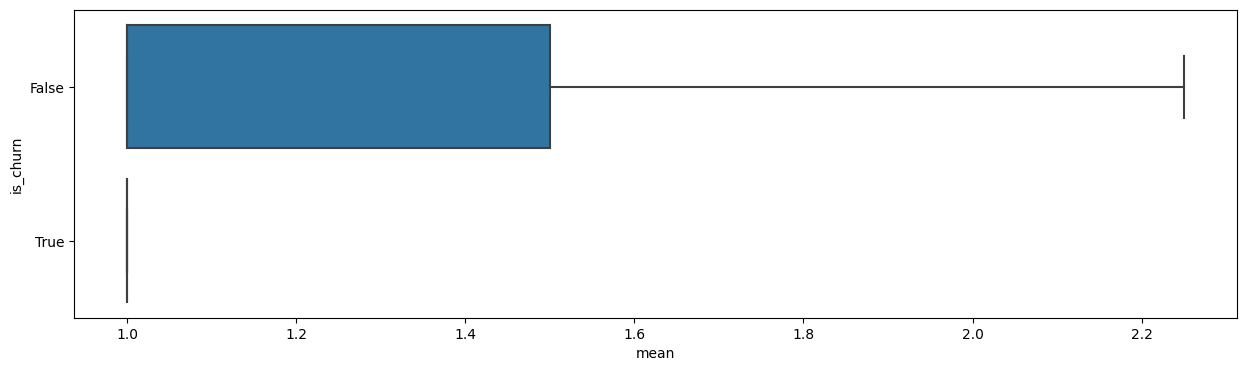

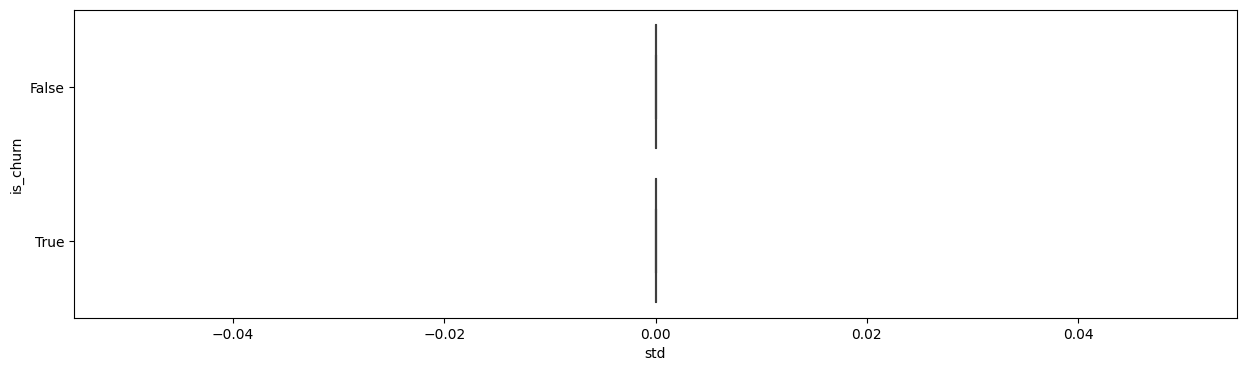

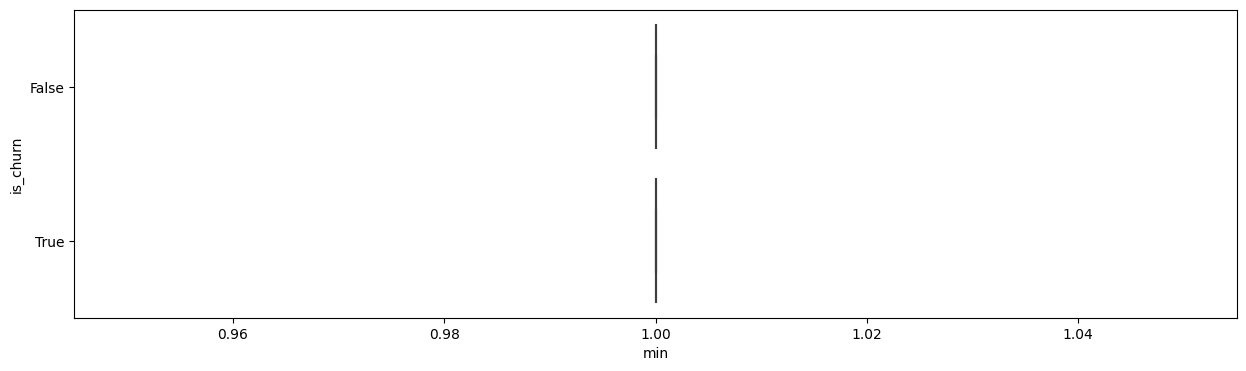

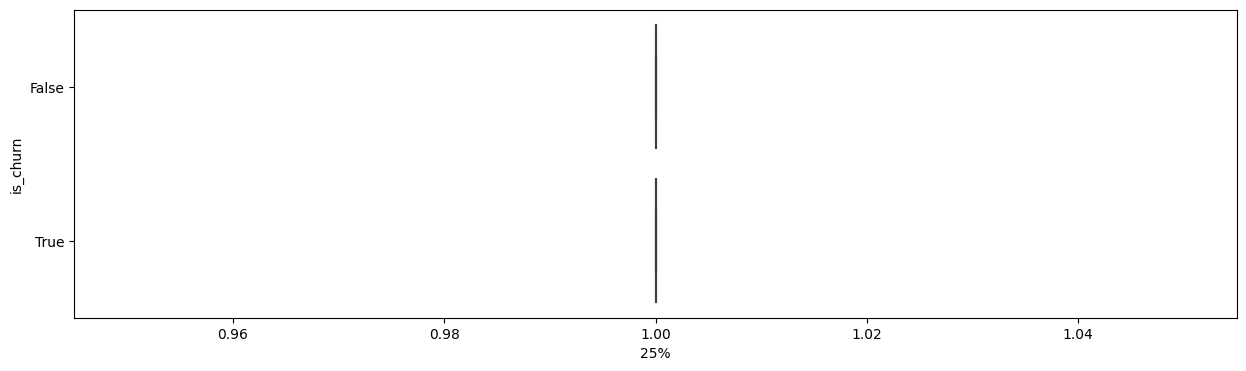

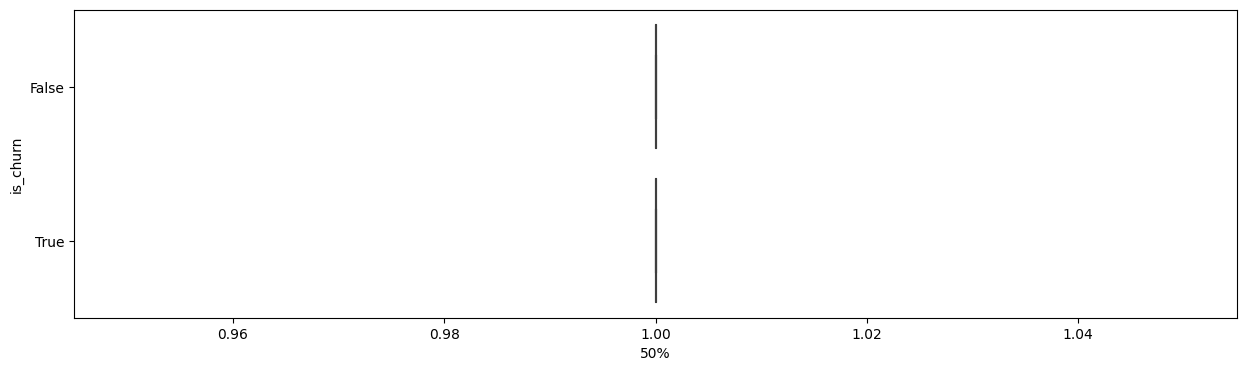

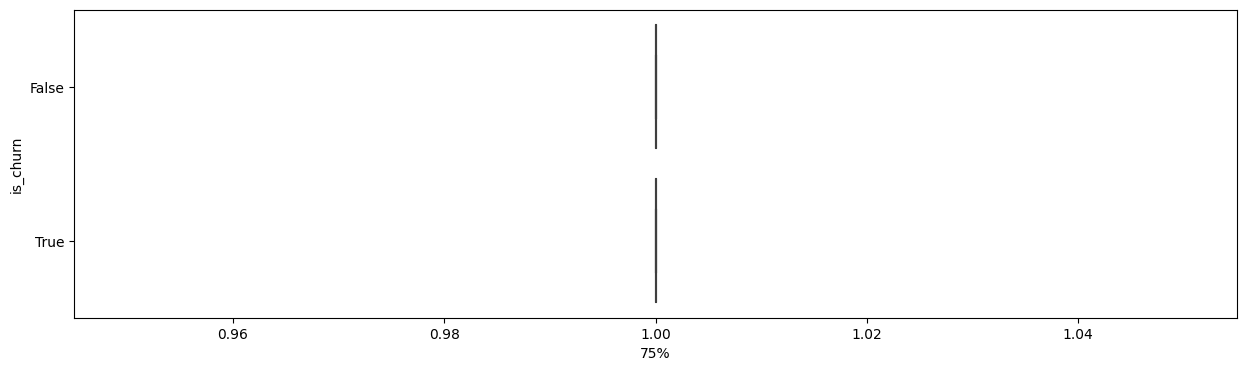

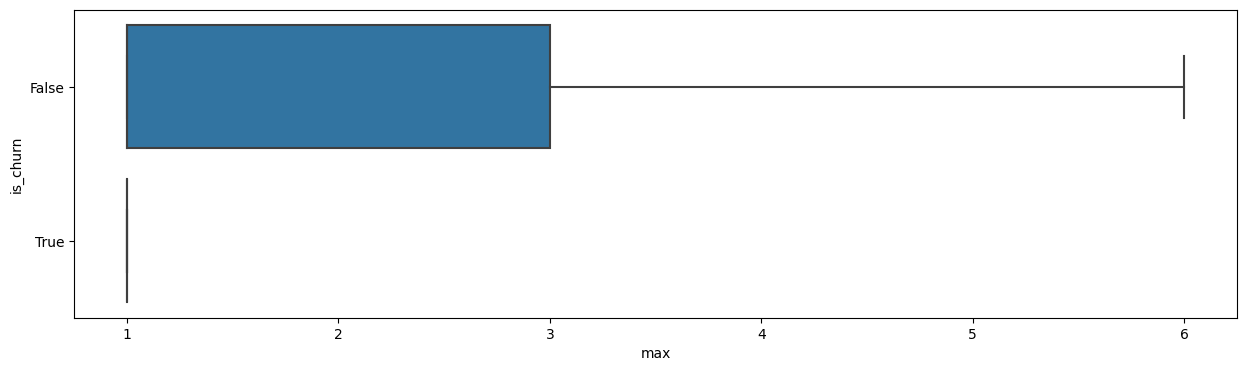

In [ ]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

Nesse caso, parece que somente as variáveis `max` e `mean` possuem uma separação de distribuição em relação ao _churn_.

###### Conclusão
Usar a estatística descritiva **sem completar nulos** parece ter um potencial preditivo maior do que usando `imputer`. Tratar a variável como categórica também parece funcionar.

##### Variável `delivery_days`

Essa variável também possui muitos nulos, mas em menor proporção que `installments`. Os mesmos testes podem ajudar a decidir se é melhor soluções com ou sem `imputter` e até se faz sentido usar como categórico.

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
delivery_days,89642.0,7.017938,6.855334,0.0,2.0,2.0,2.0,4.0,5.0,6.0,8.0,11.0,15.0,165.0


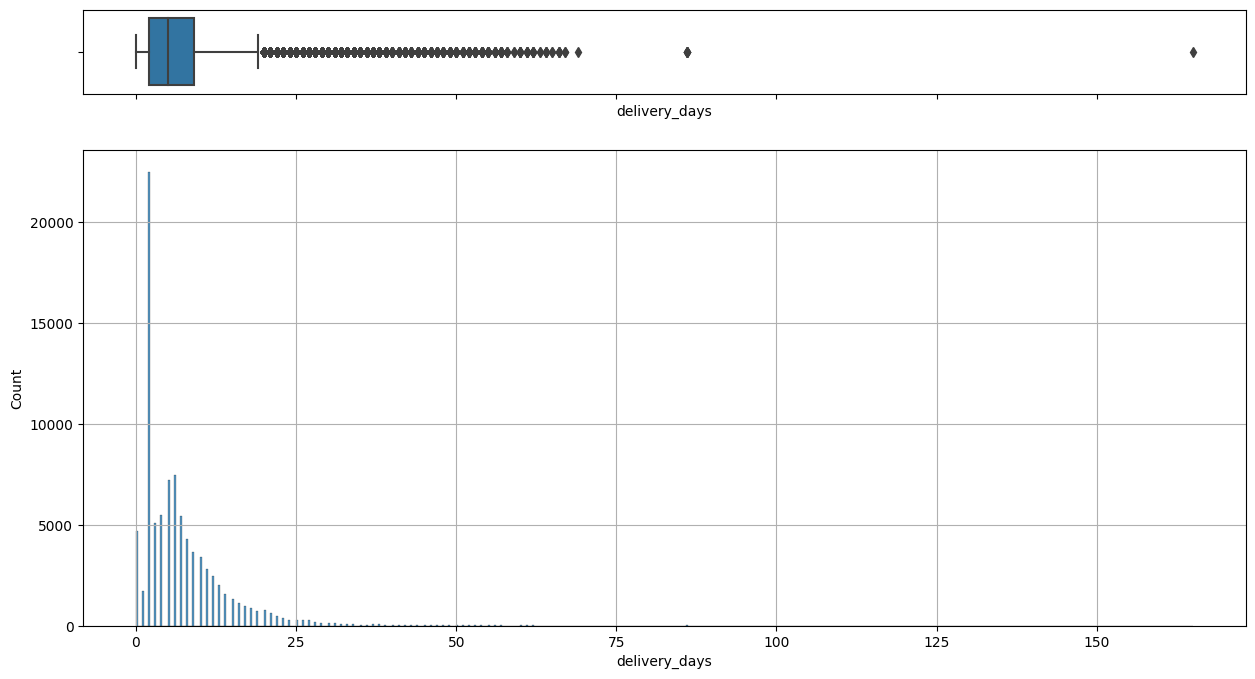

In [ ]:
distplot(orders, 'delivery_days', describe_kw={'percentiles': perc})

In [ ]:
orders.delivery_days.isnull().agg(['sum', 'mean'])

sum     78830.000000
mean        0.467912
Name: delivery_days, dtype: float64

###### Sem `imputter`

In [ ]:
%%time
client_ids = clients_tr.index
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'delivery_days']]
features = (
    stats.groupby('client_id').delivery_days.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
               mean       std  min   25%  50%  75%   max  is_churn
client_id                                                         
cx00002         NaN       NaN  NaN   NaN  NaN  NaN   NaN     False
cx00004    6.714286  5.908025  0.0  3.00  5.0  9.5  17.0     False
cx00005    7.000000       NaN  7.0  7.00  7.0  7.0   7.0      True
cx00008         NaN       NaN  NaN   NaN  NaN  NaN   NaN     False
cx00009         NaN       NaN  NaN   NaN  NaN  NaN   NaN     False
cx00010    2.250000  1.258306  1.0  1.75  2.0  2.5   4.0     False
cx00011         NaN       NaN  NaN   NaN  NaN  NaN   NaN      True
cx00015    7.000000  0.000000  7.0  7.00  7.0  7.0   7.0      True
cx00016    3.000000       NaN  3.0  3.00  3.0  3.0   3.0      True
cx00018         NaN       NaN  NaN   NaN  NaN  NaN   NaN     False
CPU times: total: 15.3 s
Wall time: 15.3 s


In [ ]:
# Verificando Nulos - todas as features
features.isna().sum()

mean         6802
std         12579
min          6802
25%          6802
50%          6802
75%          6802
max          6802
is_churn        0
dtype: int64

count      mean       std  min  25%       50%        75%  \
     is_churn                                                               
mean False     19085.0  4.560420  5.732403 -1.0 -1.0  3.500000   7.000000   
     True       4207.0  3.901704  5.780448 -1.0 -1.0  2.235294   6.500000   
std  False     19085.0  1.048101  3.446681 -1.0 -1.0 -1.000000   2.121320   
     True       4207.0  0.668810  3.648590 -1.0 -1.0 -1.000000   1.082245   
min  False     19085.0  3.159759  4.932429 -1.0 -1.0  2.000000   5.000000   
     True       4207.0  2.822439  4.850753 -1.0 -1.0  2.000000   5.000000   
25%  False     19085.0  3.762261  5.204091 -1.0 -1.0  2.000000   6.000000   
     True       4207.0  3.273295  5.185190 -1.0 -1.0  2.000000   6.000000   
50%  False     19085.0  4.381713  5.793878 -1.0 -1.0  3.000000   7.000000   
     True       4207.0  3.782981  5.846189 -1.0 -1.0  2.000000   6.000000   
75%  False     19085.0  5.192900  6.601003 -1.0 -1.0  4.000000   8.000000   
     True       4207.0  4.426670  6.741669 -1.0 -1.0  2.000000   7.000000   
max  False     19085.0  6.462143  8.398774 -1.0 -1.0  5.000000  10.000000   
     True       4207.0  5.241502  8.036540 -1.0 -1.0  3.000000   8.000000   

                      max  
     is_churn              
mean False      66.500000  
     True       83.500000  
std  False      40.877867  
     True      115.258405  
min  False      66.000000  
     True       55.000000  
25%  False      66.000000  
     True       55.000000  
50%  False      86.000000  
     True       83.500000  
75%  False      86.000000  
     True      124.250000  
max  False      86.000000  
     True      165.000000

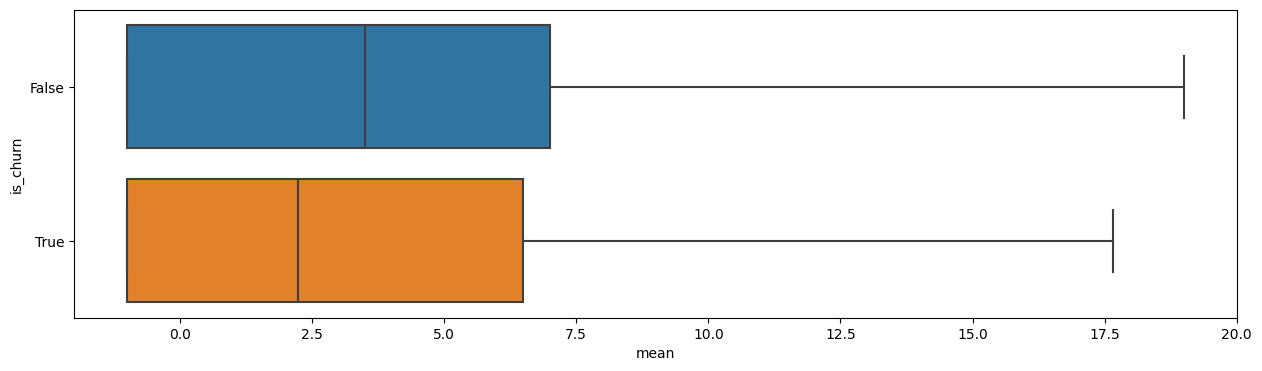

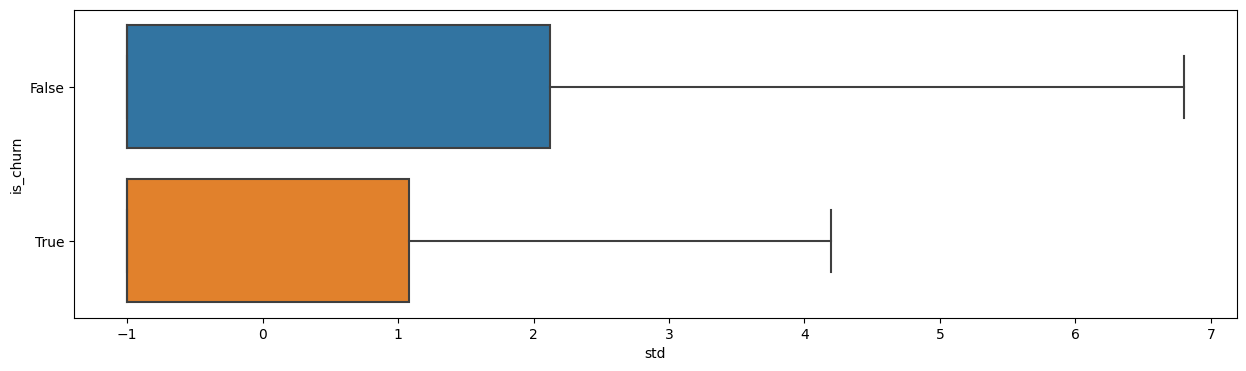

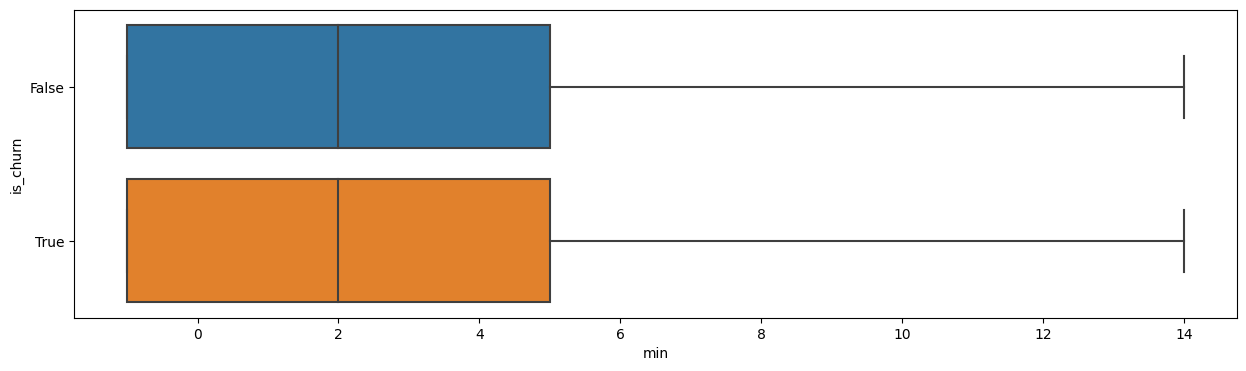

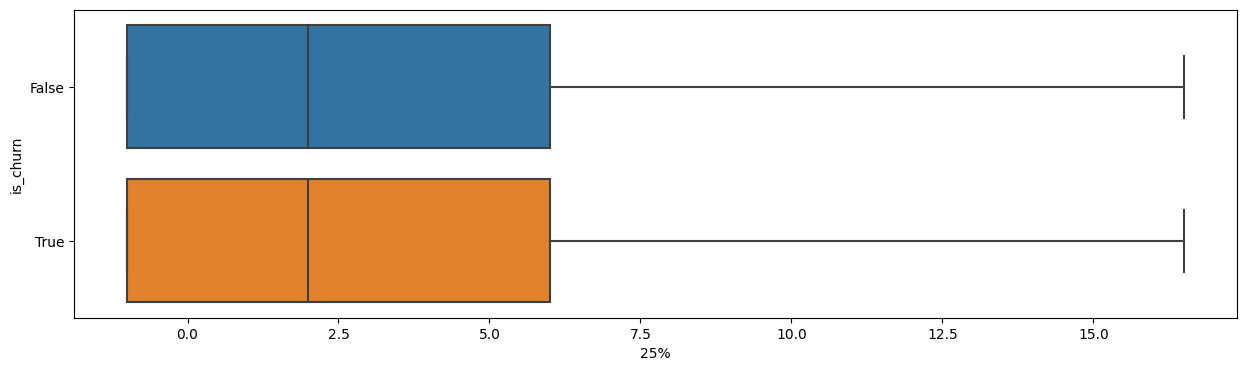

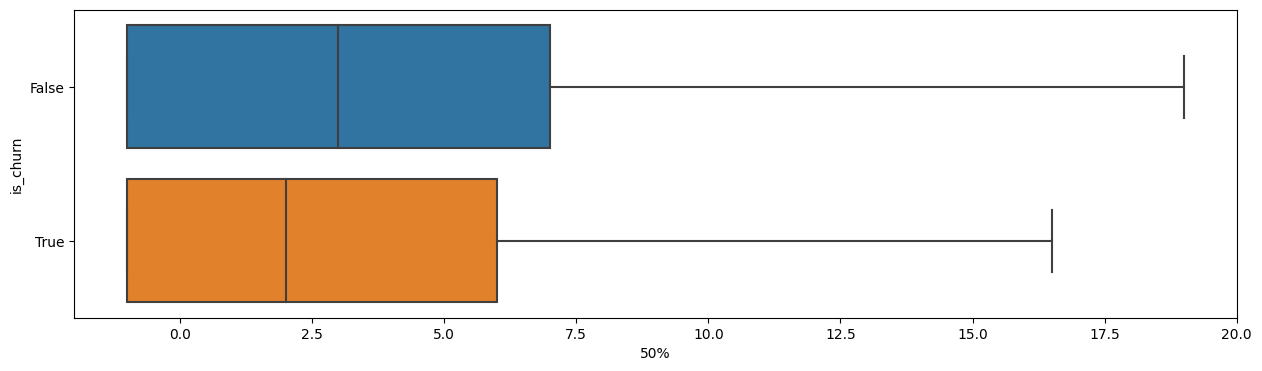

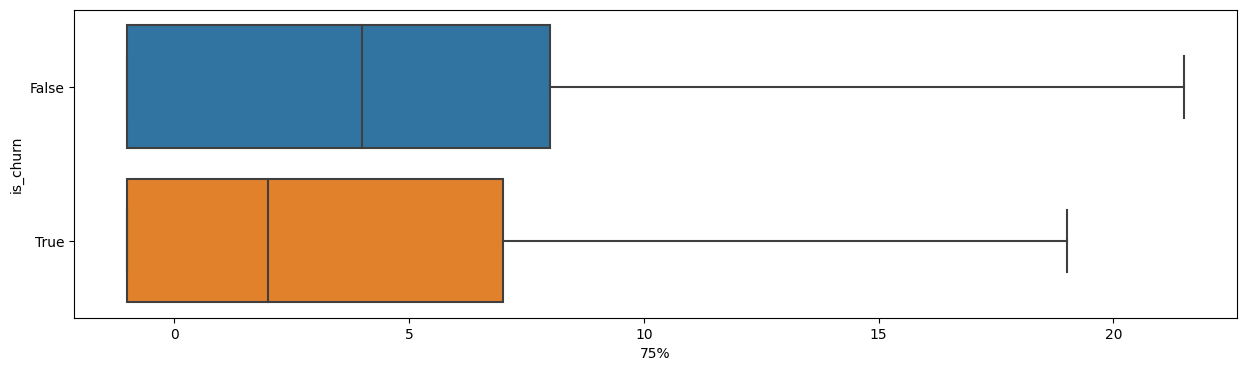

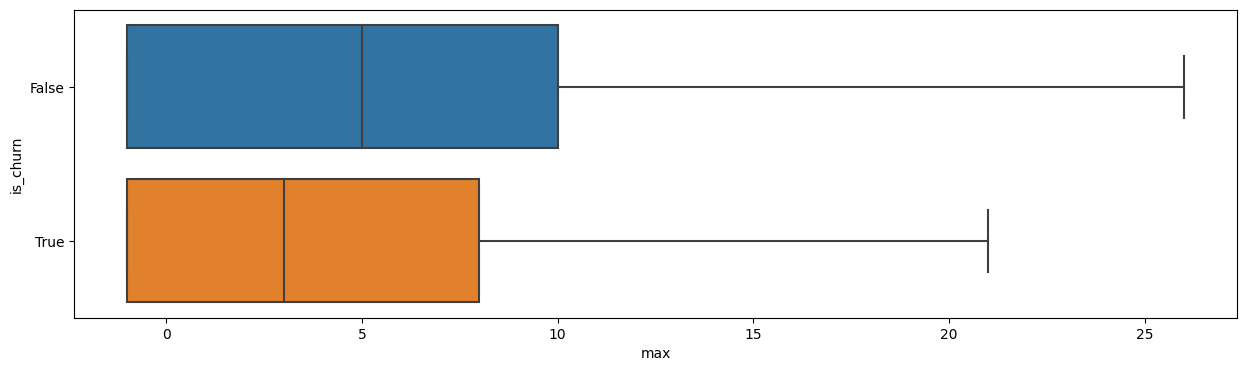

In [ ]:
data = features.fillna(-1)
for col in data.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=data, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

No caso dessa variável, **até mesmo o _std_** está impulsionado com as estatísticas descritivas sem `imputter`.

###### Considerando Categórica

Dada a hipótese levantada anteriormente, faz sentido testar a variável como uma categórica (não nulo é True, nulo é False)

In [ ]:
# Matriz de Ocorrência
cm = pd.DataFrame(
    index=['null_false', 'null_true'],
    columns=['churn_false', 'churn_true'],
    data=confusion_matrix(features['mean'].notnull(), features.is_churn)
)
cm / cm.sum()

,churn_false,churn_true
null_false,0.275609,0.366532
null_true,0.724391,0.633468


Há um potencial preditivo presente nessa variável, mas com sinal inverso da anterior, que começa a diferenciar as classes caso seja nula.

###### Com `imputter` completando com **a mediana** das entregas

Como prazo de entrega é algo menos estabelecido que o número de parcelas, é recomendado calcular o valor com os dados para usar como `imputer`. A decisão nessa análise de usar **a mediana** como imputter é conservadora. Porém, é interessante observar que existem soluções **mais alinhadas com a realidade do problema**, podendo criar por exemplo modelos prediditvos de prazo usando os estados de entrega.

In [ ]:
%%time
client_ids = clients_tr.index
# 5 dias é a mediana calculada no início da seção
stats = orders.loc[orders.client_id.isin(client_ids), ['client_id', 'delivery_days']].fillna(5) 
features = (
    stats.groupby('client_id').delivery_days.describe().drop(columns=['count'])
    .join(clients_tr[['is_churn']])
)
print(features.shape)
print(features.head(10).to_string())

(23292, 8)
               mean       std  min   25%  50%  75%   max  is_churn
client_id                                                         
cx00002    5.000000       NaN  5.0  5.00  5.0  5.0   5.0     False
cx00004    6.714286  5.908025  0.0  3.00  5.0  9.5  17.0     False
cx00005    5.500000  1.000000  5.0  5.00  5.0  5.5   7.0      True
cx00008    5.000000  0.000000  5.0  5.00  5.0  5.0   5.0     False
cx00009    5.000000  0.000000  5.0  5.00  5.0  5.0   5.0     False
cx00010    2.250000  1.258306  1.0  1.75  2.0  2.5   4.0     False
cx00011    5.000000  0.000000  5.0  5.00  5.0  5.0   5.0      True
cx00015    7.000000  0.000000  7.0  7.00  7.0  7.0   7.0      True
cx00016    4.333333  1.154701  3.0  4.00  5.0  5.0   5.0      True
cx00018    5.000000       NaN  5.0  5.00  5.0  5.0   5.0     False
CPU times: total: 15.8 s
Wall time: 15.8 s


In [ ]:
# Verificando Nulos - só ocorrem no `std`
features.isna().sum()

mean           0
std         4873
min            0
25%            0
50%            0
75%            0
max            0
is_churn       0
dtype: int64

count      mean       std  min  25%       50%        75%  \
     is_churn                                                               
mean False     19085.0  4.560420  5.732403 -1.0 -1.0  3.500000   7.000000   
     True       4207.0  3.901704  5.780448 -1.0 -1.0  2.235294   6.500000   
std  False     19085.0  1.048101  3.446681 -1.0 -1.0 -1.000000   2.121320   
     True       4207.0  0.668810  3.648590 -1.0 -1.0 -1.000000   1.082245   
min  False     19085.0  3.159759  4.932429 -1.0 -1.0  2.000000   5.000000   
     True       4207.0  2.822439  4.850753 -1.0 -1.0  2.000000   5.000000   
25%  False     19085.0  3.762261  5.204091 -1.0 -1.0  2.000000   6.000000   
     True       4207.0  3.273295  5.185190 -1.0 -1.0  2.000000   6.000000   
50%  False     19085.0  4.381713  5.793878 -1.0 -1.0  3.000000   7.000000   
     True       4207.0  3.782981  5.846189 -1.0 -1.0  2.000000   6.000000   
75%  False     19085.0  5.192900  6.601003 -1.0 -1.0  4.000000   8.000000   
     True       4207.0  4.426670  6.741669 -1.0 -1.0  2.000000   7.000000   
max  False     19085.0  6.462143  8.398774 -1.0 -1.0  5.000000  10.000000   
     True       4207.0  5.241502  8.036540 -1.0 -1.0  3.000000   8.000000   

                      max  
     is_churn              
mean False      66.500000  
     True       83.500000  
std  False      40.877867  
     True      115.258405  
min  False      66.000000  
     True       55.000000  
25%  False      66.000000  
     True       55.000000  
50%  False      86.000000  
     True       83.500000  
75%  False      86.000000  
     True      124.250000  
max  False      86.000000  
     True      165.000000

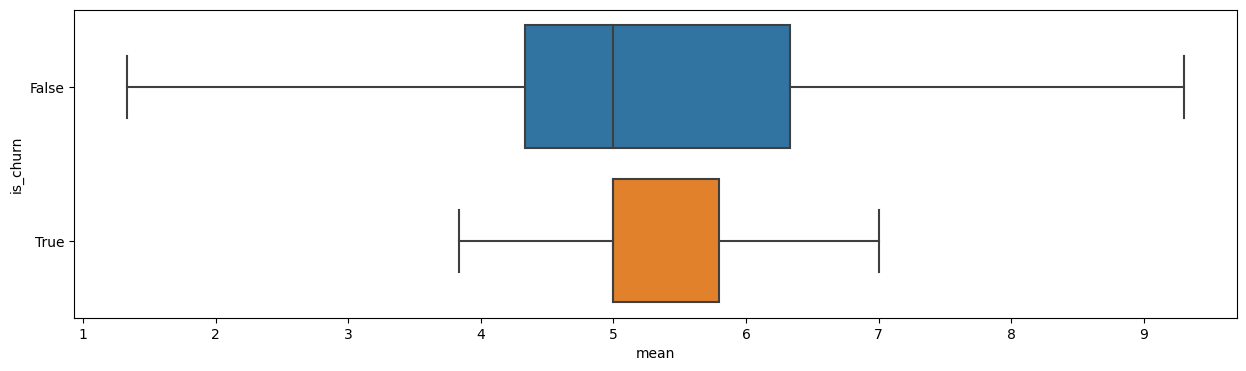

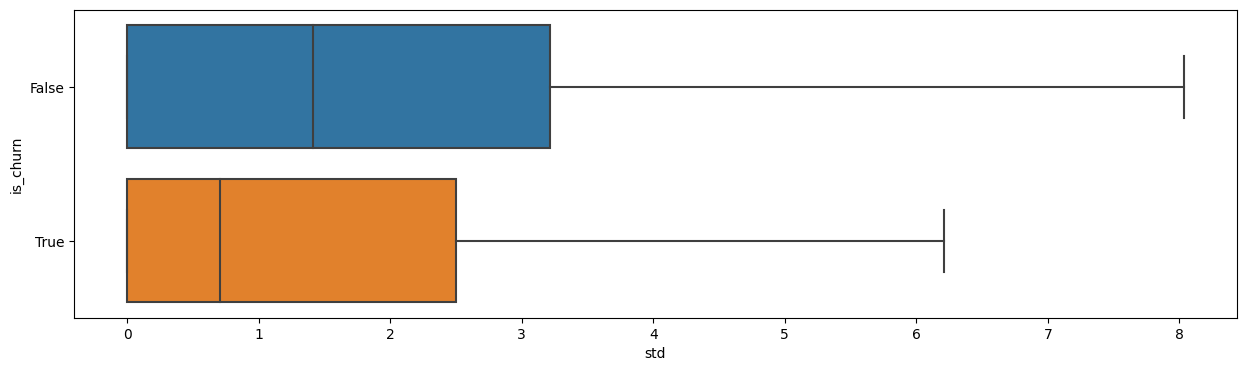

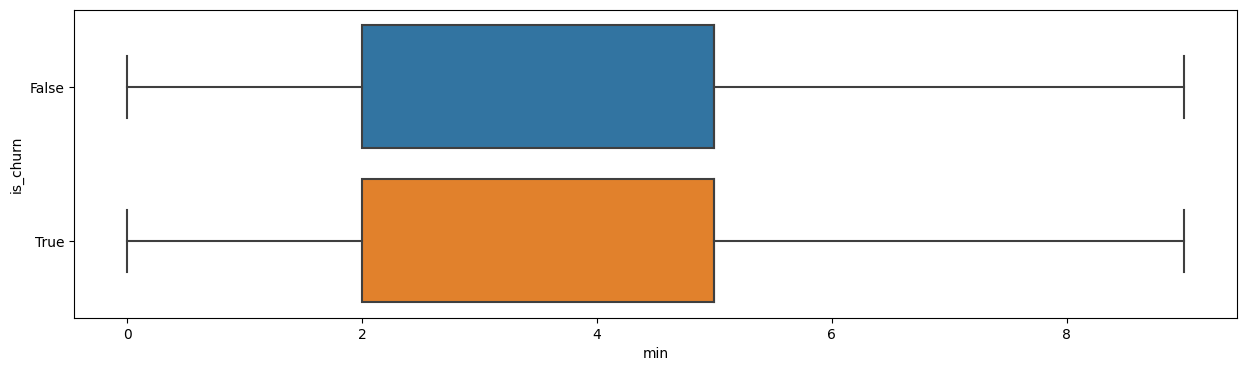

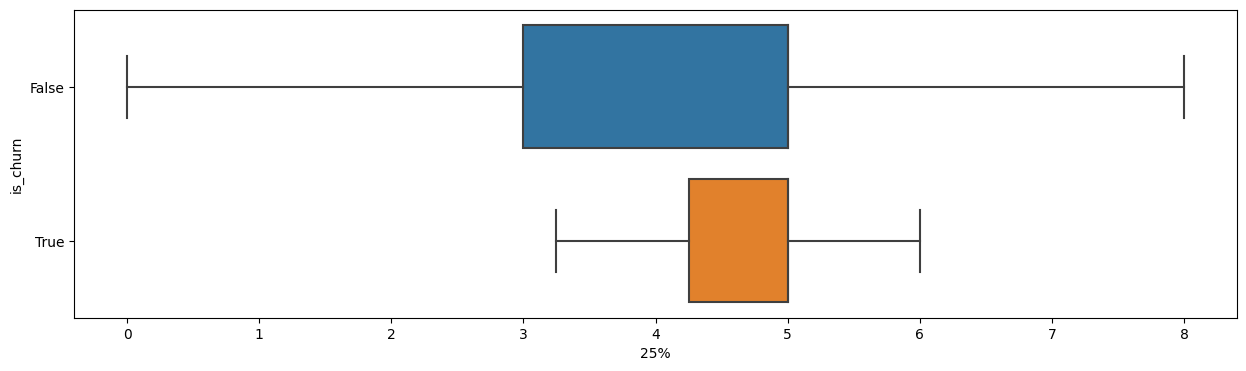

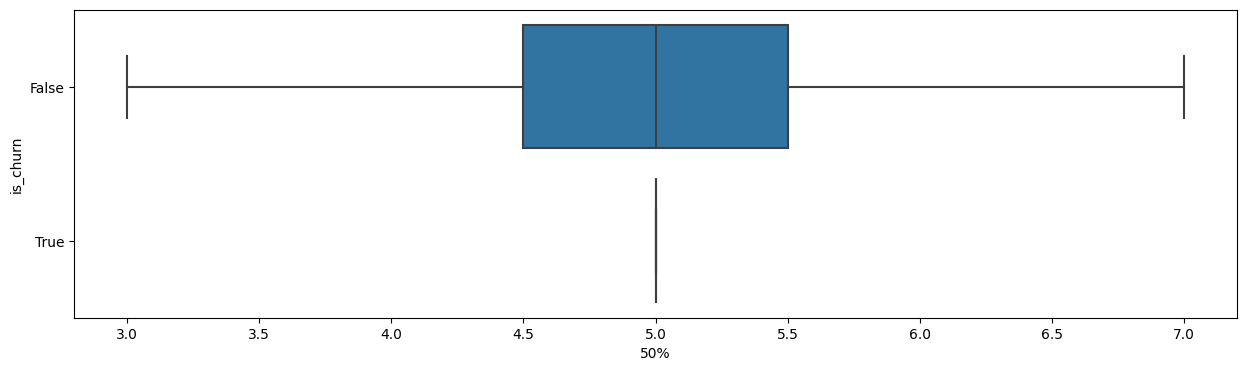

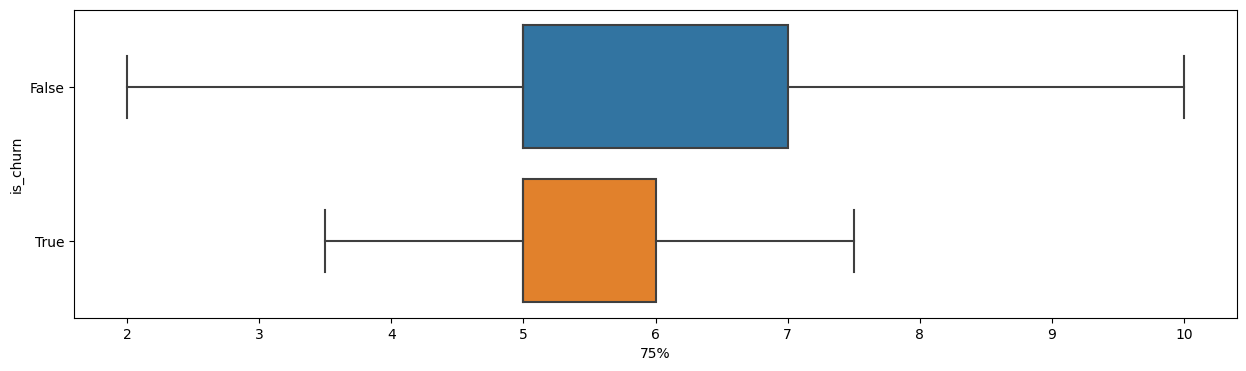

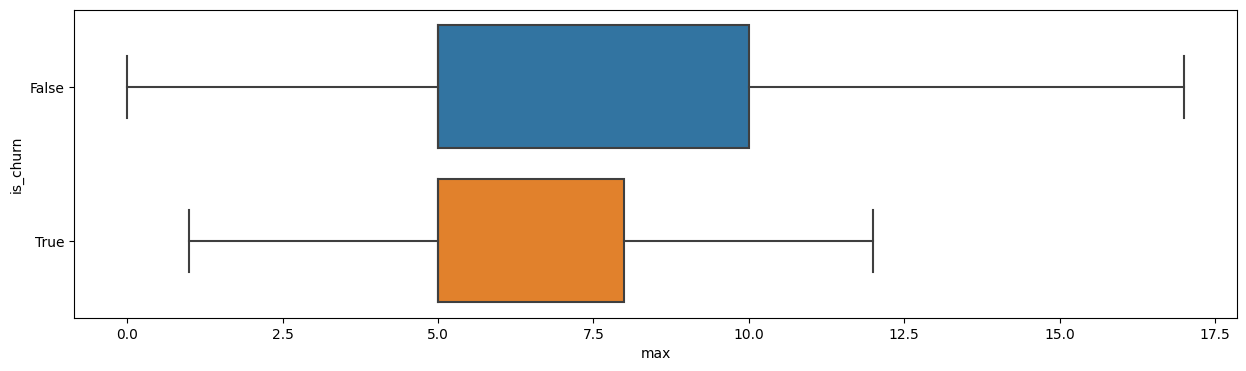

In [ ]:
for col in features.columns[:-1]:
    plt.figure(figsize=(15, 4))
    sns.boxplot(data=features, x=col, y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

Nesse caso, parece que o potencial preditivo **é maior** do que sem o `imputter`.

###### Conclusão
Usar a estatística descritiva **completando os nulos com a mediana** parece ter um potencial preditivo maior do que sem usar o `imputer`. Tratar a variável como categórica, da mesma forma, também parece funcionar.

#### Variáveis Categóricas

Existem ainda mais variáveis categóricas do que numéricas para explorar nesse desafio. Como já foi feita uma exploração extensa das variáveis numéricas, **a análise das variáveis categóricas se limitará à proposta da _feature engineering_ sugerida**: contagem de diferentes tipos de categorias dentro dos grupos de compras de cada cliente.

Para extrair o máximo de potencial desse desafio, porém, é recomendado que se explore as variáveis categóricas com maior profundidade, mirando na utilização como _dummies_ ou mesmo extraindo comportamentos de outras _features_ que co-ocorrem com as categóricas.

A análise das contagens de diferentes categorias por usuários será feita após a _feature engineering_ na seção **Análise Exploratória nas Novas Features**.

In [ ]:
# descrição rápida padrão - colunas categóricas
cols = ['product_id', 'payment_method', 'delivery_state', 'device', 'source']
orders[cols].reset_index().describe()

,index
count,168472.000000
mean,84235.500000
std,48633.821613
min,0.000000
25%,42117.750000
50%,84235.500000
75%,126353.250000
max,168471.000000


#### Variáveis Temporais

Outra variável muito interessante para explorar é a data e hora das compras. Ainda no sentido de não estender muito mais a seção de EDA sobre variáveis que não serão consideradas na _feature engineering_ proposta, **não será feita uma análise exploratória** das variáveis temporais nessa rodada de modelagem. 

Em um ciclo de modelagem posterior, seguem algumas sugestões de análise para aumentar o potencial preditivo da _feature engineering_:

- Análise de dias especiais (feriados ou o aniversário do cliente, por exemplo) e uso dessa informação para entender o comportamento de compra do cliente (só compra em dias específicos do mês, só compra na BF, por exemplo).

- Análise da frequência de compras do cliente, como por exemplo **quantos dias** ele leva entre cada compra e a tendência desse espaço entre compras.

- Análise de ciclos de compra mensais, comparando por exemplo produtos que sempre são comprados com mais frequência com o comportamento de compras do cliente. Nese caso, pode-se categorizar os produtos  por frequência de compras da base e comparar com o comportamento de cada cliente.

In [ ]:
# descrição rápida padrão - colunas de data e hora
cols = ['datetime']
orders[cols].describe()

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\3843859727.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders[cols].describe()


,datetime
count,168472
unique,102263
top,2019-11-29 10:29:00
freq,41
first,2019-01-01 01:22:00
last,2019-12-31 23:46:00


### Dataset Clientes

As variáveis intrínsecas dos clientes como o **gênero e a idade** serão usados na _feature engineering_, fazendo sentido explorar um pouco mais antes de partir para a modelagem.


Na EDA é recomendável que **somente o dado de treino** seja explorado, visto que isso diminui a tomada de decisão sobre modelagem considerando dados "de fora", ou seja, que o modelo não enxerga ao treinar. É perfeitamente saudável, porém, comparar as distribuições e descobertas da base de treino com a de teste em uma etapa de evolução da modelagem.

In [ ]:
clients_tr

,birthdate,state,gender,is_churn
client_id,,,,
cx05072,1972-03-22,st25,cg2,False
cx03836,1966-08-14,st15,cg1,False
cx08472,1954-08-07,st15,cg1,False
cx12946,1955-11-16,st15,cg1,False
cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...
cx05312,1981-08-29,st18,cg1,False
cx02434,1997-03-15,st04,cg2,False
cx16024,1950-10-09,st11,cg1,False


#### Variável `birthdate`

Essa variável será transformada na **idade do cliente** (`age`), mas há outras possibilidades de análise como a verificação de se o cliente compra mais no próprio aniversário (conceito levantado brevemente na seção sobre variáveis temporais de compras) ou se clientes nascidos em dados meses tendem a ter padrões de compra definidos por isso.

A idade do cliente vai pelo caminho de entender como as diferentes faixas etárias costumam consumir.

In [ ]:
data = clients_tr[['is_churn']].join(2019 - clients_tr.birthdate.dt.year.to_frame().rename(columns=lambda x: 'age'))
data

,is_churn,age
client_id,,
cx05072,False,47
cx03836,False,53
cx08472,False,65
cx12946,False,64
cx19045,False,61
...,...,...
cx05312,False,38
cx02434,False,22
cx16024,False,69


,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
age,23292.0,42.234415,13.702858,9.0,26.0,30.0,33.0,37.0,40.0,44.0,49.0,54.0,62.0,119.0


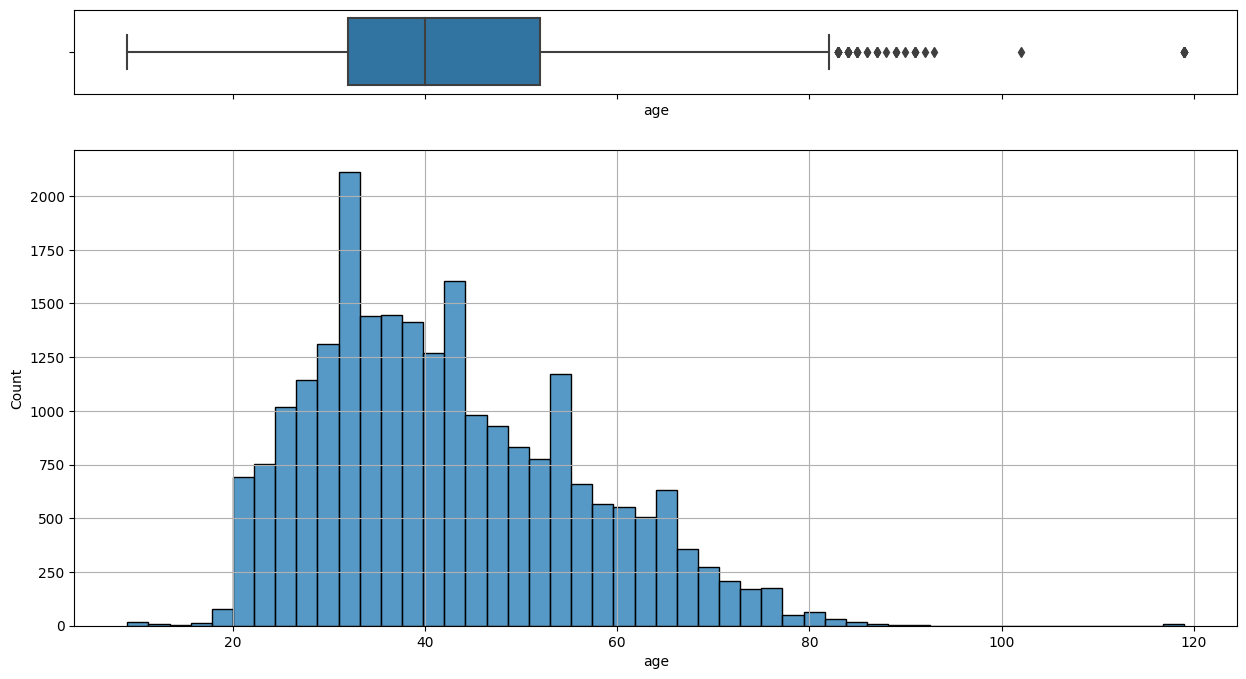

In [ ]:
# Calculando a idade do cliente
distplot(data, 'age', describe_kw={'percentiles': perc}, histplot_kw={'bins': 50})

Existem algumas anomalias de idades, como pessoas com mais de 100 anos e abaixo de 18 anos. Não há uma necessidade de cortar essas idades no momento, mas seria interessante entender o que gerou esse tipo de cadastro: um erro de digitação, um teste que vazou para produção ou mesmo não ser um erro. Essas verificações devem ser feitas com pessoas com conhecimento de domínio maior, não cabendo no escopo de um desafio responder aos questionamentos ainda.

Um caminho interessante a explorar (que nessa iteração não será feito) é um estudo dos produtos e categorias que essas faixas etárias consomem e quando são consumidos.

Entendendo a proporção de _churn_ pelas idades para estimar o potencial preditivo da idade para o _churn_.

count       mean        std  min   25%   50%   75%    max
    is_churn                                                             
age False     19085.0  41.578622  13.361827  9.0  31.0  39.0  50.0  119.0
    True       4207.0  45.209413  14.794861  9.0  34.0  43.0  56.0  119.0

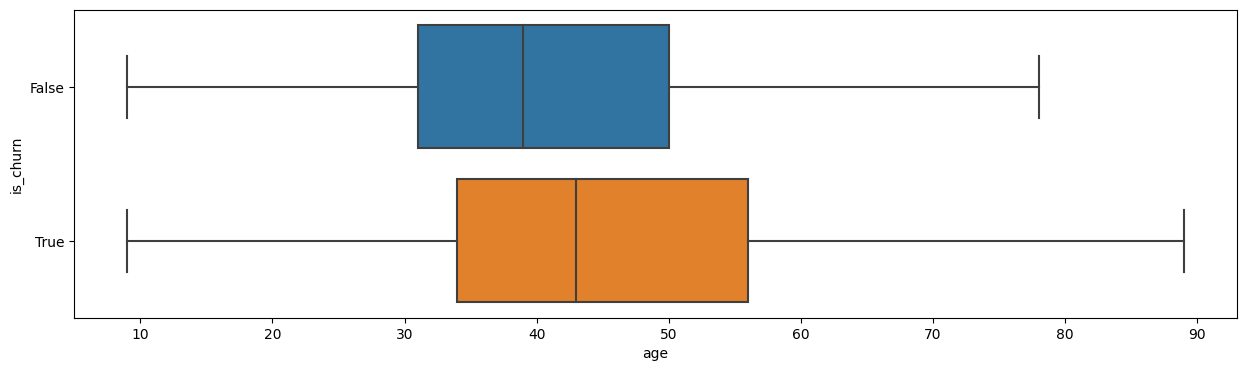

In [ ]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=data, x='age', y='is_churn', orient='h', showfliers=False)
data.pivot(columns='is_churn').describe().T

É interessante notar que **há um potencial preditivo** na idade do cliente. Pelas distribuições, há uma leve tendência de pessoas mais velhas se tornarem _churn_.

#### Variável `gender`

O gênero do cliente não possui muito espaço para explorar, dado que é um dado binário. O que pode ser feito é uma contagem de clienbtes de cada gênero e suas propensões ao _churn_.

In [ ]:
# Matriz de Ocorrência
cm = pd.DataFrame(
    index=['gender_cg1', 'gender_cg2'],
    columns=['churn_false', 'churn_true'],
    data=confusion_matrix(clients_tr.gender == 'cg2', clients_tr.is_churn)
)
cm / cm.sum()

,churn_false,churn_true
gender_cg1,0.557087,0.53411
gender_cg2,0.442913,0.46589


Observa-se que o gênero em si não é predidtivo, sendo bem distribuído quase uniformemente pelas classes de _churn_.

## Limpeza & Pré-Processamento

Depois de explorar os dados brutos, é importante entender se já existem dados _outliers_ ou errados que corrompem ou invalidam certos registros (linhas da tabela) e que deveriam 1) serem tratados de alguma forma ou 2) eliminados do dataset. Se essa necessidade não surgiu com a EDA, das duas uma: ou não há realmente nada a fazer, ou é necessário explorar mais os dados pra entendê-los.

O maior esforço nessa iteração de modelagem foi sobre os dados numéricos, onde foram tomadas algumas decisões de limpeza e pré-processamento:
1. **Não serão eliminados nenhum registro ou coluna original** dos datasets. Essa decisão foi tomada porque em todas as análises as colunas foram verificadas como tendo algum potencial preditivo em pelo menos uma transformação.
1. O dado `installments` de **número de parcelas de compras** será mantido com uma política de `imputting`, apesar de demonstrar maior potencial preditivo dessa maneira. Isso será feito para manter a comparabilidade com os trabalhos que usaram a _feature engineering_ da forma inicialmente dada. Os dados nulos serão então preenchidos com o valor padrão de `1` parcela.
1. O dado `delivery_days` de **prazo em dias para entrega** será mantido com uma política de `imputting` de substituir nulos pela **mediana**, calculada em **cinco dias**.
1. Nas transformações da _feature engineering_ que usam a estatística descritiva sobre os dados, **todo dado nulo será convertido para numérico igual a `-1`**, decisão que mantém o entendimento do modelo de que é um dado nulo e fora do `range` tradicional. Todas as explorações, onde foi feita comparação com o _target_, esse `imputter` foi usado.

## *Feature Engineering*

Essa é a etapa que pode dar mais trabalho, devido ao formato de eventos da **tabela de vendas**. Para facilitar um pouco, será dada a seguir uma sugestão de _feature engineering_. Caso haja uma vontade de incluir mais _features_, basta editar o código a seguir.


### Funções Auxiliares

Funções para ajudar nas diferentes ĩdéias de _feature engineering_.

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
class OrderAggregatorFeaturesTransform(BaseEstimator, TransformerMixin):
    """ Classe base para FeaturesTransformers que usam os dados de Histórico de Vendas para extrair os dados.
    """
    
    def __init__(self, orders_table, columns=None, product_table=None, imputer=None):
        
        self.work_table = None
        if product_table is not None:
            self.refr_table = pd.merge(
                orders_table,
                product_table.reset_index(),
                on='product_id'
            )
        else:
            self.refr_table = orders_table.copy()
        if columns is not None:
            self.refr_table = self.refr_table[['client_id', *columns]]
        self._reset_database()
        self.imputer = imputer
        self.columns = columns

    def _reset_database(self):
        self.work_table = self.refr_table.copy()
        return self

    def _process_client(self, df):
        return df.set_index('client_id')

    def _select_orders(self, df):
        idx = self.work_table['client_id'].isin(df.index)
        return self.work_table[idx]

    def fit(self, X, y=None, **fit_params):
        if self.imputer is not None:
            self._reset_database()
            self.imputer.fit(self._select_orders(X)[self.columns])
            self.work_table.loc[:, self.columns] = self.imputer.transform(self.work_table[self.columns])
        return self
    
    def transform(self, X):
        return self._select_orders(X).groupby('client_id').apply(self._process_client)

In [ ]:
class UniqueCounterTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.apply(lambda x: len(x.unique())).rename(index=lambda x: f'count_{x}')

In [ ]:
class SumValuesTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = super()._process_client(df)
        return tmp.sum().rename(index=lambda x: f'sum_{x}')

In [ ]:
class DistributionTransform(OrderAggregatorFeaturesTransform):

    def _process_client(self, df):
        tmp = (super()
               ._process_client(df)
               .describe()
               .drop(index='count')
               .rename(index=lambda c: c.replace('%', 'p')) 
               .rename(index={'mean': 'avg'})
               .unstack())
        tmp.index = tmp.index.map('_'.join)
        return tmp

In [ ]:
class CountStateMatchesTransform(OrderAggregatorFeaturesTransform):
    
    def _process_client(self, df):
        tmp = df.set_index('client_id')[['state', 'delivery_state']]
        return pd.Series({
            'count_orders_states_eq': (tmp.state == tmp.delivery_state).sum(),
            'count_orders_states_ne': (tmp.state != tmp.delivery_state).sum()
        })

    def transform(self, X):
        return (
            pd.merge(
                self._select_orders(X),
                X[['state']].reset_index(),
                on='client_id'
            ).groupby('client_id').apply(self._process_client)
        )

### Sugestão de Feature Engineering		

Algumas features interessantes para serem extraidas dos dados, por cliente, estão mostradas a seguir.

- `gender_g1`: __bool_ calculada a partir do `gender`
- `client_age`: calculada a partir do `birthdate`

- `sum_units`: total de itens comprados em 2019
- `sum_volume`: total gasto em compras em 2019

- `count_orders_states_ne`: quantidade de compras entregando em estados diferentes ao do cliente
- `count_orders_states_eq`: quantidade de compras entregando em estados iguais ao do cliente

- `count_product_id`: quantidade de produtos diferentes presentes nas compras
- `count_device`: quantidade de produtos diferentes presentes nas compras
- `count_source`: quantidade de produtos diferentes presentes nas compras
- `count_payment_method`: quantidade de meios de pagamento em compras

- `count_category_lv0`: quantidade de categorias diferentes (nível 0) em compras
- `count_category_lv1`: quantidade de categorias diferentes (nível 1) em compras
- `count_category_lv2`: quantidade de categorias diferentes (nível 2) em compras
- `count_category_lv3`: quantidade de categorias diferentes (nível 3) em compras
- `count_category_lv4`: quantidade de categorias diferentes (nível 4) em compras

- `price_avg`: média dos preços pagos em cada item comprado
- `price_std`: desvio padrão dos preços pagos em cada item comprado
- `price_min`: mínimo dos preços pagos em cada item comprado
- `price_25p`: quartil 25% dos preços pagos em cada item comprado
- `price_50p`: quartil 50% dos preços pagos em cada item comprado
- `price_75p`: quartil 75% dos preços pagos em cada item comprado
- `price_max`: máximo dos preços pagos em cada item comprado

- `delivery_days_avg`: média da quantidade de dias para entregar (prazo)
- `delivery_days_std`: desvio padrão da quantidade de dias para entregar (prazo)
- `delivery_days_min`: mínimo da quantidade de dias para entregar (prazo)
- `delivery_days_25p`: quartil 25% da quantidade de dias para entregar (prazo)
- `delivery_days_50p`: quartil 50% da quantidade de dias para entregar (prazo)
- `delivery_days_75p`: quartil 75% da quantidade de dias para entregar (prazo)
- `delivery_days_max`: máximo da quantidade de dias para entregar (prazo)

- `installments_avg`: média da quantidade de parcelas de pagamento
- `installments_std`: desvio padrão da quantidade de parcelas de pagamento
- `installments_min`: mínimo da quantidade de parcelas de pagamento
- `installments_25p`: quartil 25% da quantidade de parcelas de pagamento
- `installments_50p`: quartil 50% da quantidade de parcelas de pagamento
- `installments_75p`: quartil 75% da quantidade de parcelas de pagamento
- `installments_max`: máximo da quantidade de parcelas de pagamento

In [ ]:
class FeatureEngineeringTransform(BaseEstimator, TransformerMixin):

    def __init__(self, orders_table, product_table):
        self.orders_table = orders_table
        self.product_table = product_table
        orders_table['volume'] = orders_table.units * orders_table.price
        self._transf_sum = SumValuesTransform(orders_table=orders_table, columns=['units', 'volume'])
        self._transf_stt = CountStateMatchesTransform(orders_table=orders_table[['client_id', 'delivery_state']])
        self._transf_cnt = UniqueCounterTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['product_id', 'device', 'source', 'payment_method', 
                     'category_lv0', 'category_lv1', 'category_lv2', 'category_lv3', 'category_lv4']
        )
        self._transf_dst_med = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['price', 'delivery_days'],
            imputer=SimpleImputer(strategy='median')
        )
        self._transf_dst_one = DistributionTransform(
            orders_table=orders_table, 
            product_table=product, 
            columns=['installments'],
            imputer=SimpleImputer(strategy='constant', fill_value=1)
        )
        
    def fit(self, X, y=None, **fit_params): 
        self._transf_dst_med.fit(X)
        self._transf_dst_one.fit(X)
        return self
    
    def transform(self, X):
        output = (X[['gender']] == 'cg1').rename(columns={'gender': 'gender_cg1'})
        output['client_age'] = 2021 - X.birthdate.dt.year
        output = output.join(self._transf_sum.transform(X))
        output = output.join(self._transf_stt.transform(X))
        output = output.join(self._transf_cnt.transform(X))
        output = output.join(self._transf_dst_med.transform(X))
        output = output.join(self._transf_dst_one.transform(X))
        return output

In [ ]:
%%time
feateng = FeatureEngineeringTransform(orders, product).fit(clients_tr)

CPU times: total: 578 ms
Wall time: 588 ms


In [ ]:
feateng

FeatureEngineeringTransform(orders_table=        order_id client_id product_id            datetime  units   price  \
0       ox008433   cx05072    px04611 2019-10-07 15:20:00    1.0   49.90   
1       ox070389   cx05072    px12305 2019-10-11 17:42:00    1.0   69.90   
2       ox061137   cx06840    px07033 2019-01-19 13:09:00    1.0   35.90   
3       ox061137   cx06840    px05992 2019-01-19 13:09:00    3.0   35.90   
4       ox038612   cx06840    px10040 2019-04-18 14:36:00    1.0   39.00   
...          ...       ...        ...                 ...    ......
px07271            mk05     mk05:072  mk05:072:177  mk05:072:177:182   

                      category_lv4  
product_id                          
px01237     mk38:072:149:218:04846  
px11510     mk38:072:149:218:01337  
px03782     mk38:072:019:066:02321  
px04092     mk38:072:019:054:06035  
px07429     mk38:072:078:182:07218  
...                            ...  
px11965     mk35:072:122:182:00392  
px05192     mk35:072:122:182:02028  
px05391     mk38:107:357:182:08006  
px00861     mk35:072:177:182:03018  
px07271     mk05:072:177:182:04256  

[12659 rows x 5 columns])

### Aplicando a _Feature Engineering_

In [ ]:
%%time
fname = 'data/client.train.features.v1.csv'
if os.path.exists(fname):
    print(f'Loading file "{fname}" from disk.')
    train_dataset = pd.read_csv(fname, sep=',', encoding='utf-8', index_col=0)
else:
    print('Creating Dataset')
    train_dataset = feateng.transform(clients_tr)
    train_dataset.to_csv(fname, sep=',', encoding='utf-8')
print('Dataset Ready')
print(train_dataset.shape)
print(train_dataset.head().to_string())

Loading file "data/client.train.features.v1.csv" from disk.
Dataset Ready
(23292, 36)
           gender_cg1  client_age  sum_units  sum_volume  count_orders_states_eq  count_orders_states_ne  count_product_id  count_device  count_source  count_payment_method  count_category_lv0  count_category_lv1  count_category_lv2  count_category_lv3  count_category_lv4   price_avg    price_std  price_min  price_25p  price_50p  price_75p  price_max  delivery_days_avg  delivery_days_std  delivery_days_min  delivery_days_25p  delivery_days_50p  delivery_days_75p  delivery_days_max  installments_avg  installments_std  installments_min  installments_25p  installments_50p  installments_75p  installments_max
client_id                                                                                                                                                                                                                                                                                                     

In [ ]:
%%time
fname = 'data/client.test.features.v1.csv'
if os.path.exists(fname):
    print(f'Loading file "{fname}" from disk.')
    test_dataset = pd.read_csv(fname, sep=',', encoding='utf-8', index_col=0)
else:
    print('Creating Dataset')
    test_dataset = feateng.transform(clients_te)
    test_dataset.to_csv(fname, sep=',', encoding='utf-8')
print('Dataset Ready')
print(test_dataset.shape)
print(test_dataset.head().to_string())

Loading file "data/client.test.features.v1.csv" from disk.
Dataset Ready
(7764, 36)
           gender_cg1  client_age  sum_units  sum_volume  count_orders_states_eq  count_orders_states_ne  count_product_id  count_device  count_source  count_payment_method  count_category_lv0  count_category_lv1  count_category_lv2  count_category_lv3  count_category_lv4    price_avg    price_std  price_min  price_25p  price_50p  price_75p  price_max  delivery_days_avg  delivery_days_std  delivery_days_min  delivery_days_25p  delivery_days_50p  delivery_days_75p  delivery_days_max  installments_avg  installments_std  installments_min  installments_25p  installments_50p  installments_75p  installments_max
client_id                                                                                                                                                                                                                                                                                                      

## Análise Exploratória nas Novas _Features_


Regra de Ouro aqui: **cada vez que forem criadas _features_** nas etapas de _feature engineering_, deve ser feita uma **análise exploratória** para entender as distribuições dos dados. Novos dados trazem novos ângulos para  o problema e esses novos ângulos quase sempre trazem novas informações sobre o problema.

Importante: se fizer sentido, pode-se adicionar mais uma etapa de **limpeza e pré-processamento** dos dados.

In [ ]:
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_std,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,False,49,2.00000,119.800000,0,2,2,1,1,1,...,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx03836,True,55,8.00000,625.720000,0,7,6,1,1,1,...,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx08472,True,67,3.00000,2832.920000,0,3,2,1,1,1,...,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx12946,True,66,1.00000,69.900000,0,1,1,1,1,1,...,5.0,5.0,5.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
cx19045,False,63,16.00000,794.840000,1,14,14,2,2,1,...,5.0,5.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,40,4.00000,1038.020000,0,3,3,1,1,1,...,5.0,5.5,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
cx02434,False,24,1.00000,1952.900000,0,1,1,1,1,1,...,2.0,2.0,2.0,10.0,NaN,10.0,10.0,10.0,10.0,10.0
cx16024,True,71,4.00000,1158.000000,0,3,3,1,1,1,...,5.0,8.0,11.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
train_dataset.isnull().agg(['sum', 'mean']).T

,sum,mean
gender_cg1,0.0,0.000000
client_age,0.0,0.000000
sum_units,0.0,0.000000
sum_volume,0.0,0.000000
count_orders_states_eq,0.0,0.000000
count_orders_states_ne,0.0,0.000000
count_product_id,0.0,0.000000
count_device,0.0,0.000000
count_source,0.0,0.000000
count_payment_method,0.0,0.000000


Como esperado, os campos `std` gerados por estatistica descritiva estão vindo nulos. Isso se deve ao fato de que algumas compras terão apenas um valor, o que torna o cálculo do `std` inviável.

Como definido nas etapas anteriores, esses valores serão transformados em **`-1`**. Os dados também serão normalizados com um `StandardScaler` nas variáveis numéricas.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale_cols = train_dataset.columns[1:]
scale_cols

Index(['client_age', 'sum_units', 'sum_volume', 'count_orders_states_eq',
       'count_orders_states_ne', 'count_product_id', 'count_device',
       'count_source', 'count_payment_method', 'count_category_lv0',
       'count_category_lv1', 'count_category_lv2', 'count_category_lv3',
       'count_category_lv4', 'price_avg', 'price_std', 'price_min',
       'price_25p', 'price_50p', 'price_75p', 'price_max', 'delivery_days_avg',
       'delivery_days_std', 'delivery_days_min', 'delivery_days_25p',
       'delivery_days_50p', 'delivery_days_75p', 'delivery_days_max',
       'installments_avg', 'installments_std', 'installments_min',
       'installments_25p', 'installments_50p', 'installments_75p',
       'installments_max'],
      dtype='object')

In [ ]:
train_dataset = train_dataset.fillna(-1)
scaler = StandardScaler().fit(train_dataset[scale_cols])
scaler

StandardScaler()

In [ ]:
train_dataset.loc[:, scale_cols] = scaler.transform(train_dataset.loc[:, scale_cols])
train_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_std,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx05072,False,0.347788,-0.294982,-0.654008,-0.480636,-0.159651,-0.483604,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx03836,True,0.785662,0.236881,-0.487896,-0.480636,1.185909,0.591497,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx08472,True,1.661411,-0.206338,0.236808,-0.480636,0.109461,-0.483604,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx12946,True,1.588432,-0.383625,-0.670392,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.793519,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx19045,False,1.369494,0.946031,-0.432368,-0.204918,3.069692,2.741699,1.107626,1.068076,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx05312,True,-0.309024,-0.117694,-0.352523,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.219780,-0.316619,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx02434,False,-1.476688,-0.383625,-0.052135,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.94975,-0.957376,-0.884733,4.132598,-0.793519,6.002182,5.246927,4.173593,3.044805,1.854755
cx16024,True,1.953327,-0.117694,-0.313129,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,...,-0.16201,0.307074,0.393524,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922


In [ ]:
test_dataset = test_dataset.fillna(-1)
test_dataset.loc[:, scale_cols] = scaler.transform(test_dataset.loc[:, scale_cols])
test_dataset

,gender_cg1,client_age,sum_units,sum_volume,count_orders_states_eq,count_orders_states_ne,count_product_id,count_device,count_source,count_payment_method,...,delivery_days_50p,delivery_days_75p,delivery_days_max,installments_avg,installments_std,installments_min,installments_25p,installments_50p,installments_75p,installments_max
client_id,,,,,,,,,,,,,,,,,,,,,
cx06840,True,-0.382003,0.325525,-0.557937,-0.480636,1.185909,0.860272,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx01931,True,-0.163065,-0.117694,-0.617956,-0.480636,0.109461,-0.214829,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx35431,True,0.858641,-0.383625,-0.667404,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.793519,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx36233,False,1.661411,-0.294982,0.831122,-0.480636,-0.159651,-0.483604,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx13540,True,0.858641,-0.117694,-0.632994,-0.480636,0.378573,0.053947,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.268799,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cx19119,True,-0.236045,-0.383625,-0.431002,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.793519,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx21963,False,-0.527961,-0.383625,-0.680537,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.793519,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922
cx37195,False,1.223536,-0.383625,-0.657163,-0.480636,-0.428763,-0.752379,-0.541915,-0.538487,-0.543817,...,-0.16201,-0.325151,-0.458648,-0.385187,-0.793519,-0.177282,-0.237293,-0.289202,-0.372275,-0.450922


Para entender melhor o comportamento desses dados, será feita uma comparação de suas distribuições com o _target_.

In [ ]:
data = pd.melt(train_dataset, ignore_index=False).join(clients_tr[['is_churn']])
data

,variable,value,is_churn
client_id,,,
cx00002,gender_cg1,False,False
cx00002,client_age,-0.892856,False
cx00002,sum_units,-0.383625,False
cx00002,sum_volume,-0.202808,False
cx00002,count_orders_states_eq,-0.480636,False
...,...,...,...
cx38817,installments_min,-0.177282,False
cx38817,installments_25p,-0.237293,False
cx38817,installments_50p,-0.289202,False


In [ ]:
data = data.rename(columns={'variable': 'feature'})
data.loc[:, 'value'] = data.loc[:, 'value'].astype(float)
data

,feature,value,is_churn
client_id,,,
cx00002,gender_cg1,0.000000,False
cx00002,client_age,-0.892856,False
cx00002,sum_units,-0.383625,False
cx00002,sum_volume,-0.202808,False
cx00002,count_orders_states_eq,-0.480636,False
...,...,...,...
cx38817,installments_min,-0.177282,False
cx38817,installments_25p,-0.237293,False
cx38817,installments_50p,-0.289202,False


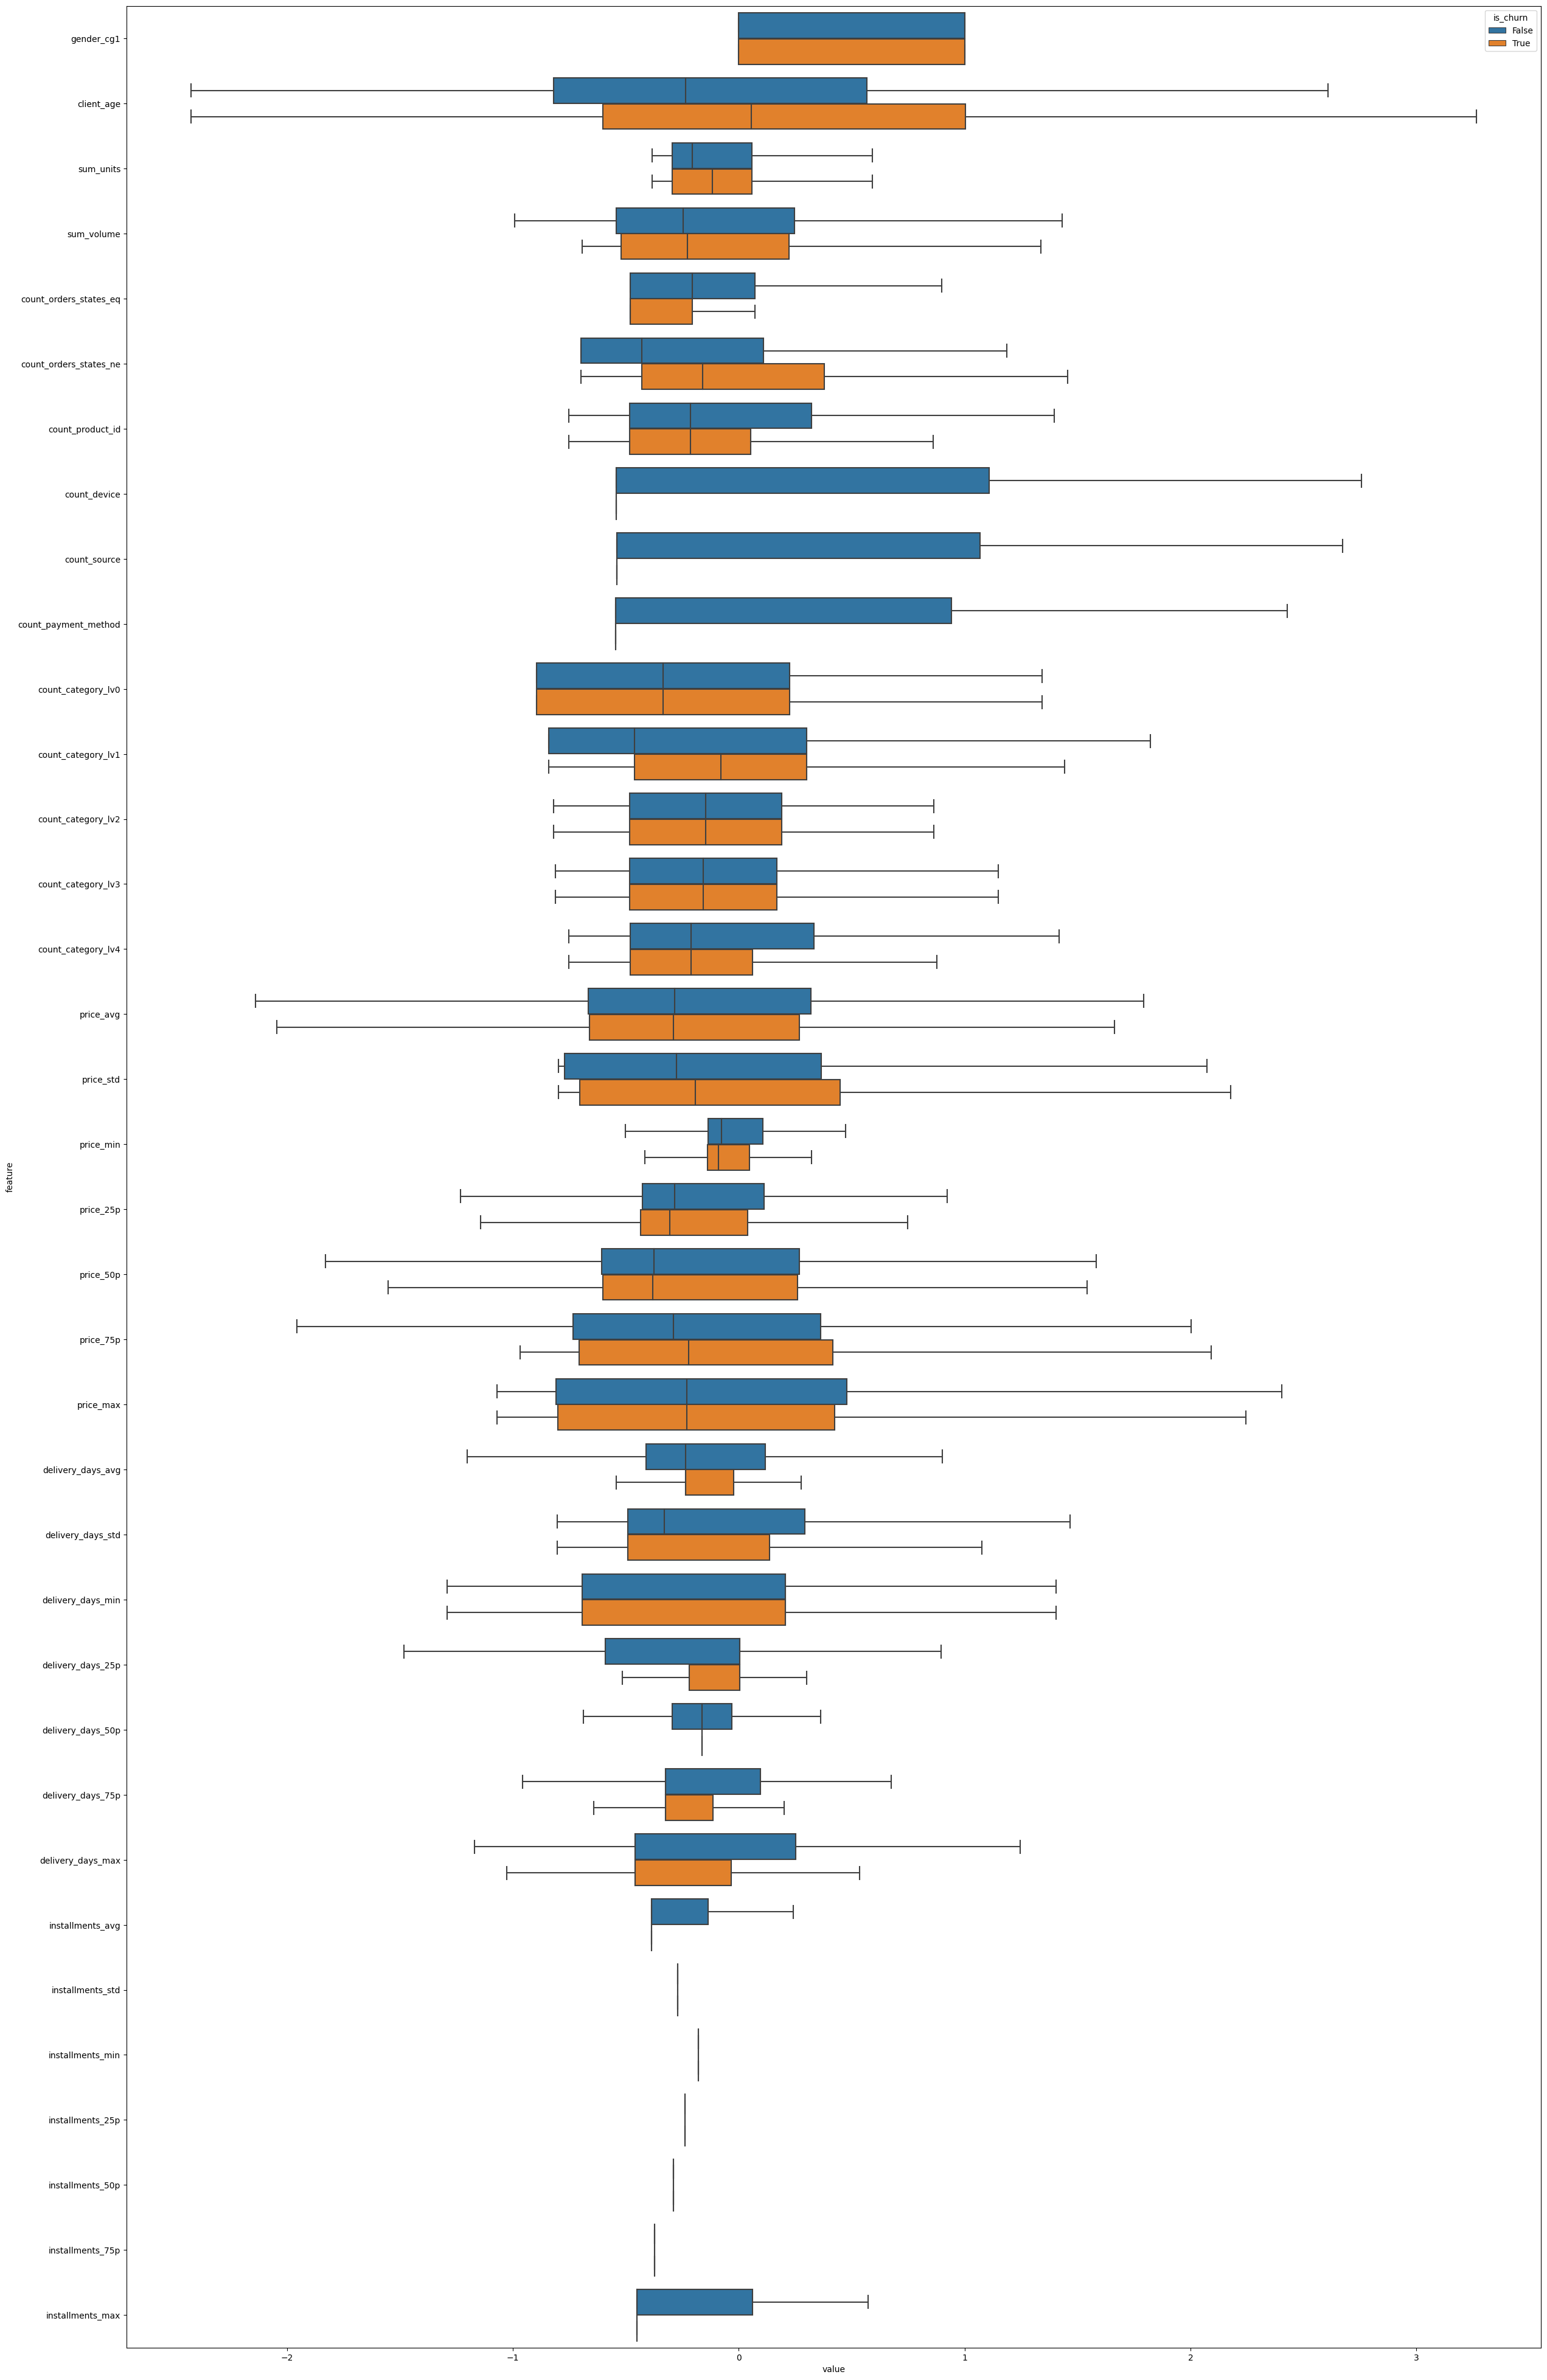

In [ ]:
plt.figure(figsize=(30, 50))
ax = sns.boxplot(data=data, y="feature", x="value", hue="is_churn", showfliers=False)

## Treinar um Modelo Baseline

Antes de começar a treinar modelos muito complexos, sempre é interessante verificar **se um modelo mais simples já resolve**. Além da vantagem de adquirir mais conhecimento sobre o problema, com modelos simples como [árvores de decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) ou uma boa [regressão logística](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) trazem bons insights sobre o que o modelo aprendeu sobre o problema durante  o treinamento. Com sorte, também é possível ter maior compreensao sobre o **impacto direto de cada _feature_** na decisão de saída do modelo, trazendo uma dimensão de explicabilidade para a solução.


O modelo baseline deve ser avaliado em termos de performance de classificação usando métricas como **F-Score**, **precision**, **recall** e _frameworks_ de avaliação como a **matriz de confusão** e a **curva ROC**. Essas medidas **devem ser colocadas em uma tabela** identificada na primeira linha como **_benchmark_** para que, cada vez que se treinar outro modelo, esse modelo possa ser comparado nessas mesmas métricas com os outros. Um exemplo de tabela de comparação de resultados de modelos está [nessa aula de Balanceamento de _Datasets_](https://docs.google.com/presentation/d/1Y4ORsMqnlP2mYbYG30JwHl_VkIGB0XBdO_D8LmK1OAw/edit?usp=sharing) no **slide 124**.


Importantíssimo: deve-se **sempre verificar se houve _overfit_ ou _underfit_** no treinamento. Uma forma fácil de fazer isso é **comparando métricas de treino e de teste** do mesmo modelo treinado. Assim, fica fácil entender se é necessário resolver problemas de **viés** ou de **variância** nas próximas iterações da construção da solução. 


Um último lembrete: **sempre comparar modelos sobre a mesma massa de teste**. Por esse motivo, o desafio já fornece os dados de teste em um arquivo separado, mas é importantíssimo comparar modelos diferentes sobre o **teste**, que na teoria é um _proxy_ do funcionamento do modleo no mundo real.

### Funções Auxiliares

#### Imports & Configs

In [ ]:
from sklearn.metrics import (
    plot_confusion_matrix as plot_mdc, 
    plot_roc_curve as plot_roc, 
    classification_report
)
plt.rcParams['font.size'] = 12

#### `DummyModel`

In [ ]:
class DummyModel(object):
    """ Interface que simula o funcionamento de um modelo, usado para funções de plot baseadas em modelos.
    """

    def __init__(self, y_pred: pd.Series = None, y_prob: pd.Series = None):
        self.y_pred = y_pred
        self.y_prob = y_prob
        self._estimator_type = "classifier"
        self.classes_ = [0, 1]

    def predict(self, X):
        if self.y_pred is None:
            return self.y_pred
        return self.y_pred.values

    def predict_proba(self, X):
        if self.y_prob is None:
            return self.y_prob
        return self.y_prob.values

#### `plot_confusion_matrix`

In [ ]:
def plot_confusion_matrix(y_true, y_prob, threshold=0.5, fontsize=26, figsize=(10, 10), cmap='Blues', **kwargs):
    """ Adaptação da função `plot_confusion_matrix` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    fontsize: int (default=26)
        Tamanho da fonte usada no plot.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    cmap: string (default='Blues')
        Nome do colormap usado no plot.

    **kwargs
        Parametros da função original `plot_confusion_matrix` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    original_fontsize = plt.rcParams['font.size']
    plt.rcParams['font.size'] = fontsize
    y_pred = (y_prob >= threshold).astype(int)
    print(classification_report(y_true, y_pred))
    resp = plot_mdc(
        estimator=DummyModel(y_pred, y_prob),
        X=None, y_true=y_true,
        cmap=cmap, ax=plt.figure(figsize=figsize).gca(), 
        **kwargs
    )
    plt.rcParams['font.size'] = original_fontsize
    return resp

#### `plot_roc_curve`

In [ ]:
def plot_roc_curve(y_true, y_prob, figsize=(10, 10), **kwargs):
    """ Adaptação da função `plot_roc_curve` do scikit-learn.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    figsize: tuple (default=(10, 10)),
        Tamanho da imagem na tela.

    **kwargs
        Parametros da função original `plot_roc_curve` do scikit-learn.

    Return
    ------

    matplotlib.axes._subplots.AxesSubplot
        Objeto `axes` do `matplotlib` referente à figura.


    """
    return plot_roc(
        estimator=DummyModel(y_prob=y_prob),
        X=None, y=y_true,
        ax=plt.figure(figsize=figsize).gca(),
        **kwargs
    )

#### `calculate_far_frr`

In [ ]:
def calculate_far_frr(y_true, y_prob, n_points=30, normalize=False, threshold=None):
    """ Função que calcula os dados para a visualização FAR/FRR.

    Parameters
    ----------
    y_true: Series
        Saída esperada (targets).

    y_prob: Series
        Saída probabilística estimada pelo modelo.

    n_points: int
        Resolução (quantidade de pontos gerados) do plot.

    normalize: bool
        Escolha entre calcular sobre a saída bruta (quantidade de elementos por corte) ou 
        normalizada (percentual de cada dataset).
        
    threshold: float  (default=0.5)
        Corte usado para a decisão do classificador (predict_proba -> predict).

    Return
    ------

    dict
        Dicionário contendo os campos:
            - 'optm': corte ótimo (calculado quando `threshold` for None)
            - 'plot': DataFrame com os parâmetros usados para o plot do FAR/FRR


    """
    thr = np.linspace(0, 1, n_points)
    far = []
    frr = []
    for t in thr:
        far_pt = y_prob[y_true == 0] >= t
        frr_pt = y_prob[y_true == 1] <= t
        if normalize:
            far.append(far_pt.mean())
            frr.append(frr_pt.mean())
        else:
            far.append(far_pt.sum())
            frr.append(frr_pt.sum())
    if threshold is None:
        far = np.array(far)
        frr = np.array(frr)
        optm = thr[abs(far - frr).argmin()]
    else:
        optm = threshold
    return {
        'optm': optm,
        'plot': pd.DataFrame(
            index=thr,
            data={
                'far': far,
                'frr': frr,
            },
            dtype=float
        )
    }

#### `plot_far_frr`

In [ ]:
def plot_far_frr(figsize=(15,10), grid=True, **kwargs):

    """ Função que faz  o plot da visualização FAR/FRR.

    Parameters
    ----------
    
    figsize: tuple (default=(15, 10)),
        Tamanho da imagem na tela.
        
    grid: bool
        Booleada para mostrar/esconder o grid na imagem final.

    **kwargs
        Parâmetros da função `calculate_far_frr`

    Return
    ------

    dict
        Saída da função `calculate_far_frr`


    """
    ffdf = calculate_far_frr(**kwargs)
    plt.figure(figsize=figsize)
    ffdf['plot']['far'].plot(ax=plt.gca(), c='red')
    ffdf['plot']['frr'].plot(ax=plt.gca(), c='blue')
    plt.axvline(ffdf['optm'], ls='--', color='#333333', label=f'decisão (threshold >= {ffdf["optm"] * 100:5.2f}%)')
    plt.grid(grid)
    plt.xlim(0, 1)
    plt.ylim(0, ffdf['plot'].max().max())
    plt.xlabel('threshold')
    plt.ylabel('count')
    plt.legend()
    return ffdf

#### `classification_evaluation`

In [ ]:
from collections.abc import Sequence

In [ ]:
def classifier_evaluation(y_true, y_pred, betas=1):
    """ Calcula as métricas de avaliação de um classificador para alimentar a Tabela de Resultados

    Parameters
    ----------

    y_true: Series
        Saída esperada (targets).

    y_pred: Series
        Saída categórica estimada pelo modelo.

    betas: float or Sequence (default=1)
        Número ou seqência de números representando os Betas das métricas de FBetaScore desejadas.

    Return
    ------
    Series
        Lista de parâmetros de métricas no formato de Series do pandas

    """
    if not isinstance(betas, Sequence):
        betas = [betas]
    tn, fp, fn, tp = confusion_matrix(y_true.values, y_pred.values).ravel()
    accuracy = (tn + tp) / (tn + fp + fn + tp)
    precision = tp / (fp + tp)
    recall = tp / (fn + tp)
    return pd.Series({
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'tp': tp,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        **{
            f'f{b}_score': (1 + b ** 2) * precision * recall / (((b ** 2) * precision) + recall)
            for b in betas
        }
    })


#### `results_table`

In [ ]:
def results_table(entry_name, existing_table=None, **kwargs):
    """ Calcula as métricas de avaliação de um classificador para alimentar a Tabela de Resultados

    Parameters
    ----------

    entry_name: string
        Nome da nova entrada da tabela; caso já exista, atualiza os valores.

    existing_table: DataFrame or None (default=None)
        Tabela previamente existente, para atualização. Se for None, cria uma tabela.

    **kwargs
        Parâmetros de `classifier_evaluation`

    Return
    ------
    DataFrame
        Tabela de resultados atualizada

    """
    metrics = pd.DataFrame({entry_name: classifier_evaluation(**kwargs)}).T
    metrics.index.name = 'modelos'
    if existing_table is None:
        return metrics
    elif entry_name in existing_table.index:
        existing_table.loc[entry_name, :] = metrics
        return existing_table
    return existing_table.append(metrics)


### Definições

In [ ]:
y_true_tr = clients_tr.is_churn
y_true_tr.value_counts()

False    19085
True      4207
Name: is_churn, dtype: int64

In [ ]:
y_true_te = clients_te.is_churn
y_true_te.value_counts()

False    6368
True     1396
Name: is_churn, dtype: int64

In [ ]:
modelos_treinados = dict()
modelos_threshold = dict()
tabela_resultados = None

### Treinamento do Modelo Baseline





In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(train_dataset.values, clients_tr.is_churn.values)

LogisticRegression(max_iter=1000)

### Avaliação do Treinamento

#### Massa de Treino

In [ ]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


client_id
cx05072    0.243062
cx03836    0.243659
cx08472    0.270855
cx12946    0.220741
cx19045    0.171305
             ...   
cx05312    0.198751
cx02434    0.059529
cx16024    0.282914
cx11285    0.281020
cx00861    0.193870
Length: 23292, dtype: float64

##### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


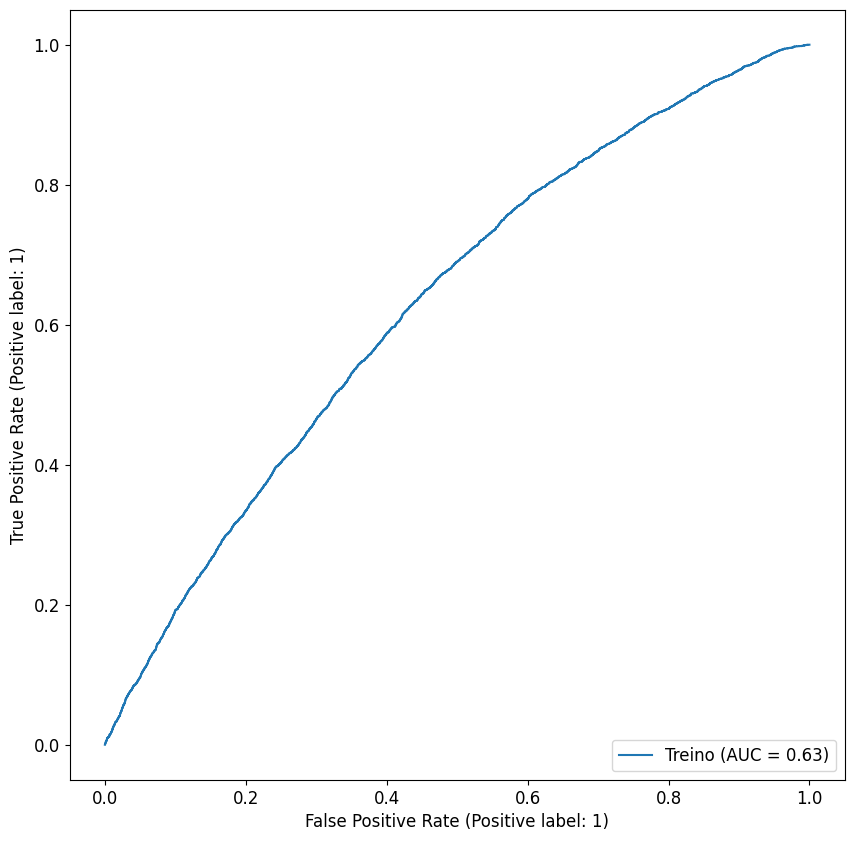

In [ ]:
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

##### FAR/FRR

Threshold de Treino: 0.23232323232323235


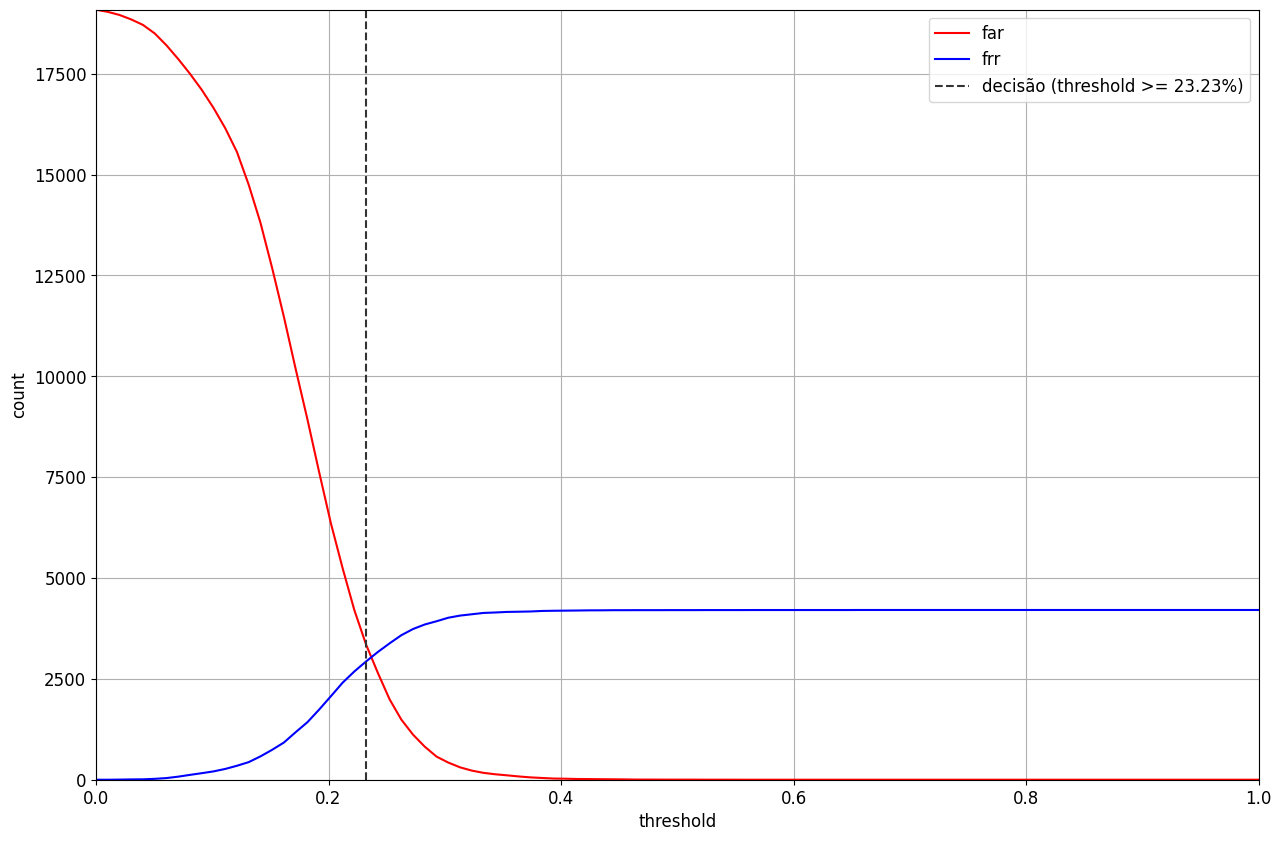

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

##### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.84      0.82      0.83     19085
        True       0.28      0.30      0.29      4207

    accuracy                           0.73     23292
   macro avg       0.56      0.56      0.56     23292
weighted avg       0.74      0.73      0.74     23292



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


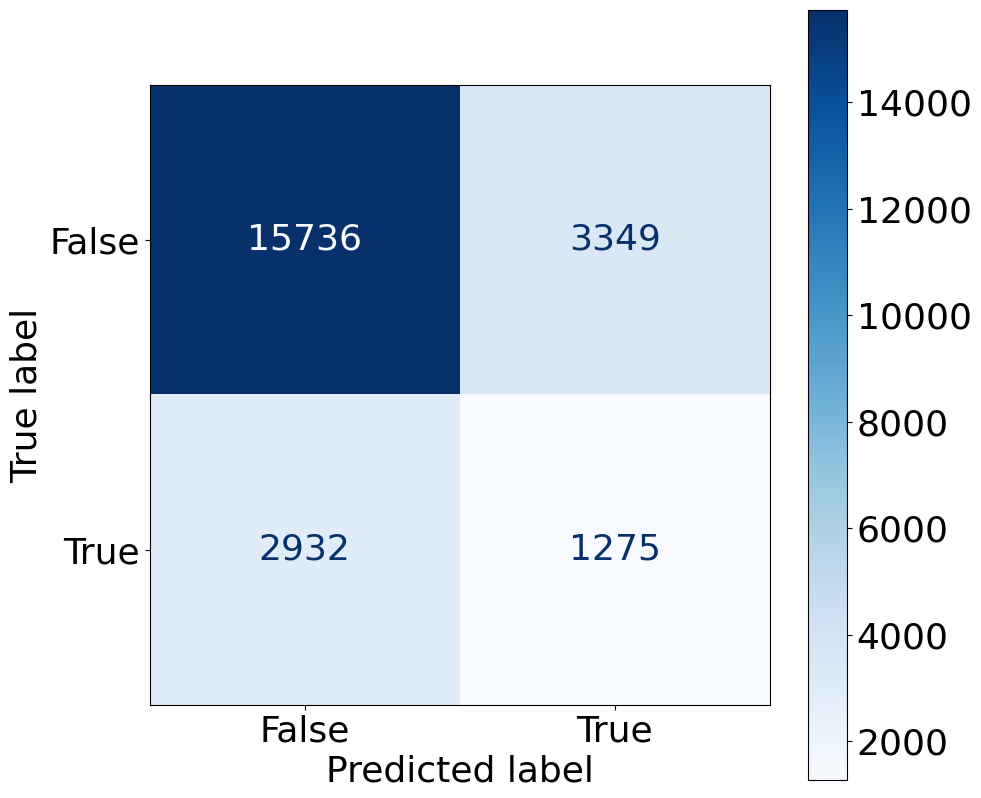

In [ ]:
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

#### Massa de Teste

In [ ]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


client_id
cx06840    0.139291
cx01931    0.174059
cx35431    0.198682
cx36233    0.256079
cx13540    0.209863
             ...   
cx19119    0.156811
cx21963    0.179670
cx37195    0.229618
cx16851    0.136564
cx15796    0.108298
Length: 7764, dtype: float64

##### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


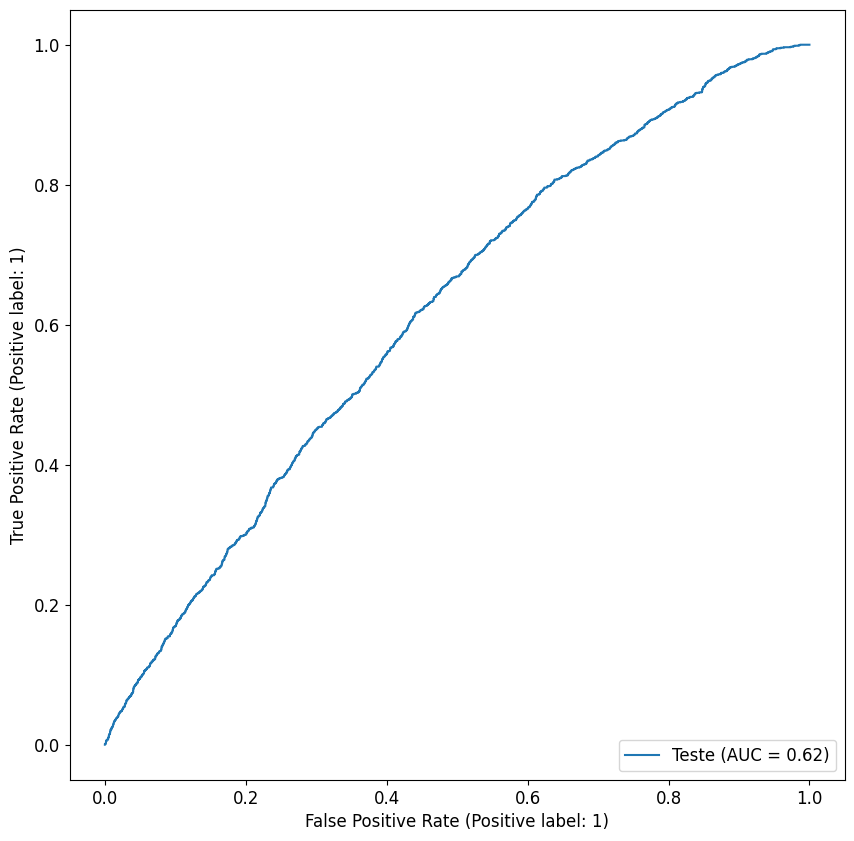

In [ ]:
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

##### FAR/FRR

Threshold de Treino: 0.23232323232323235
Threshold de Teste: 0.23232323232323235


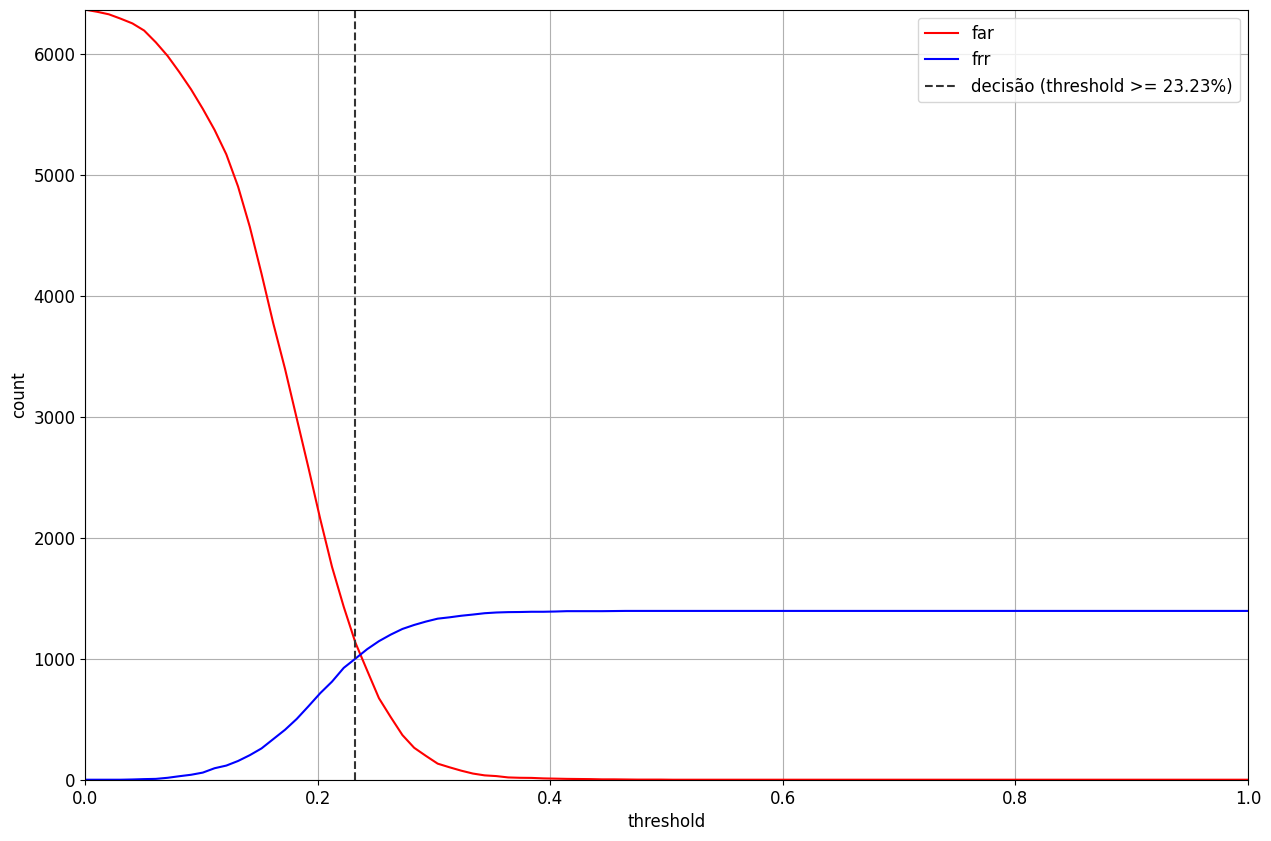

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

##### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      6368
        True       0.26      0.28      0.27      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.73      0.73      0.73      7764



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


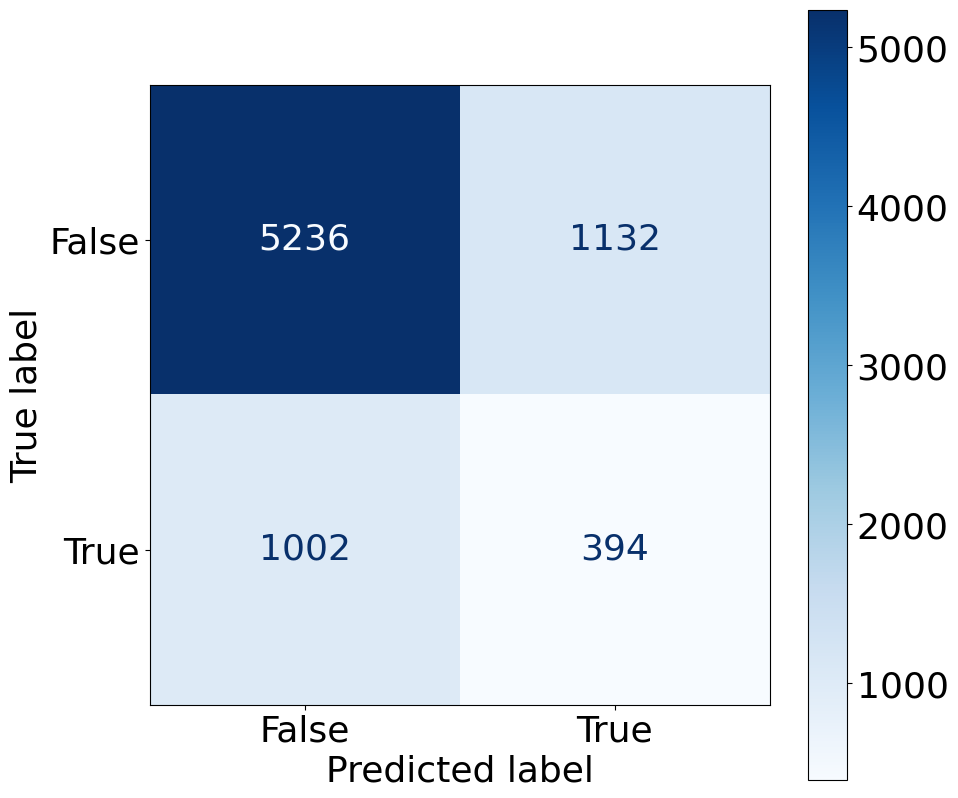

In [ ]:
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

#### Tabela de Resultados

In [ ]:
nome_modelo = 'LogisticRegression (baseline)'

In [ ]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000)}

In [ ]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235}

In [ ]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5236.0,1132.0,1002.0,394.0,0.725142,0.258191,0.282235,0.269678


## Treinar Modelos mais Complexos

Após treinar um modelo **_baseline_** e comprender se o problema tem questões de **viés** ou de **variância** (ou ambos) a serem resolvidos, a idéia é treinar modelos mais complexos (e mais fortes) para maximizar a performance da solução. Como os modelos clássicos de _ensemble_ conseguem resolver esses tipos de problemas (e são modelos complexos por si), fica como sugestão a referência da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing), que sugere os tipos certos de modelos para cada problema.

Algumas sugestões de modelos a serem treinados:

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html): _ensemble_ de árvores de decisão do tipo **_bagging_**, diminuem **variância**
- [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html): _ensemble_ de árvores de decisão do tipo **_boosting_**, diminuem **variância** e **viés**
- [Support Vector Machines](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html): modelo com foco na otimização da separação entre as classes, muito eficientes em classificação binária

Lembrando de sempre armazenar na **tabela de resultados** as métricas de cada modelo treinado.


### Random Forest Classifier

#### Treinamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=5000, max_depth=13)
model.fit(train_dataset.values, clients_tr.is_churn.values)

RandomForestClassifier(max_depth=13, n_estimators=5000)

#### Avaliação do Treinamento

##### Massa de Treino

In [ ]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


client_id
cx05072    0.183132
cx03836    0.320452
cx08472    0.211081
cx12946    0.206278
cx19045    0.107488
             ...   
cx05312    0.234570
cx02434    0.085602
cx16024    0.240198
cx11285    0.081781
cx00861    0.246358
Length: 23292, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


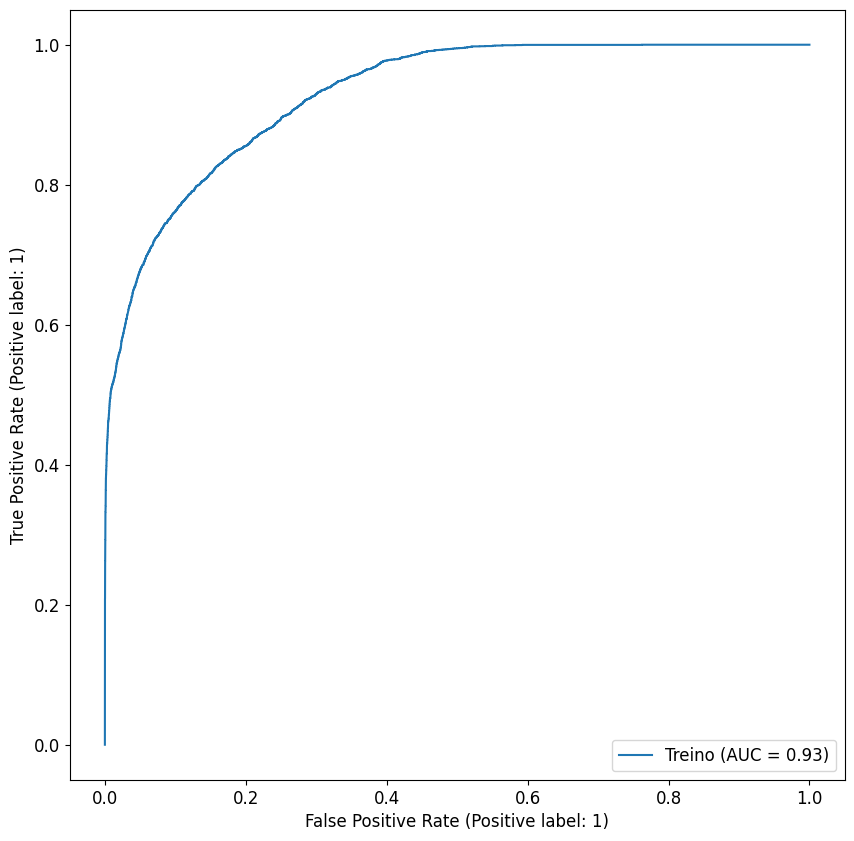

In [ ]:
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254


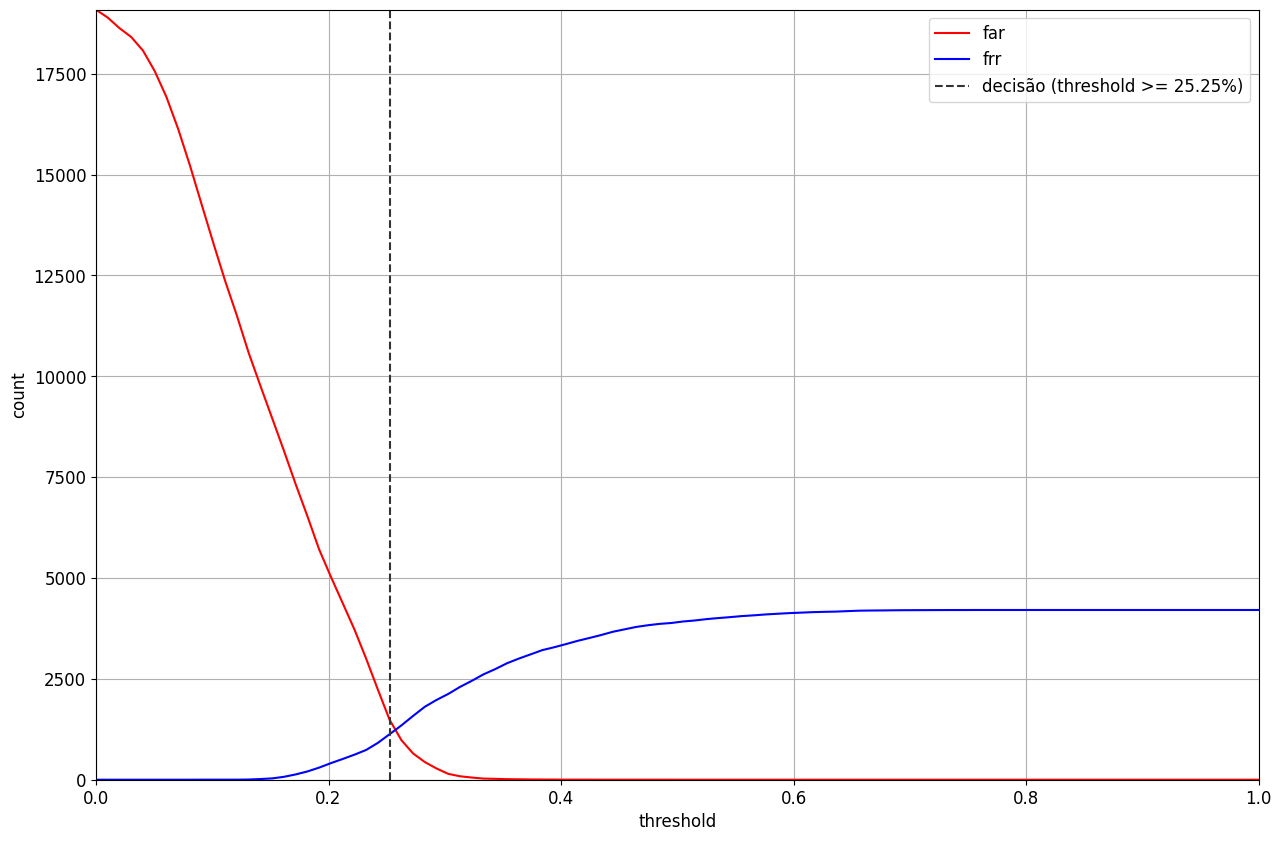

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.94      0.92      0.93     19085
        True       0.67      0.73      0.70      4207

    accuracy                           0.89     23292
   macro avg       0.81      0.83      0.82     23292
weighted avg       0.89      0.89      0.89     23292



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


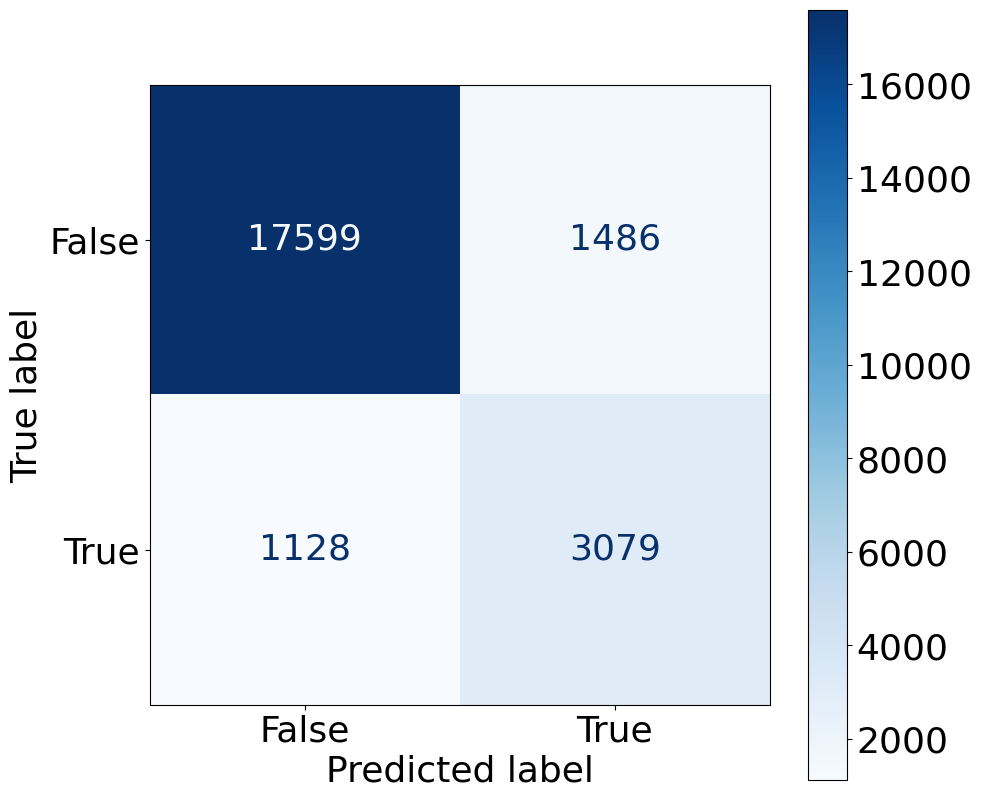

In [ ]:
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

##### Massa de Teste

In [ ]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


client_id
cx06840    0.311526
cx01931    0.258290
cx35431    0.194576
cx36233    0.231488
cx13540    0.295590
             ...   
cx19119    0.141987
cx21963    0.218254
cx37195    0.198115
cx16851    0.101519
cx15796    0.117879
Length: 7764, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


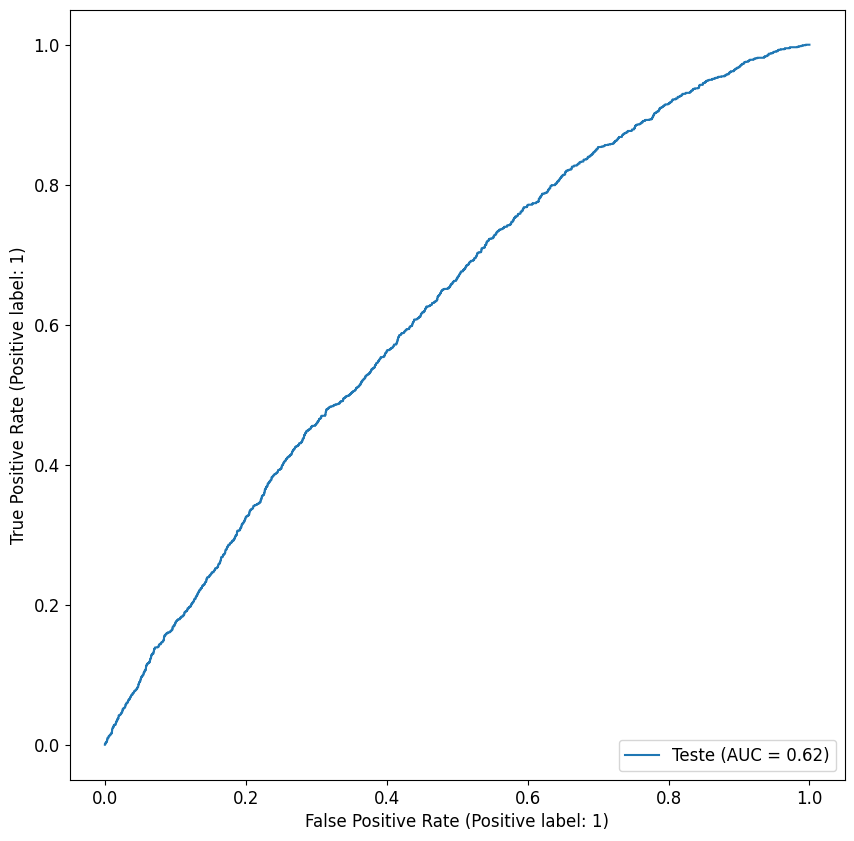

In [ ]:
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


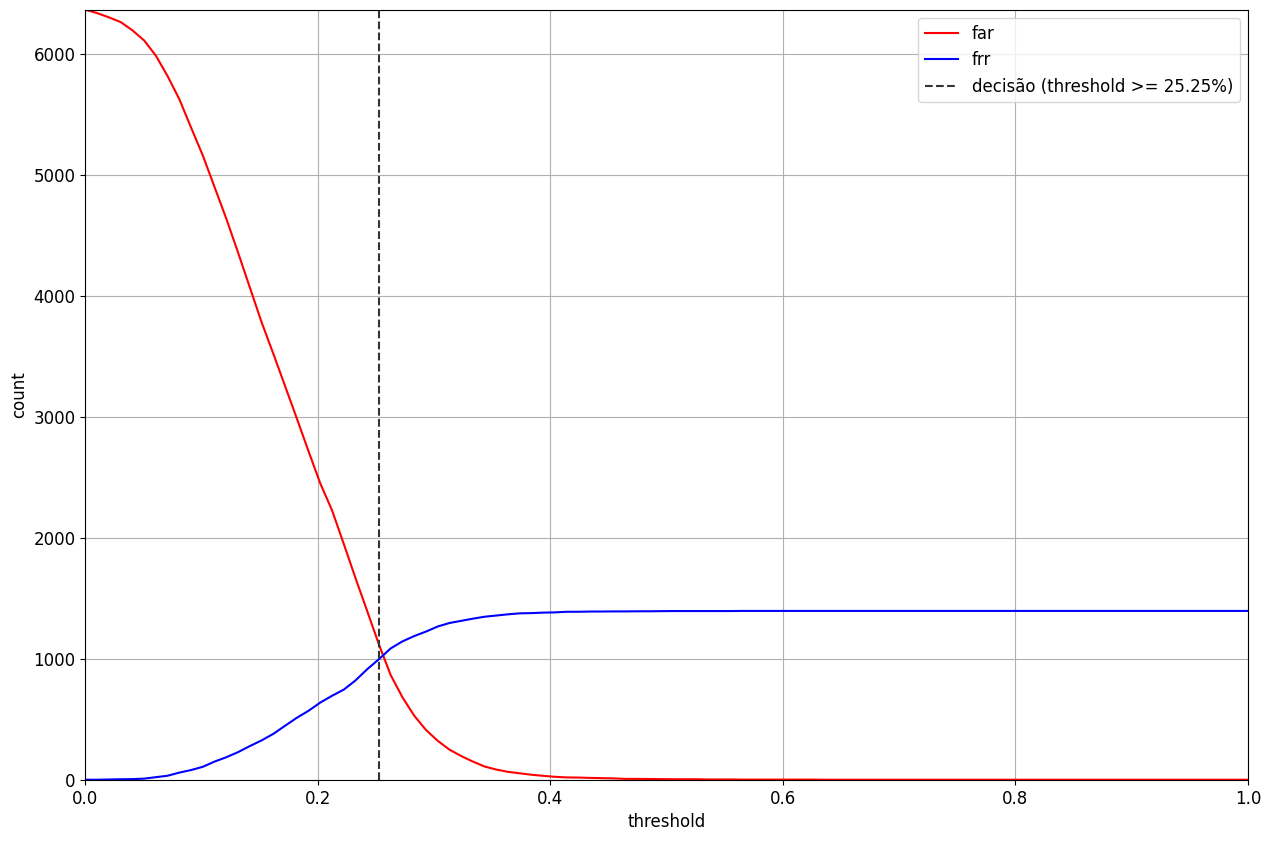

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      6368
        True       0.26      0.29      0.27      1396

    accuracy                           0.73      7764
   macro avg       0.55      0.56      0.55      7764
weighted avg       0.74      0.73      0.73      7764



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


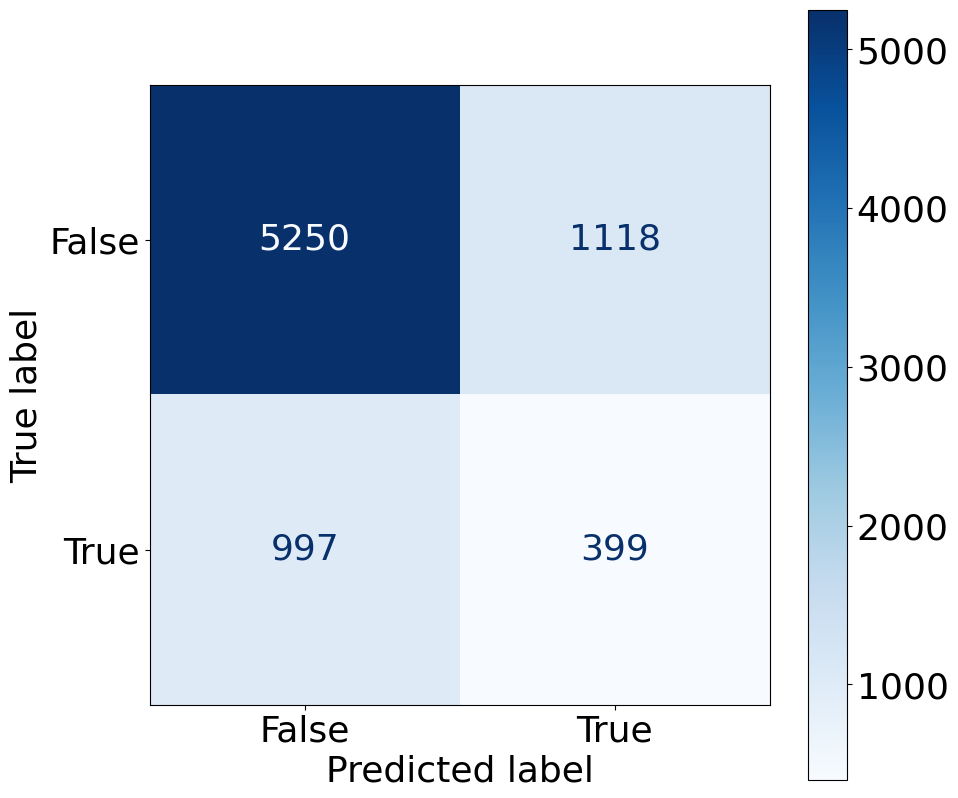

In [ ]:
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

#### Tabela de Resultados

In [ ]:
nome_modelo = 'RandomForestClassifier'

In [ ]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000)}

In [ ]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254}

In [ ]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\3058853017.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return existing_table.append(metrics)


,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5236.0,1132.0,1002.0,394.0,0.725142,0.258191,0.282235,0.269678
RandomForestClassifier,5250.0,1118.0,997.0,399.0,0.727589,0.263019,0.285817,0.273944


### Gradient Boosting Trees

#### Treinamento

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=100, max_depth=5)
model.fit(train_dataset.values, clients_tr.is_churn.values)

GradientBoostingClassifier(max_depth=5)

#### Avaliação do Treinamento

##### Massa de Treino

In [ ]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


client_id
cx05072    0.227516
cx03836    0.347673
cx08472    0.246183
cx12946    0.232464
cx19045    0.206094
             ...   
cx05312    0.229657
cx02434    0.106265
cx16024    0.262595
cx11285    0.090492
cx00861    0.248234
Length: 23292, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


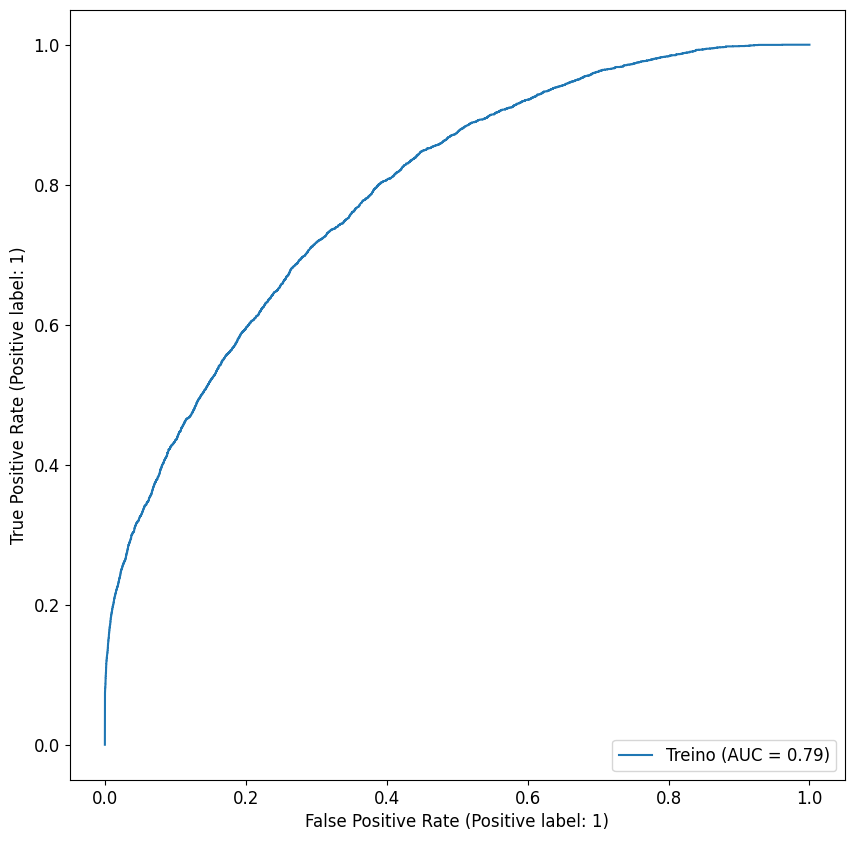

In [ ]:
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254


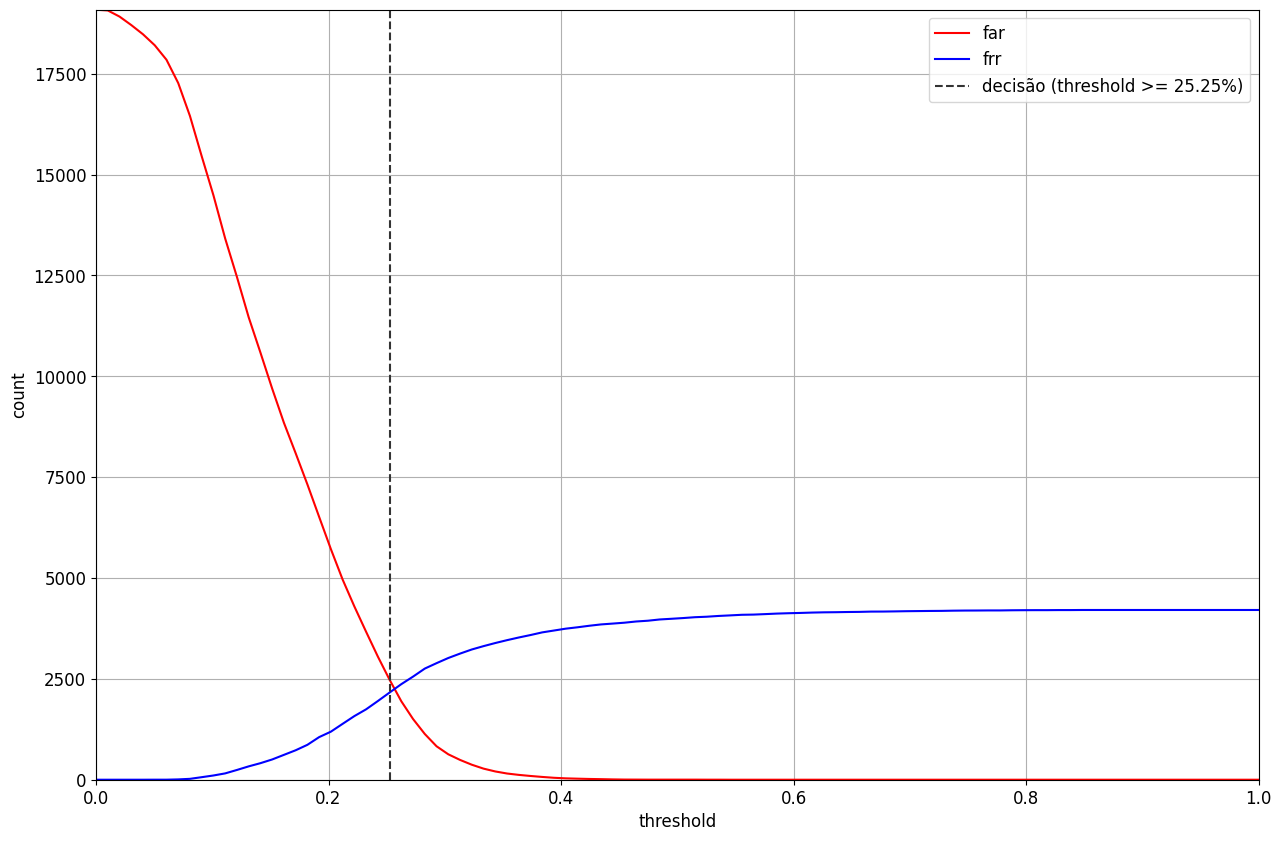

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.88      0.87      0.88     19085
        True       0.45      0.49      0.47      4207

    accuracy                           0.80     23292
   macro avg       0.67      0.68      0.67     23292
weighted avg       0.81      0.80      0.80     23292



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


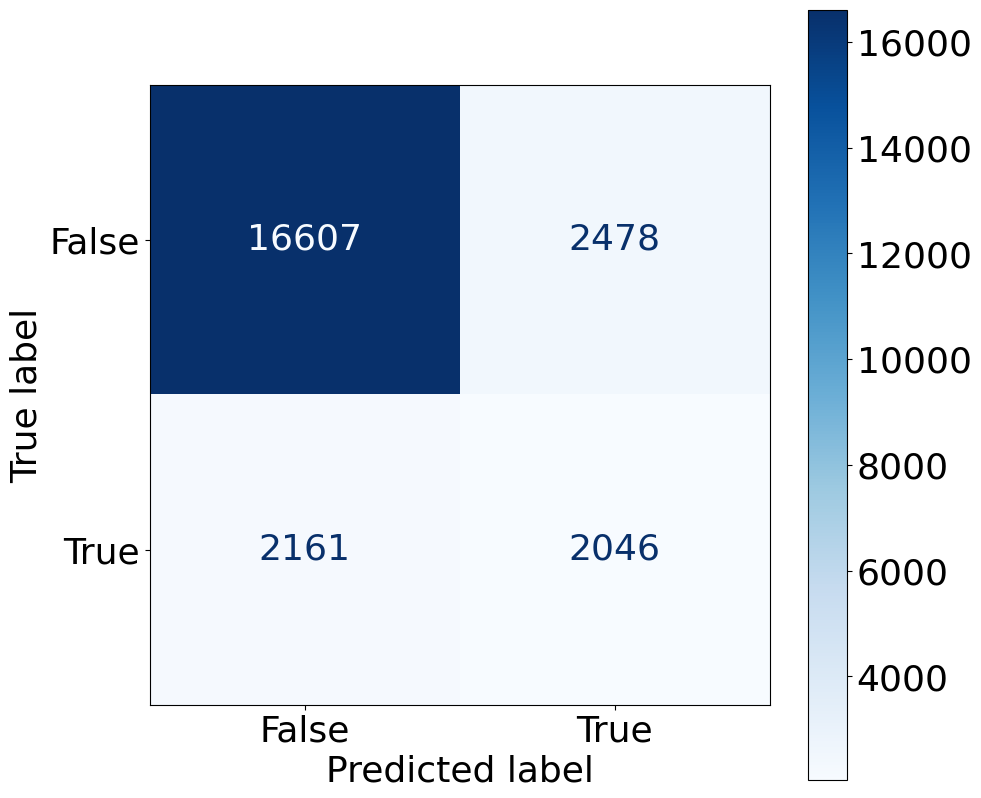

In [ ]:
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

##### Massa de Teste

In [ ]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


client_id
cx06840    0.376609
cx01931    0.229539
cx35431    0.198929
cx36233    0.196338
cx13540    0.283517
             ...   
cx19119    0.138639
cx21963    0.239073
cx37195    0.210387
cx16851    0.154902
cx15796    0.076591
Length: 7764, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


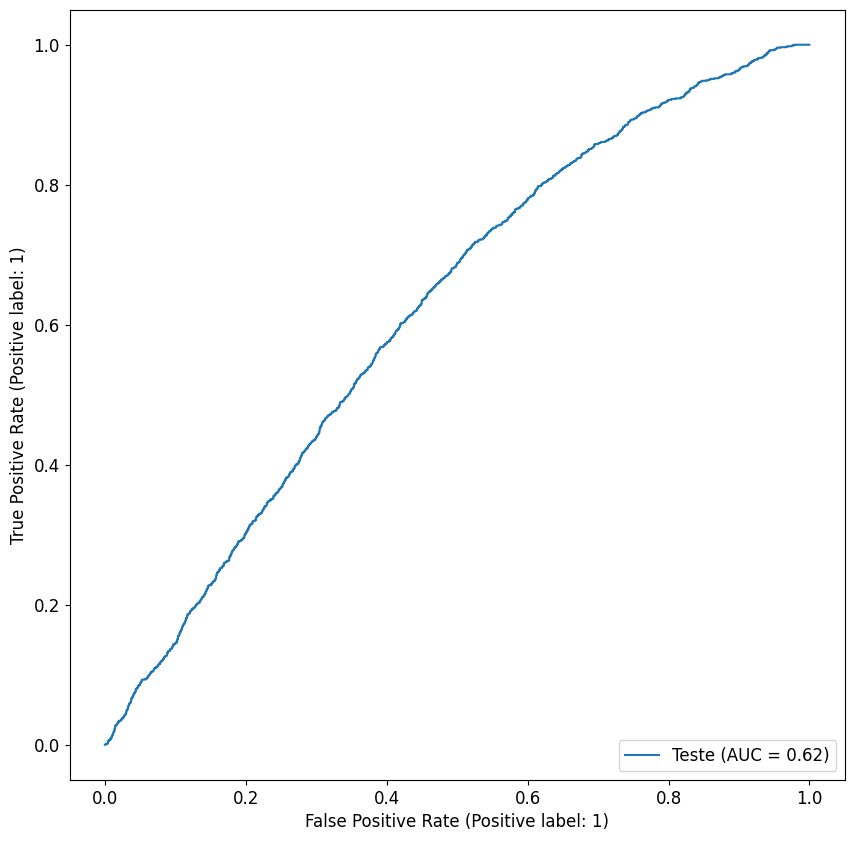

In [ ]:
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


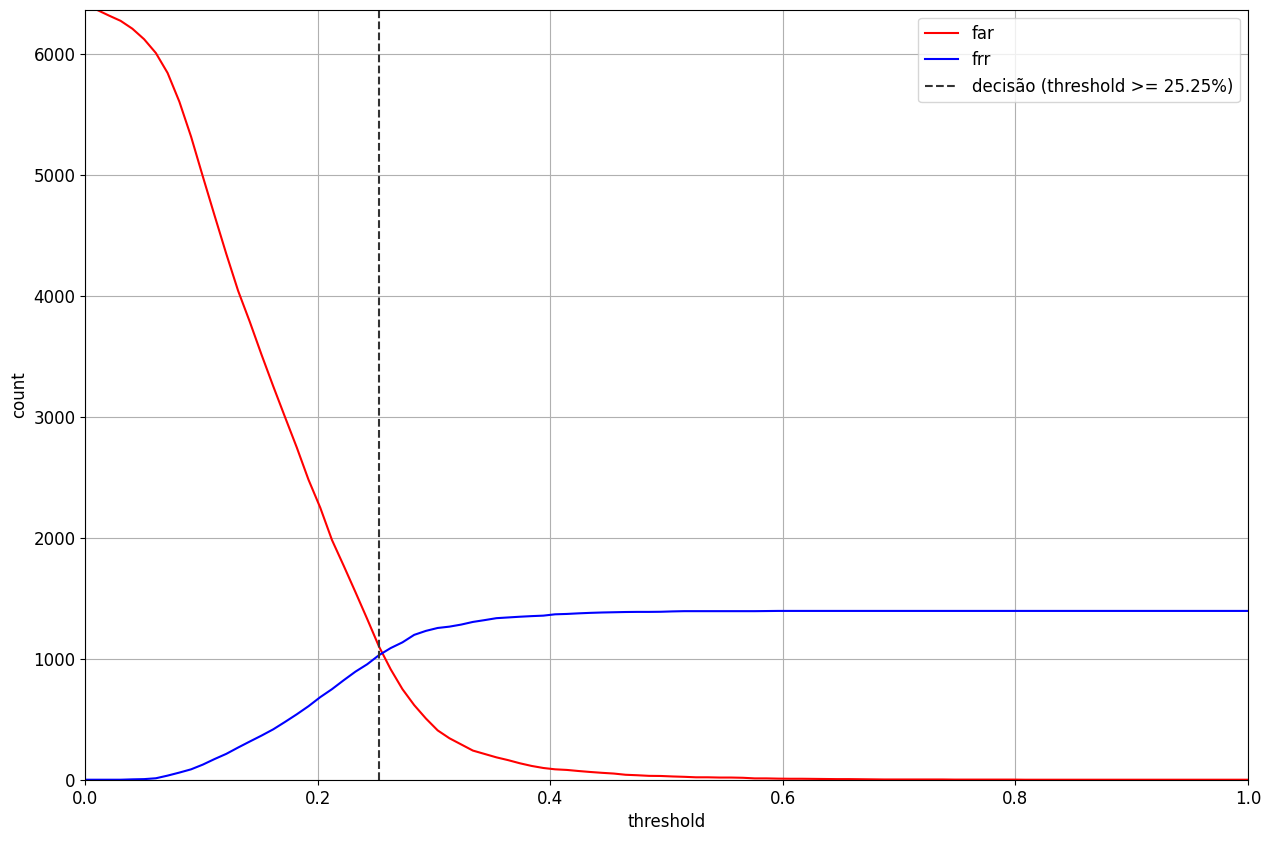

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.84      0.83      0.83      6368
        True       0.25      0.26      0.26      1396

    accuracy                           0.73      7764
   macro avg       0.54      0.54      0.54      7764
weighted avg       0.73      0.73      0.73      7764



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


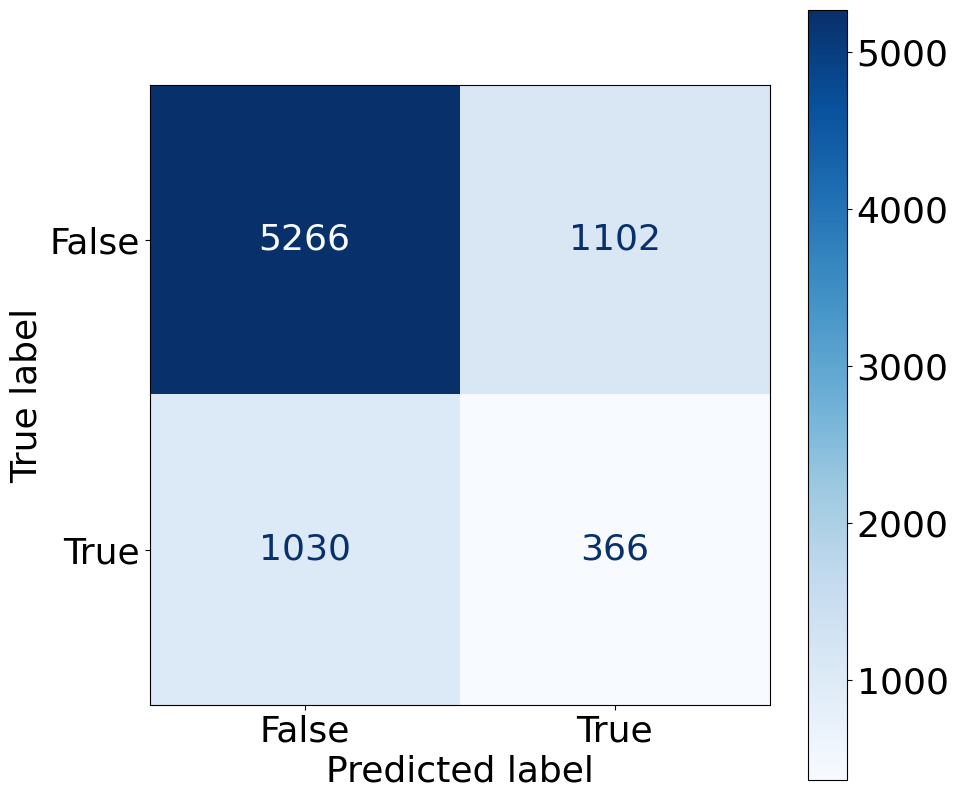

In [ ]:
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

#### Tabela de Resultados

In [ ]:
nome_modelo = 'GradientBoostingTrees'

In [ ]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000),
 'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5)}

In [ ]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254,
 'GradientBoostingTrees': 0.25252525252525254}

In [ ]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\3058853017.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return existing_table.append(metrics)


,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5236.0,1132.0,1002.0,394.0,0.725142,0.258191,0.282235,0.269678
RandomForestClassifier,5250.0,1118.0,997.0,399.0,0.727589,0.263019,0.285817,0.273944
GradientBoostingTrees,5266.0,1102.0,1030.0,366.0,0.725399,0.249319,0.262178,0.255587


## Agrupando Modelos em um *Ensemble*

Com vários modelos treinados, é interessante treinar um [_ensemble_ do tipo _stacking_](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html) com os modelos mais promissores dentre os treinados. 


Antes de treinar o _stacking_, deve-se buscar entender **quais modelos são interessantes** para compor esse _ensemble_, já que há bastante custo computacional envolvido em combinar modelos. Uma técnica interessante é **verificar quais modelos são mais complementares** e qual combinação de modelos teria o **potencial ótimo**, i.e. o maior ganho teórico. A primeira parte da [aula de _Ensembles_](https://docs.google.com/presentation/d/12zwm_gdUrxlY2YpFYTOOPqacyZg_FKqwNaOXGSn6idM/edit?usp=sharing) mostra esse racional no **slide 22**.




### Treinando um `StackingClassifier`

#### Treinamento

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000),
 'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5)}

In [ ]:
model = StackingClassifier(
    estimators=list(modelos_treinados.items()),
    final_estimator=RandomForestClassifier(n_estimators=2000, max_depth=10),
    passthrough=True    
)
model.fit(train_dataset.values, clients_tr.is_churn.values)

StackingClassifier(estimators=[('LogisticRegression (baseline)',
                                LogisticRegression(max_iter=1000)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(max_depth=13,
                                                       n_estimators=5000)),
                               ('GradientBoostingTrees',
                                GradientBoostingClassifier(max_depth=5))],
                   final_estimator=RandomForestClassifier(max_depth=10,
                                                          n_estimators=2000),
                   passthrough=True)

In [ ]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


client_id
cx05072    0.214571
cx03836    0.312941
cx08472    0.254302
cx12946    0.227643
cx19045    0.161827
             ...   
cx05312    0.241609
cx02434    0.092008
cx16024    0.255249
cx11285    0.115596
cx00861    0.249704
Length: 23292, dtype: float64

#### Avaliação do Treinamento

##### Massa de Treino

In [ ]:
y_prob_tr = pd.Series(
    index=train_dataset.index,
    data=model.predict_proba(train_dataset)[:, 1]
)
y_prob_tr

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


client_id
cx05072    0.214571
cx03836    0.312941
cx08472    0.254302
cx12946    0.227643
cx19045    0.161827
             ...   
cx05312    0.241609
cx02434    0.092008
cx16024    0.255249
cx11285    0.115596
cx00861    0.249704
Length: 23292, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


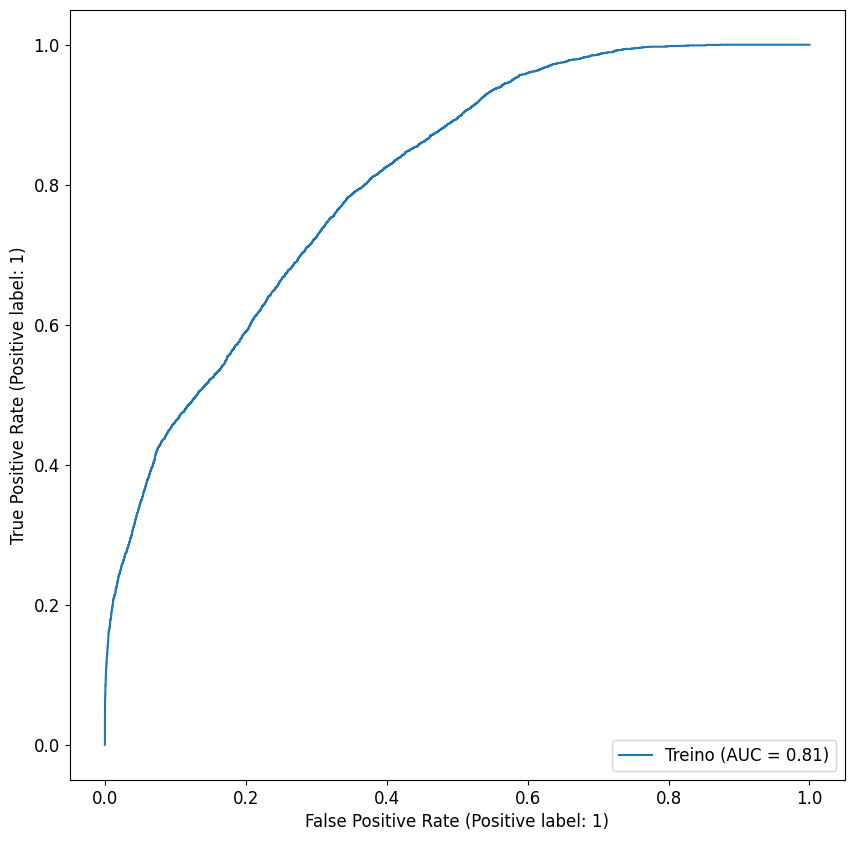

In [ ]:
_ = plot_roc_curve(y_true_tr, y_prob_tr, name='Treino')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254


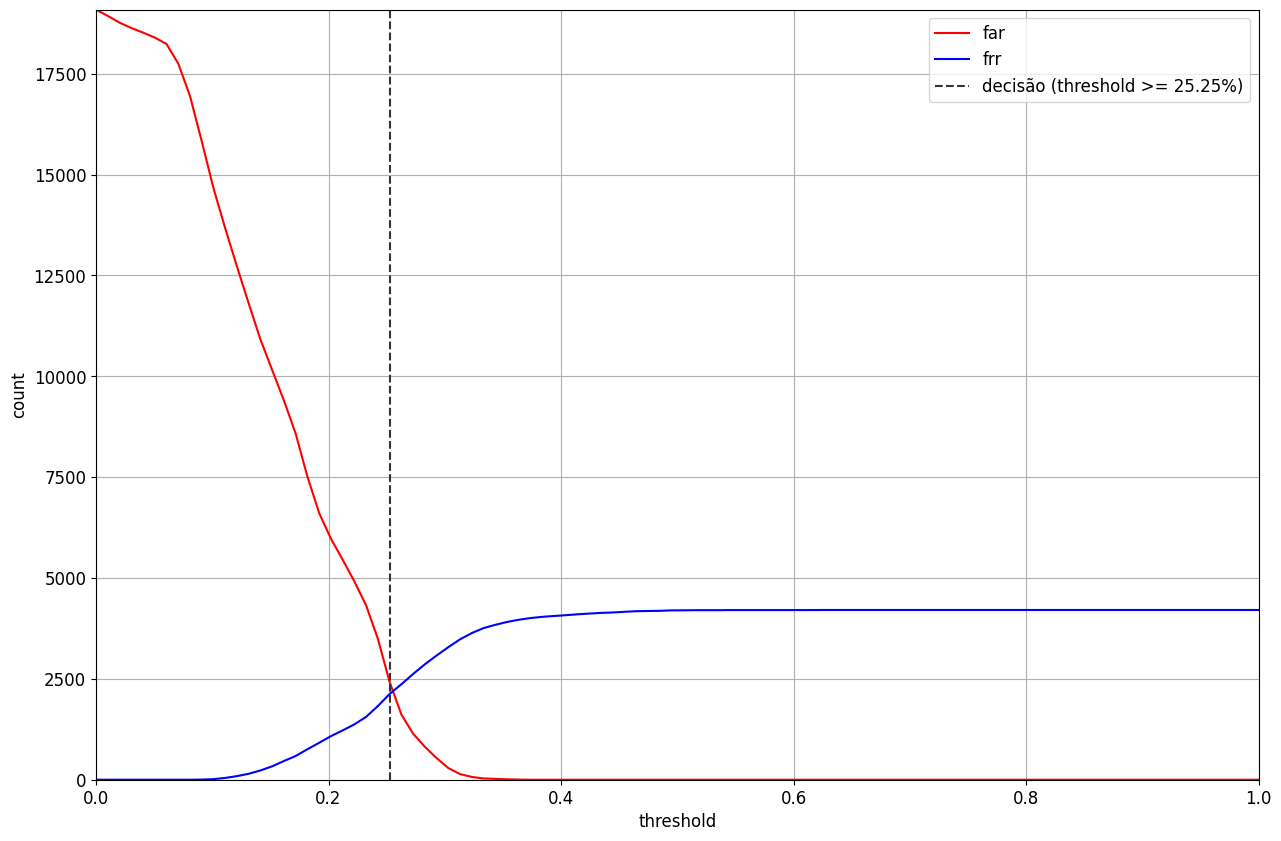

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_tr, y_prob=y_prob_tr, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
threshold = ffdf["optm"]
print(f'Threshold de Treino: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.89      0.87      0.88     19085
        True       0.46      0.50      0.48      4207

    accuracy                           0.80     23292
   macro avg       0.67      0.68      0.68     23292
weighted avg       0.81      0.80      0.81     23292



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


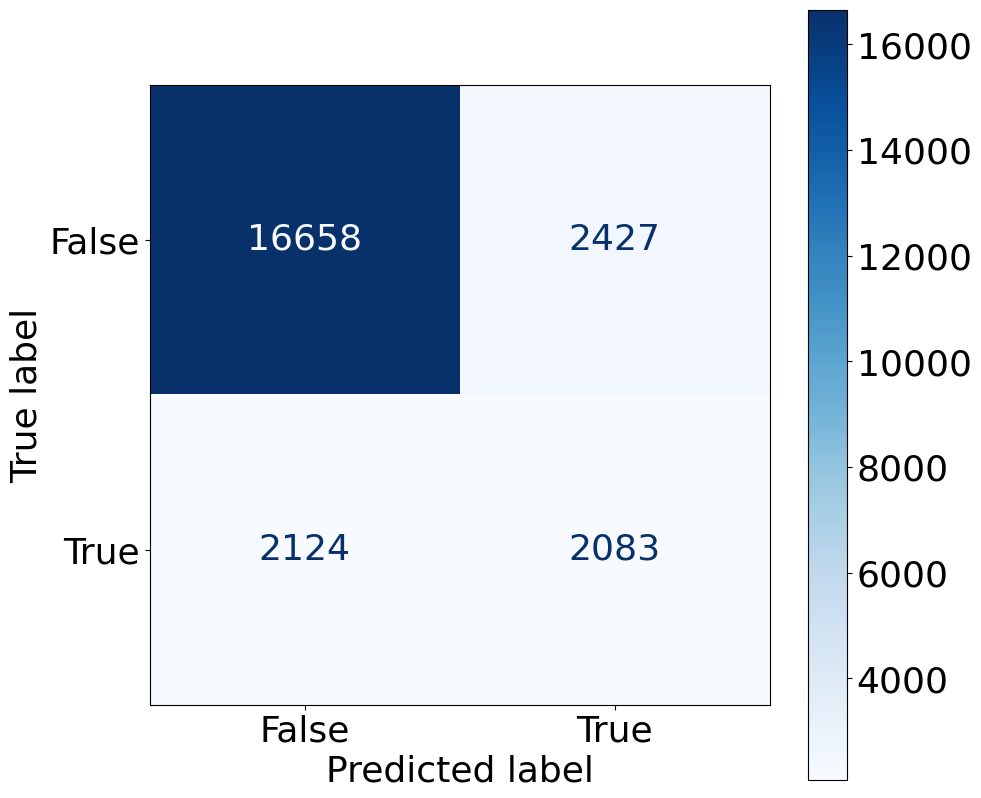

In [ ]:
plot_confusion_matrix(
    y_true=y_true_tr, 
    y_prob=y_prob_tr, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

##### Massa de Teste

In [ ]:
y_prob_te = pd.Series(
    index=test_dataset.index,
    data=model.predict_proba(test_dataset)[:, 1]
)
y_prob_te

X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
X:\Dev\python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


client_id
cx06840    0.235638
cx01931    0.230945
cx35431    0.207055
cx36233    0.223357
cx13540    0.305789
             ...   
cx19119    0.131988
cx21963    0.211464
cx37195    0.210063
cx16851    0.116422
cx15796    0.118195
Length: 7764, dtype: float64

###### ROC AUC

X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


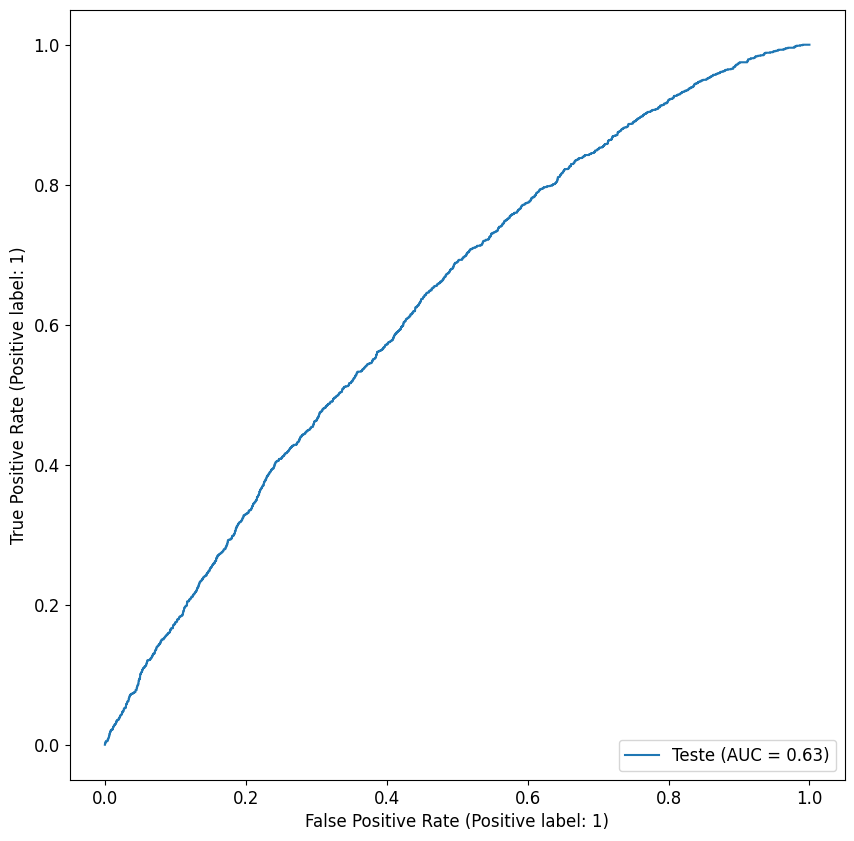

In [ ]:
_ = plot_roc_curve(y_true_te, y_prob_te, name='Teste')

###### FAR/FRR

Threshold de Treino: 0.25252525252525254
Threshold de Teste: 0.25252525252525254


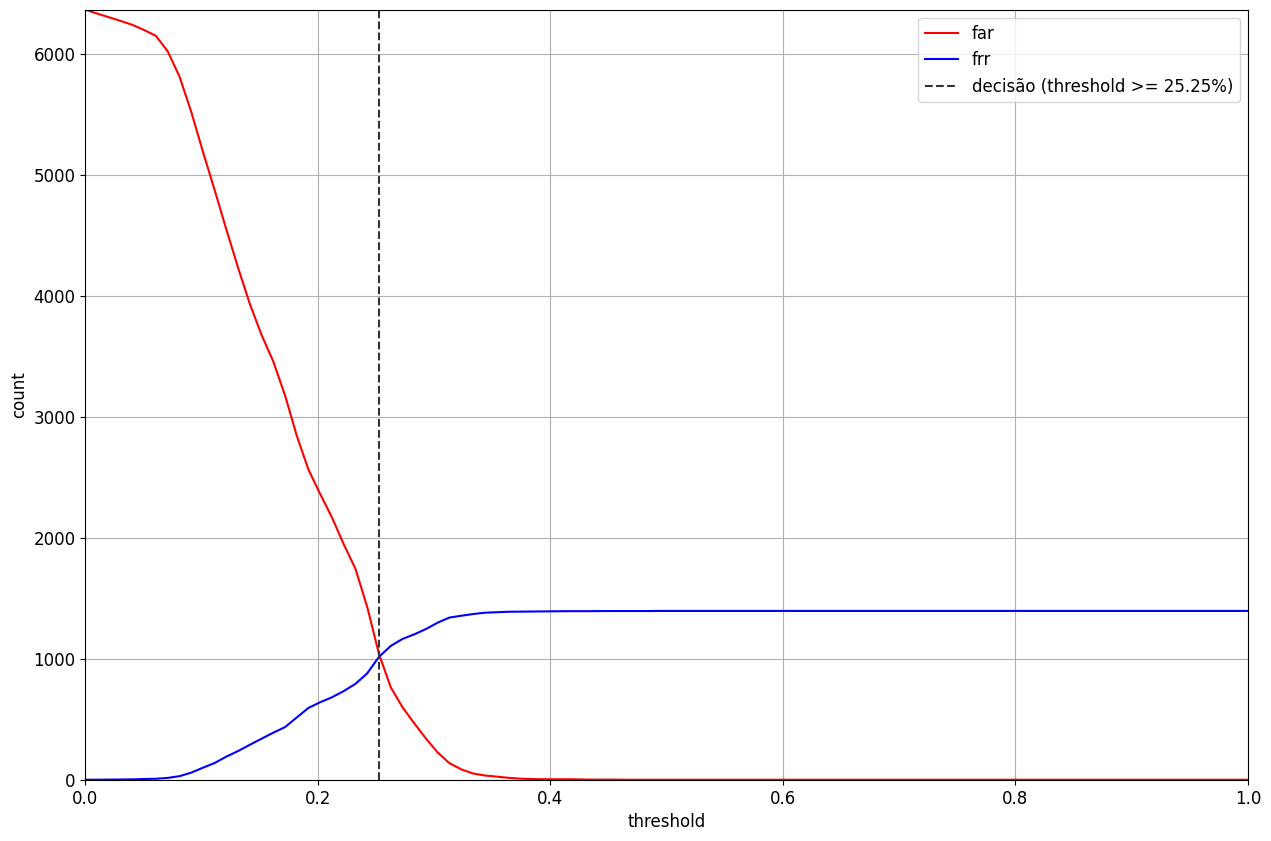

In [ ]:
ffdf = plot_far_frr(
    y_true=y_true_te, y_prob=y_prob_te, 
    n_points=100, normalize=False, threshold=None, 
    figsize=(15, 10)
)
print(f'Threshold de Treino: {threshold}')
print(f'Threshold de Teste: {ffdf["optm"]}')

###### Métricas de Classificação

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      6368
        True       0.27      0.27      0.27      1396

    accuracy                           0.74      7764
   macro avg       0.55      0.55      0.55      7764
weighted avg       0.74      0.74      0.74      7764



X:\Dev\python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


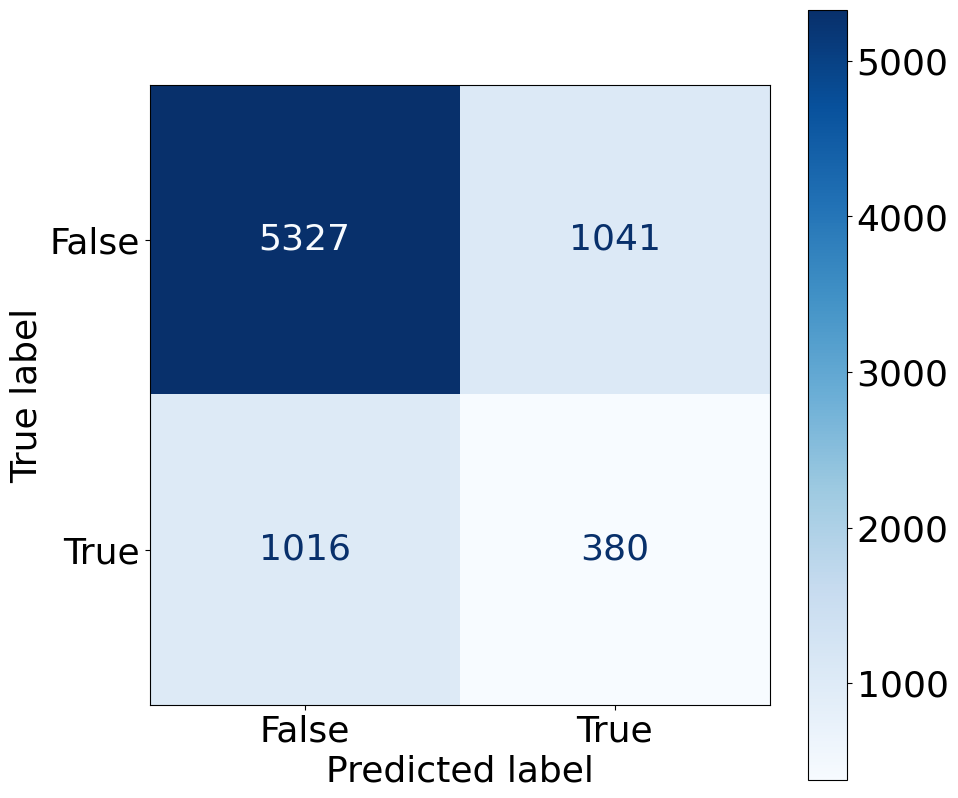

In [ ]:
plot_confusion_matrix(
    y_true=y_true_te, 
    y_prob=y_prob_te, 
    threshold=threshold, 
    fontsize=26, 
    values_format='d'
)

#### Tabela de Resultados

In [ ]:
nome_modelo = 'StackingClassifier (Ensemble)'

In [ ]:
modelos_treinados[nome_modelo] = model
modelos_treinados

{'LogisticRegression (baseline)': LogisticRegression(max_iter=1000),
 'RandomForestClassifier': RandomForestClassifier(max_depth=13, n_estimators=5000),
 'GradientBoostingTrees': GradientBoostingClassifier(max_depth=5),
 'StackingClassifier (Ensemble)': StackingClassifier(estimators=[('LogisticRegression (baseline)',
                                 LogisticRegression(max_iter=1000)),
                                ('RandomForestClassifier',
                                 RandomForestClassifier(max_depth=13,
                                                        n_estimators=5000)),
                                ('GradientBoostingTrees',
                                 GradientBoostingClassifier(max_depth=5))],
                    final_estimator=RandomForestClassifier(max_depth=10,
                                                           n_estimators=2000),
                    passthrough=True)}

In [ ]:
modelos_threshold[nome_modelo] = threshold
modelos_threshold

{'LogisticRegression (baseline)': 0.23232323232323235,
 'RandomForestClassifier': 0.25252525252525254,
 'GradientBoostingTrees': 0.25252525252525254,
 'StackingClassifier (Ensemble)': 0.25252525252525254}

In [ ]:
tabela_resultados = results_table(
    nome_modelo, 
    tabela_resultados,
    y_true=y_true_te, 
    y_pred=(y_prob_te >= threshold)
)
tabela_resultados

C:\Users\marce\AppData\Local\Temp\ipykernel_10148\3058853017.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return existing_table.append(metrics)


,tn,fp,fn,tp,accuracy,precision,recall,f1_score
modelos,,,,,,,,
LogisticRegression (baseline),5236.0,1132.0,1002.0,394.0,0.725142,0.258191,0.282235,0.269678
RandomForestClassifier,5250.0,1118.0,997.0,399.0,0.727589,0.263019,0.285817,0.273944
GradientBoostingTrees,5266.0,1102.0,1030.0,366.0,0.725399,0.249319,0.262178,0.255587
Ensemble Teórico Ótimo,5266.0,1102.0,1030.0,366.0,0.725399,0.249319,0.262178,0.255587
StackingClassifier (Ensemble),5327.0,1041.0,1016.0,380.0,0.735059,0.267417,0.272206,0.269791
